<div style="border: 3px solid #DDA0DD; padding: 20px; background-color: #FAF3FF; display: flex; justify-content: space-between; align-items: center;">
    <!-- Left side with text -->
    <div style="flex: 1; text-align: left;">
        <h1 style="color: #DDA0DD;">INTRODUCTION</h1>
        <p style="font-weight: bold; color: #DDA0DD;">Program: MBANDD1 - DAT-5390</p>
        <p style="font-weight: bold; color: #DDA0DD;">Course: Computational Data Analytics with Python</p>
        <p style="font-weight: bold; color: #DDA0DD;">A1: Linear Modeling Case Study</p>
        <p style="font-weight: bold; color: #DDA0DD;">By: Anabella Gardner Dunn</p>
        <p style="font-weight: bold;">HULT International Business School, San Francisco, 2024</p>
        <p style="font-weight: bold;">✨ Version: February 9th ✨</p>
       <p style="font-weight: bold;">Introduction</p> 
        This assignment focuses on applying regression modeling techniques to analyze and predict outcomes using structured data.A key objective is to compare these models in terms of predictive performance while ensuring compliance with the best practices in data science<br>
        Such as proper train-test splits, missing value (MV's) handling, and feature transformations, by selecting a final model based not only on accuracy but also on its practical relevance to the real-world of business.
    </div>
    <!-- Right side with image pushed 250px further right -->
    <div>
        <div style="flex-shrink: 0; margin-left: 100px; margin-right: 5px; margin-top: 20px; align-items: right;">
            <img src="https://media.licdn.com/dms/image/v2/D5603AQERpFDds5Ws6w/profile-displayphoto-shrink_800_800/profile-displayphoto-shrink_800_800/0/1722472944940?e=1740009600&v=beta&t=1_EqRd8FZ1ZJfNenAS6sTt0tYEfQ2nH_wo8NBmg30HQ" 
             alt="Profile Picture" style="border-radius: 50%; width: 600px;">
        </div>
        <div style="flex-shrink: 0; margin-left: 100px; margin-right: 5px; margin-top: 20px; align-items: right;">
            <img src="https://i.imgur.com/yqJ3PUY.png" alt="Grocery Gettr" style="width: 600px;">
        </div> 
    </div>
</div>

<div style="border: 3px solid #DDA0DD; padding: 20px; background-color: #FAF3FF;">
    <h1 style="color: #DDA0DD;">ENVIRONMENT PREPARATION</h1>
    <p>In this step, we will set up all the necessary libraries in our Python environment that enable efficient data processing, visualization & model implementation by importing :</p>
    <ul>
        <li><b>Pandas:</b> For data manipulation and analysis.</li>
        <li><b>Matplotlib & Seaborn:</b> For creating insightful visualizations.</li>
        <li><b>Scikit-learn:</b> For implementing machine learning models.</li>
    </ul>
    <p>These tools will provide us with a robust platform for conducting Exploratory Data Analysis (EDA), Feature Engineering, Model Development, and Performance Evaluation throughout this Grocery_getters case study.</p>
</div>

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Packages Installation and Loading:</h2></b>
</div>

In [1]:
# Timer to count the time how long it takes to run the case
import time
start_time = time.time()

# Data manipulation and analysis
import pandas as pd                 # Structured data handling (tables and DataFrames).
import numpy as np                  # Numerical computations and multi-dimensional arrays.

# Visualization libraries
from IPython.display import display # Displaying DataFrames and other objects in Jupyter Notebook.
import matplotlib.pyplot as plt     # Static, animated, and  interactive visualizations.
from matplotlib import gridspec     # Custom subplot layouts with more control over plot positions.
import seaborn as sns               # High-level interface to draw attractive statistical graphics.

# Regular expressions & warnings management
import re                           # Pattern matching and text extraction while cleaning the data.
import warnings                     # To manage warnings (e.g., suppress future warnings / deprecated code).

# Scikit-learn utilities
from sklearn.model_selection import train_test_split        # Splits datasets into training and testing subsets.
from sklearn.model_selection import cross_val_score         # Cross-validation score analysis.
from sklearn.preprocessing import StandardScaler            # Feature standardization, scaling to a mean of 0 and variance of 1.
from sklearn.linear_model import LinearRegression           # LinearRegression: Ordinary Least Squares (OLS).
from sklearn.linear_model import Lasso                      # Lasso: L1 regularization (feature selection).
from sklearn.linear_model import Ridge                      # Ridge: L2 regularization (reduces multicollinearity).
from sklearn.linear_model import SGDRegressor               # Elastic Net: Stochastic Gradient Descent (L1 + L2 combined).
from sklearn.neighbors import KNeighborsRegressor           # K-Nearest Neighbors for regression tasks.
from sklearn.cluster import KMeans                          # Clustering analsysis. i.e. segmenting revenue groups.
from sklearn.inspection import permutation_importance       # Permutation for KNN Feature Importance
from sklearn.metrics import mean_squared_error, r2_score    # Evaluating model performance (RMSE, R²).

# Additional statistical utilities
from scipy.stats import mstats                              # For robust statistics such as trimming outliers.



<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Dataset Imports & Preview:</h2></b>
</div>

<b>Preview.</b> Let's see the dataset we've been given.

In [2]:
# Defining a default filename
file_name = "Grocery_Getters.xlsx"

# Loading the dataset
df = pd.read_excel(file_name, sheet_name="raw_data")

# Randomly sample 20 rows
sampled_data = df.sample(n=30, random_state=42)  # random_state ensures reproducibility

# Display the sampled data
sampled_data

Name                                 Email First_Name  \
1611       Rickard Karstark             rickard.karstark@live.com    Rickard   
1403          Arys Oakheart          arys.oakheart@protonmail.com       Arys   
974                  Serala                  serala@mcdonalds.com     Serala   
1055       Donella Hornwood         donella.hornwood@passport.com    Donella   
307            Daeron Vaith              daeron.vaith@verizon.com     Daeron   
432        Steffon Seaworth      steffon.seaworth@caterpillar.com    Steffon   
1464  Jaehaerys I Targaryen         jaehaerys.i.targaryen@aol.com  Jaehaerys   
598                    Hake                         hake@amex.com       Hake   
1087   Lyonel Tyrell (lord)   lyonel.tyrell.(lord)@protonmail.com     Lyonel   
305                  Doreah                 doreah@protonmail.com     Doreah   
367            Mandon Moore                mandon.moore@yahoo.com     Mandon   
1609     Daeron I Targaryen     daeron.i.targaryen@protonmail.com     Daeron   
1512            Eldred Codd               eldred.codd@hotmail.com     Eldred   
1480           Wynton Stout                wynton.stout@merck.com     Wynton   
1107          Ormond Osgrey                ormond.osgrey@live.com     Ormond   
1355         Urron Greyiron                urron.greyiron@aol.com      Urron   
69          Baela Targaryen         baela.targaryen@mcdonalds.com      Baela   
1605            Vardis Egen              vardis.egen@passport.com     Vardis   
438                   Shyra                  shyra@protonmail.com      Shyra   
135           Rolland Storm                  rolland.storm@me.com    Rolland   
555                   Helly                       helly@gmail.com      Helly   
99                      Hod                         hod@gmail.com        Hod   
1054  Triston of Tally Hill  triston.of.tally.hill@protonmail.com    Triston   
1418                 Dunsen                      dunsen@yahoo.com     Dunsen   
736            Cedric Payne                cedric.payne@gmail.com     Cedric   
993                   Jeren                       jeren@gmail.com      Jeren   
247                   Tymor                     tymor@hotmail.com      Tymor   
351            Ysilla Royce              ysilla.royce@hotmail.com     Ysilla   
1293          Dornish Dilly               dornish.dilly@yahoo.com    Dornish   
56           Medwick Tyrell                medwick.tyrell@msn.com    Medwick   

        Family_Name  REVENUE  Total_Products_Ordered  \
1611       Karstark  3090.00                    3484   
1403       Oakheart  2572.50                    1757   
974          Serala  1745.00                     838   
1055       Hornwood  1805.00                     837   
307           Vaith  1220.00                    1363   
432        Seaworth  1310.00                    1439   
1464    I Targaryen  2683.50                    2991   
598            Hake  1430.00                    2342   
1087        Tyrell   1840.00                    1083   
305          Doreah  1220.00                    1734   
367           Moore  1270.00                     662   
1609    I Targaryen  3078.25                    2968   
1512           Codd  2775.00                    1789   
1480          Stout  2712.50                    1419   
1107         Osgrey  1850.00                    1127   
1355       Greyiron  2275.00                    1648   
69        Targaryen   825.00                     939   
1605           Egen  3075.00                    4976   
438           Shyra  1319.00                    1298   
135           Storm  1000.00                    1343   
555           Helly  1400.00                     701   
99              Hod   930.00                    1625   
1054  of Tally Hill  1805.00                    1837   
1418         Dunsen  2595.00                    4076   
736           Payne  1524.00                     522   
993           Jeren  1755.00                     902   
247           Tymor  1155.00  

We can see 3 types of errors:
-  In the "Name" column there are some last names inside a parenthesis holding this values and creating MVs.
- We have some empty registers in the "Family_name" section.
- The "Email" field also needed a clean-up as invalid characters with parenthesis were inside.

<div style="border: 3px solid #DDA0DD; padding: 20px; background-color: #FAF3FF;">
    <h1 style="color: #DDA0DD;">EXPLORATORY DATA ANALYSIS (EDA)</h1>
  <ul>
      <li><b>Descriptive Statistics:</b>The dataset shows a substantial variance across key metrics</li>
      <li><b>Feature engineering:</b> Enhances model performance by creating new, meaningful variables from the existing data.</li>
      <li><b>Customer Loyalty Score:</b> A weighted combination of Total_Weeks_Premium, Web_Logins, and App_Logins to represent long-term engagement</li>
      <li><b>Purchase Frequency Index:</b> Total_Products_Ordered divided by Total_Product_Interactions, capturing how frequently a customer makes a purchase per interaction.</li>
      <li><b>Delivery Issue Ratio:</b> Late_Deliveries divided by Total_Products_Ordered, highlighting the percentage of late deliveries per total orders.</li>
  </ul>
<p>After feature engineering, we proceed to <b>Model Development</b>, where we use the engineered features to build and evaluate predictive models.</p>
</div>

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Descriptive Statistics:</h2></b>
</div>

In [3]:
# Display basic information about the dataset
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1946 non-null   object 
 1   Email                         1946 non-null   object 
 2   First_Name                    1946 non-null   object 
 3   Family_Name                   1900 non-null   object 
 4   REVENUE                       1946 non-null   float64
 5   Total_Products_Ordered        1946 non-null   int64  
 6   Product_Categories_Purchased  1946 non-null   int64  
 7   Total_Brands_Purchased        1946 non-null   int64  
 8   Customer_Service_Inqueries    1946 non-null   int64  
 9   Total_Products_Returned       1946 non-null   int64  
 10  Web_Logins                    1946 non-null   int64  
 11  App_Logins                    1946 non-null   int64  
 12  Total_Weeks_Premium           1946 non-nu

In [4]:
# Display descriptive statistics
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


REVENUE  Total_Products_Ordered  Product_Categories_Purchased  \
count  1946.000000             1946.000000                   1946.000000   
mean   2107.292652             2038.927030                    127.988695   
std    1138.290709             1557.023789                    136.006056   
min     131.000000              160.000000                      1.000000   
25%    1350.000000              942.250000                     39.000000   
50%    1740.000000             1686.000000                     87.500000   
75%    2670.000000             2594.000000                    172.000000   
max    8793.750000            14958.000000                   1611.000000   

       Total_Brands_Purchased  Customer_Service_Inqueries  \
count             1946.000000                 1946.000000   
mean                23.745632                    4.904933   
std                 97.488722                    2.502175   
min                  1.000000                    1.000000   
25%                  4.000000                    3.000000   
50%                  8.000000                    5.000000   
75%                 16.000000                    7.000000   
max               3298.000000                   19.000000   

       Total_Products_Returned   Web_Logins   App_Logins  Total_Weeks_Premium  \
count              1946.000000  1946.000000  1946.000000          1946.000000   
mean                  1.570915     5.515930     1.476362            11.329908   
std                   1.611130     0.580757     0.527600            13.573303   
min                   0.000000     4.000000     0.000000             0.000000   
25%                   0.000000     5.000000     1.000000             1.000000   
50%                   1.000000     6.000000     1.000000             7.000000   
75%                   2.000000     6.000000     2.000000            13.000000   
max                  13.000000     7.000000     3.000000            52.000000   

       Late_Deliveries  Avg_Time_Per_Visit  Avg_Clicks_Per_Visit  \
count      1946.000000         1946.000000           1946.000000   
mean          2.053443          150.556578             99.604651   
std           3.788933           49.447180             62.341756   
min           0.000000           33.400000             10.330000   
25%           0.000000          114.400000             72.000000   
50%           0.000000          145.600000             94.160000   
75%           3.000000          173.775000            117.287500   
max          18.000000          564.200000           1645.600000   

       Avg_Product_Rating  Total_Product_Interactions  
count         1946.000000                 1946.000000  
mean             3.554795                  113.151593  
std              0.614178                  177.152284  
min              1.315789                    1.000000  
25%              3.157895                   10.000000  
50%              3.421053                   17.000000  
75%              3.947368                  174.000000  
max              5.000000                 1600.000000

In [5]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Name                             0
Email                            0
First_Name                       0
Family_Name                     46
REVENUE                          0
Total_Products_Ordered           0
Product_Categories_Purchased     0
Total_Brands_Purchased           0
Customer_Service_Inqueries       0
Total_Products_Returned          0
Web_Logins                       0
App_Logins                       0
Total_Weeks_Premium              0
Late_Deliveries                  0
Avg_Time_Per_Visit               0
Avg_Clicks_Per_Visit             0
Avg_Product_Rating               0
Total_Product_Interactions       0
dtype: int64

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Data Analsysis Summary:</h2></b>
</div>

<b>Quantitative Variables (continuous and discrete):</b>
- REVENUE (Target variable)
- Total_Products_Ordered
- Product_Categories_Purchased
- Total_Brands_Purchased
- Customer_Service_Inquiries
- Total_Products_Returned
- Web_Logins, App_Logins,
- Total_Weeks_Premium, Late_Deliveries
- Avg_Time_Per_Visit, Avg_Clicks_Per_Visit, Avg_Product_Rating,
- Total_Product_Interactions

<b>Qualitative/Identifier Variables:</b>
- Name, Email, First_Name, Family_Name
  
<b>Descriptive Statistics Highlights</b><br>
- REVENUE ranges from 131 to 8,793.75 USD; reflecting diverse customer spending behaviors.<br>
- High variance is observed in features like Total_Products_Ordered, Product_Categories_Purchased, and Total_Brands_Purchased, this suggests that customers shop in different patterns, with some making bulk purchases and others shopping more selectively.<br>
- Total_Weeks_Premium has a maximum of 52 weeks (consistent with a full year).<br> this aligns with a full-year subscription model, confirming that premium memberships are structured annually.
- The average Avg_Product_Rating is around 3.55, with some customers rating close to 1 or 5, this indicates a polarized customer satisfaction level.<br>
- These insights help us determine Customer Behaviour , Variability in spending & platform engagement patterns<br>
    </ul>
    <p>After feature engineering, we proceed to <b>Model Development</b>, integrating these features into predictive models to enhance forecasting accuracy.</p>
</div>


<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Histograms & Outliers:</h2></b>
</div>

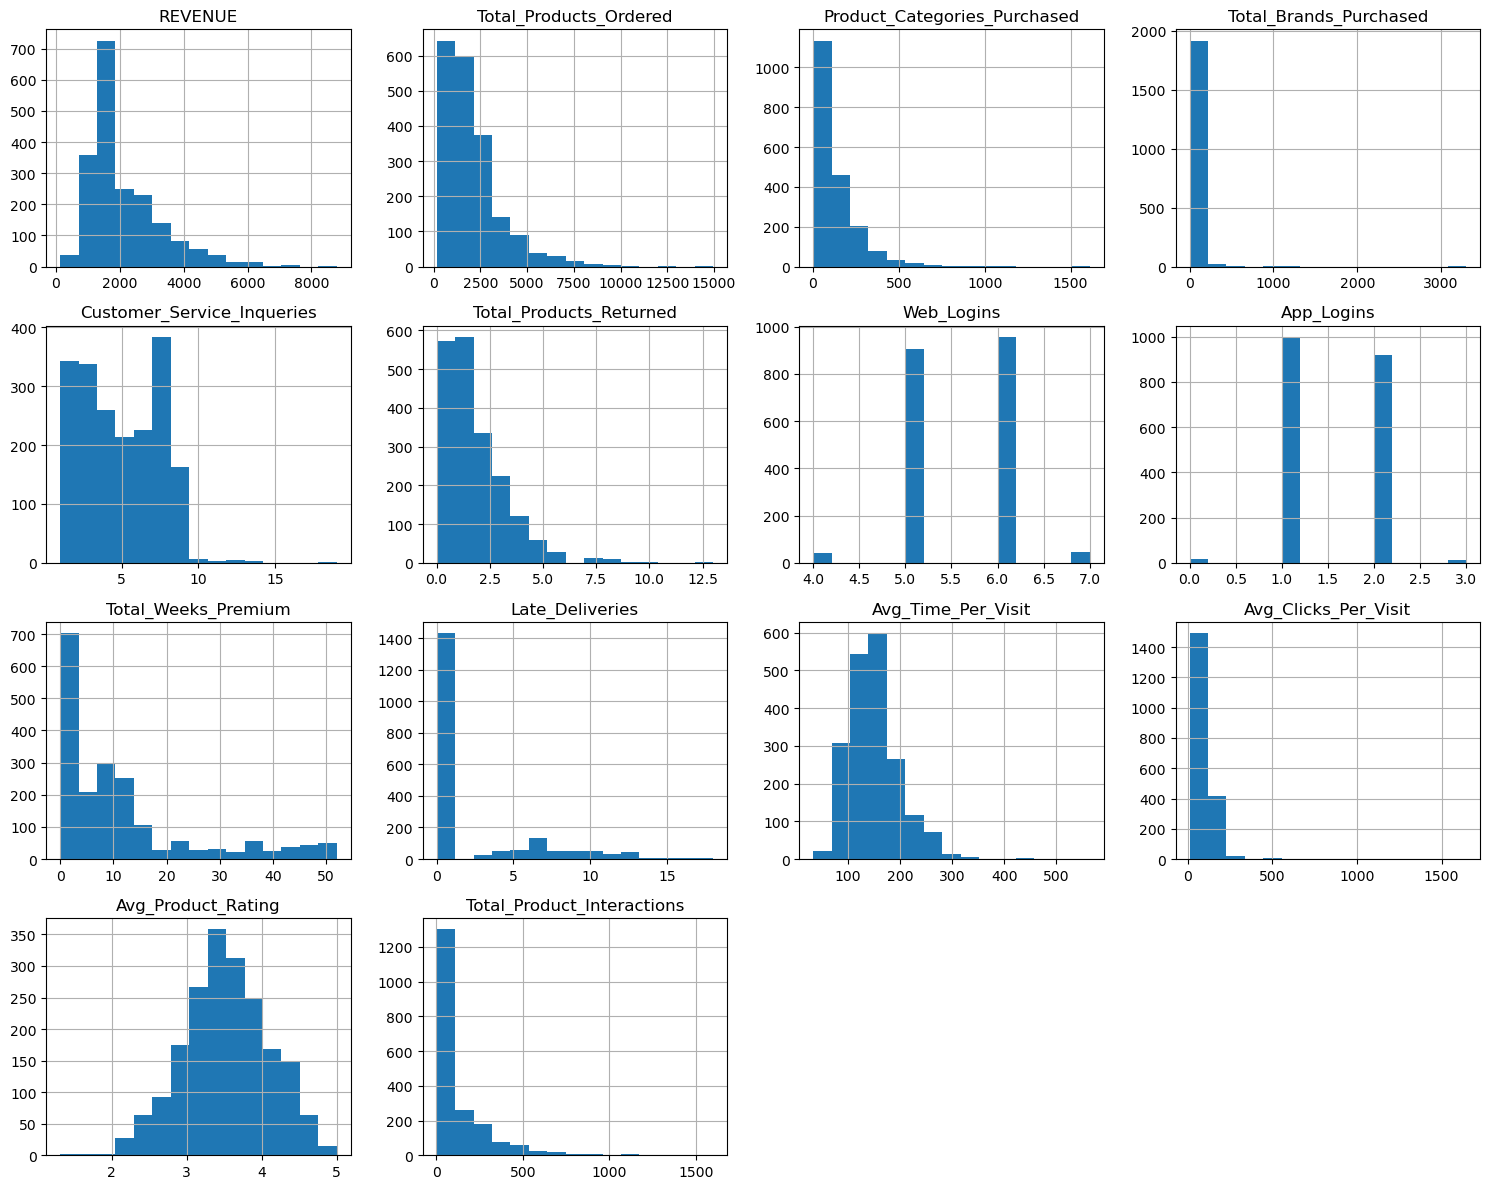

C:\tools\Anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\tools\Anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\tools\Anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\tools\Anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\tools\Anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureW

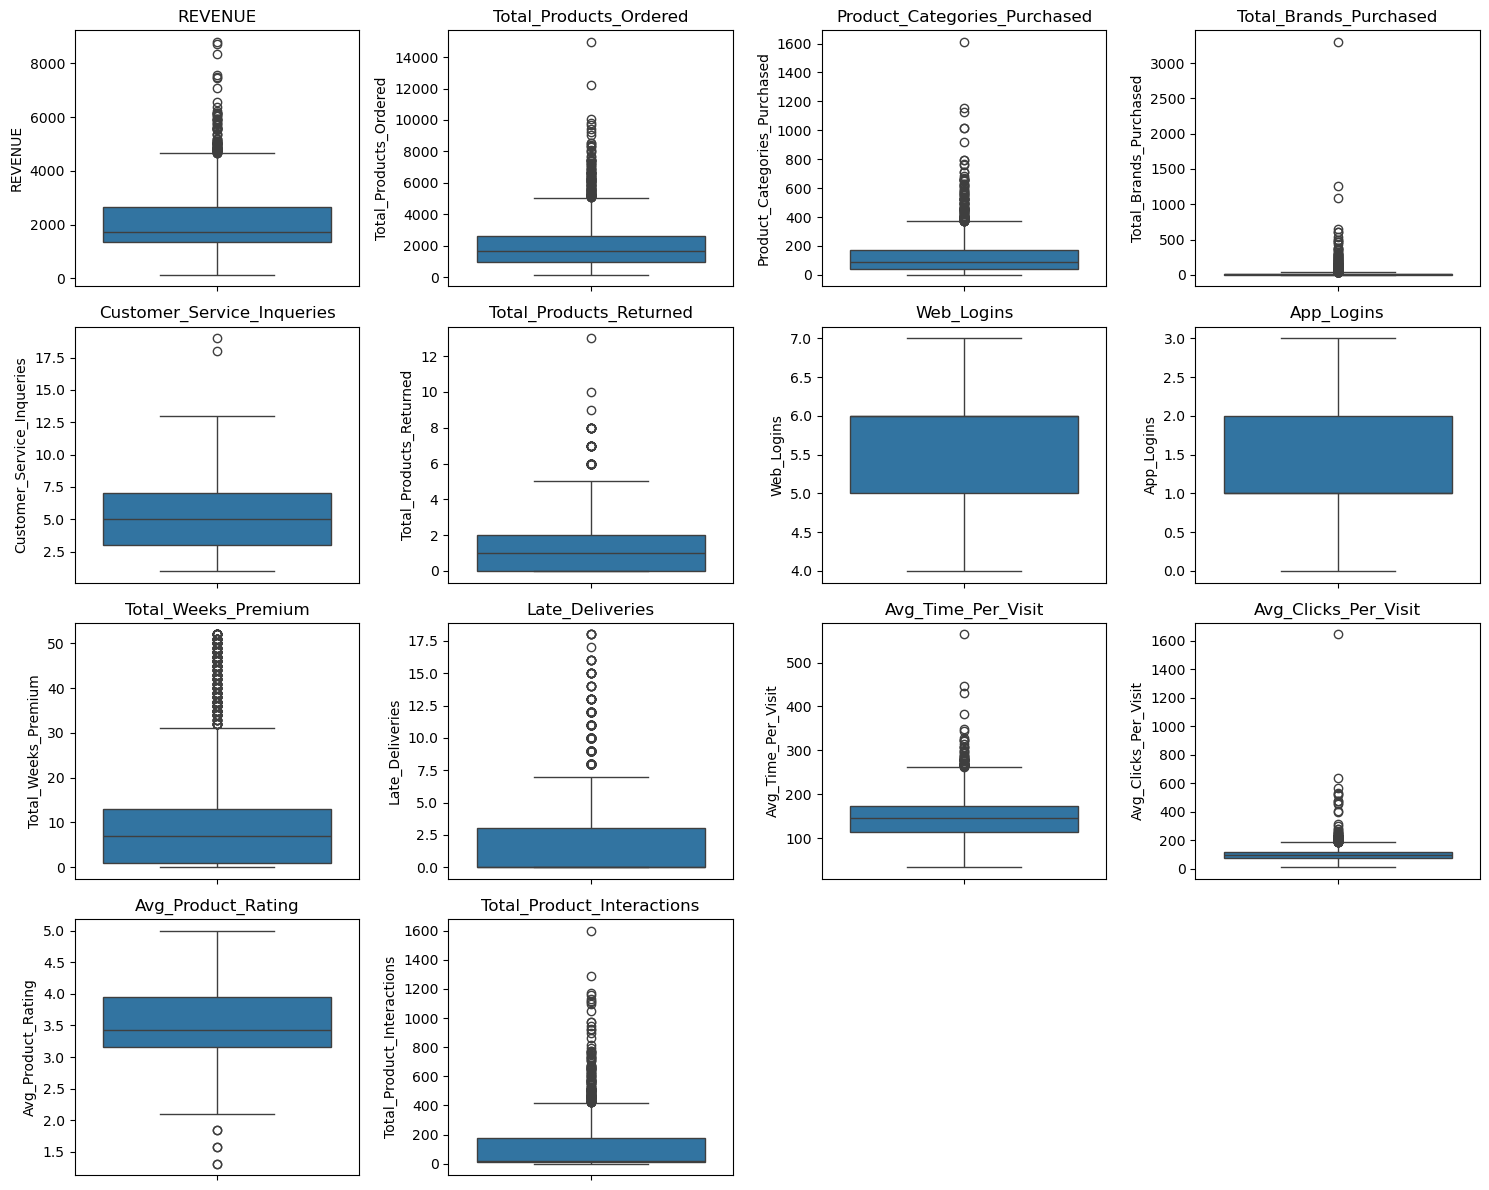

In [6]:
# Visualizing the data to identify potential outliers
# Histograms for numerical data
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Determine how many plots you need and calculate the layout
num_plots = len(numerical_features)
num_columns = 4  # You can adjust this number based on your preference
num_rows = (num_plots + num_columns - 1) // num_columns  # This ensures you have enough rows

# Create histograms
df[numerical_features].hist(bins=15, figsize=(15, num_rows * 3), layout=(num_rows, num_columns))
plt.tight_layout()
plt.show()

# Create boxplots
plt.figure(figsize=(15, num_rows * 3))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(data=df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Correlations:</h2></b>
</div>

<b>Customer Engagement & Revenue</b><br> 
(+0.64 Correlation: Avg_Time_Per_Visit & Revenue)
Higher platform engagement correlates with increased spending.<br>


<b>Product Ratings & Revenue</b><br>
(-0.55 Correlation: Avg_Product_Rating & Revenue)<br>

<b>Customer Retention & Premium Membership</b><br>
(Strong Correlation: Total_Weeks_Premium & Customer Loyalty Score)<br>
Longer premium subscriptions correlate with higher engagement.<br>

<b>Logistics & Customer Satisfaction</b><br>
(Weak Negative Correlation: Late_Deliveries & Revenue)<br>
Late deliveries have a limited short-term impact on revenue but may affect long-term retention.<br>

This correlation analysis informs data-driven decision-making by identifying key revenue drivers and operational inefficiencies that will be incorporated into predictive modeling strategies.<br>

<b>Recommendations:</b><br>

<b>Enhancing user experience (UX)</b><br>
Implementing <b>A/B testing</b> on product displays , and personalized recommendations and checkout processes may optimize sales.<br>

<b>Lower-rated products still generate sales</b><br> Sales may be driven by discounts or lack of alternatives.
Investigating customer sentiment and product quality can improve brand trust and retention.<br>

<b>Targeted retention strategies</b><br> Exclusive perks, rewards and predictive Marketing churn models can increase membership renewal rates and offering compensation for delays (discounts, free shipping) can maintain customer trust.</p>
</div>


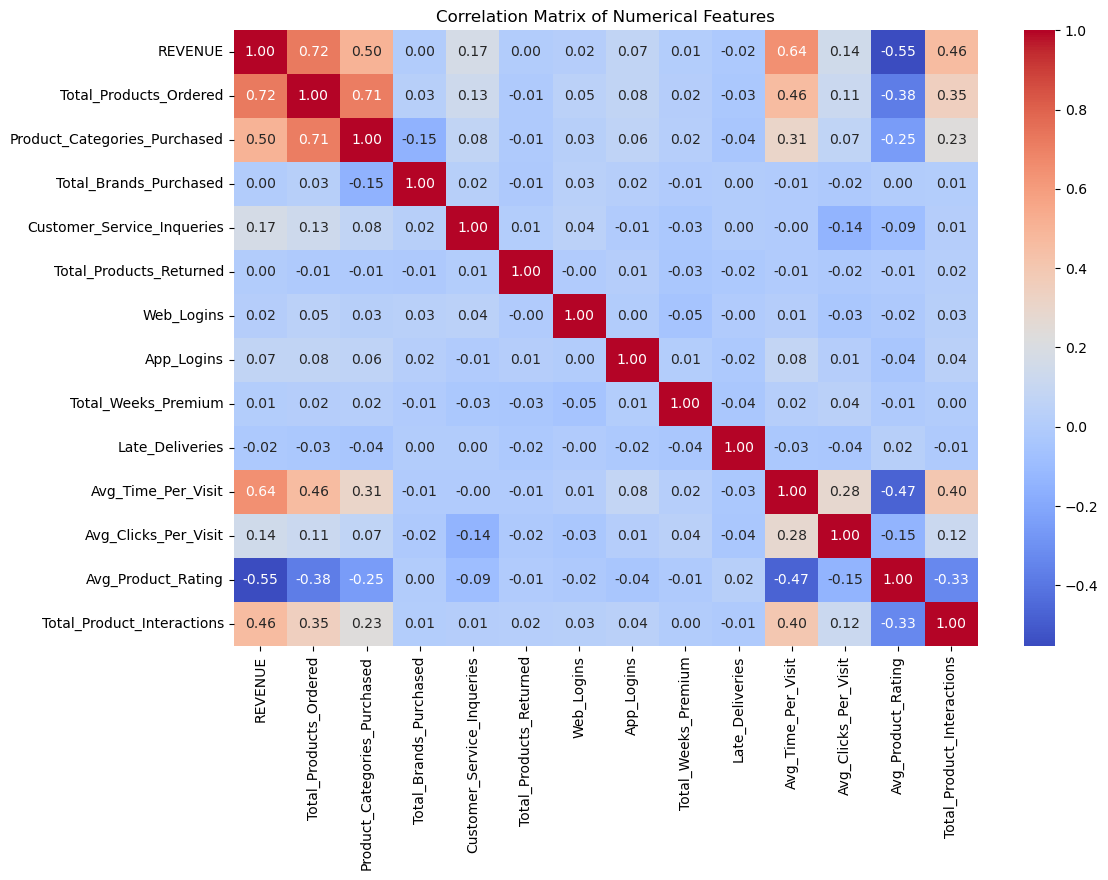

In [7]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<div style="border: 3px solid #DDA0DD; padding: 20px; background-color: #FAF3FF;">
    <h1 style="color: #DDA0DD;">DATA PREPROCESSING</h1>
  <ul>
      <li><b>Descriptive Statistics:</b> The dataset reflects significant variability in key features, with Revenue spanning a wide range and shopping patterns differing across customers.</li>
      <li><b>Feature engineering:</b> Enhances model performance by creating new, meaningful variables from the existing data.</li>
      <li><b>Customer Loyalty Score:</b> A weighted combination of Total_Weeks_Premium, Web_Logins, and App_Logins to represent long-term engagement</li>
      <li><b>Purchase Frequency Index:</b> Total_Products_Ordered divided by Total_Product_Interactions, capturing how frequently a customer makes a purchase per interaction.</li>
      <li><b>Delivery Issue Ratio:</b> Late_Deliveries divided by Total_Products_Ordered, highlighting the percentage of late deliveries per total orders.</li>
  </ul>
<p>After feature engineering, we proceed to <b>Model Development</b>, where we use the engineered features to build and evaluate predictive models.</p>
</div>

Let's back up the dataset to do further modifications in the model

In [8]:
# Ensure we're modifying the DataFrame correctly to avoid chained assignment warnings
df_cleaned = df.copy()

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Missing Value Imputation:</h2></b>
</div>

Let's fill out the missing data:
- From the column "Name" we will get the last name from between parenthesis and save it in the column "Family_Name" only when that field is empty.

In [9]:
# Extract last name from "Name" column and fill in "Family_Name" if it's empty
# Use a regular expression to extract the text inside parentheses
df_cleaned['Family_Name'] = df_cleaned['Family_Name'].fillna(
    df_cleaned['Name'].str.extract(r'\((.*?)\)')[0])

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Cleaning the Data:</h2></b>
</div>

Let's remove the parenthesis from the following columns:
- "Name" 
- "Email"

And let's include proper capitalizazation according to English Ortography rules for the columns:
- "Name"
- "First_Name"
- "Family_Name"

In [10]:
# Remove parentheses and their content from the "Name" column
df_cleaned['Name'] = df_cleaned['Name'].str.replace(r'\s*\(.*?\)', '', regex=True)

# Remove parentheses and their content from the "Email" column
df_cleaned['Email'] = df_cleaned['Email'].str.replace(r'\s*\(.*?\)', '', regex=True)

# Capitalize "Names", "First_Name", and "Family_Name"
# Apply the str.title() method
df_cleaned['Name'] = df_cleaned['Name'].str.title()
df_cleaned['First_Name'] = df_cleaned['First_Name'].str.title()
df_cleaned['Family_Name'] = df_cleaned['Family_Name'].str.title()

Let's back up the cleaned database and preview it.

In [11]:
# Let's export the cleaned dataset
df_cleaned.to_excel("Cleaned_Grocery_Getters.xlsx", index=False)   ### Personal research process.

# Preview randomly sample 20 rows
sampled_data = df_cleaned.sample(n=30, random_state=42)  # random_state ensures reproducibility

# Display the sampled data
sampled_data

Name                                 Email First_Name  \
1611       Rickard Karstark             rickard.karstark@live.com    Rickard   
1403          Arys Oakheart          arys.oakheart@protonmail.com       Arys   
974                  Serala                  serala@mcdonalds.com     Serala   
1055       Donella Hornwood         donella.hornwood@passport.com    Donella   
307            Daeron Vaith              daeron.vaith@verizon.com     Daeron   
432        Steffon Seaworth      steffon.seaworth@caterpillar.com    Steffon   
1464  Jaehaerys I Targaryen         jaehaerys.i.targaryen@aol.com  Jaehaerys   
598                    Hake                         hake@amex.com       Hake   
1087          Lyonel Tyrell         lyonel.tyrell.@protonmail.com     Lyonel   
305                  Doreah                 doreah@protonmail.com     Doreah   
367            Mandon Moore                mandon.moore@yahoo.com     Mandon   
1609     Daeron I Targaryen     daeron.i.targaryen@protonmail.com     Daeron   
1512            Eldred Codd               eldred.codd@hotmail.com     Eldred   
1480           Wynton Stout                wynton.stout@merck.com     Wynton   
1107          Ormond Osgrey                ormond.osgrey@live.com     Ormond   
1355         Urron Greyiron                urron.greyiron@aol.com      Urron   
69          Baela Targaryen         baela.targaryen@mcdonalds.com      Baela   
1605            Vardis Egen              vardis.egen@passport.com     Vardis   
438                   Shyra                  shyra@protonmail.com      Shyra   
135           Rolland Storm                  rolland.storm@me.com    Rolland   
555                   Helly                       helly@gmail.com      Helly   
99                      Hod                         hod@gmail.com        Hod   
1054  Triston Of Tally Hill  triston.of.tally.hill@protonmail.com    Triston   
1418                 Dunsen                      dunsen@yahoo.com     Dunsen   
736            Cedric Payne                cedric.payne@gmail.com     Cedric   
993                   Jeren                       jeren@gmail.com      Jeren   
247                   Tymor                     tymor@hotmail.com      Tymor   
351            Ysilla Royce              ysilla.royce@hotmail.com     Ysilla   
1293          Dornish Dilly               dornish.dilly@yahoo.com    Dornish   
56           Medwick Tyrell                medwick.tyrell@msn.com    Medwick   

        Family_Name  REVENUE  Total_Products_Ordered  \
1611       Karstark  3090.00                    3484   
1403       Oakheart  2572.50                    1757   
974          Serala  1745.00                     838   
1055       Hornwood  1805.00                     837   
307           Vaith  1220.00                    1363   
432        Seaworth  1310.00                    1439   
1464    I Targaryen  2683.50                    2991   
598            Hake  1430.00                    2342   
1087        Tyrell   1840.00                    1083   
305          Doreah  1220.00                    1734   
367           Moore  1270.00                     662   
1609    I Targaryen  3078.25                    2968   
1512           Codd  2775.00                    1789   
1480          Stout  2712.50                    1419   
1107         Osgrey  1850.00                    1127   
1355       Greyiron  2275.00                    1648   
69        Targaryen   825.00                     939   
1605           Egen  3075.00                    4976   
438           Shyra  1319.00                    1298   
135           Storm  1000.00                    1343   
555           Helly  1400.00                     701   
99              Hod   930.00                    1625   
1054  Of Tally Hill  1805.00                    1837   
1418         Dunsen  2595.00                    4076   
736           Payne  1524.00                     522   
993           Jeren  1755.00                     902   
247           Tymor  1155.00  

Let's confirm the data has been properly cleaned by previewing some lines where the data was not clean.

In [12]:
# Report lines 1085 through 1090 (these lines used to have some dirty registries)
report_lines = df_cleaned.iloc[1085:1091]  # iloc is used to select rows by position (start:end+1)
report_lines

Name                          Email First_Name Family_Name  \
1085         Bharbo               bharbo@gmail.com     Bharbo      Bharbo   
1086    Harys Swyft         harys.swyft@boeing.com      Harys       Swyft   
1087  Lyonel Tyrell  lyonel.tyrell.@protonmail.com     Lyonel     Tyrell    
1088      Theo Wull               theo.wull@me.com       Theo        Wull   
1089  Harlen Tyrell        harlen.tyrell@gmail.com     Harlen      Tyrell   
1090   Balman Byrch    balman.byrch@protonmail.com     Balman       Byrch   

      REVENUE  Total_Products_Ordered  Product_Categories_Purchased  \
1085   1840.0                    1866                            59   
1086   1840.0                    3058                           152   
1087   1840.0                    1083                            96   
1088   1840.0                     854                            81   
1089   1840.0                    1465                             8   
1090   1841.0                    2979                            84   

      Total_Brands_Purchased  Customer_Service_Inqueries  \
1085                       8                           4   
1086                      18                           5   
1087                      10                           6   
1088                       8                           7   
1089                     173                           7   
1090                      10                           3   

      Total_Products_Returned  Web_Logins  App_Logins  Total_Weeks_Premium  \
1085                        0           5           2                   11   
1086                        1           6           2                    7   
1087                        6           6           1                    7   
1088                        1           6           2                    8   
1089                        3           6           2                    8   
1090                        0           6           1                    6   

      Late_Deliveries  Avg_Time_Per_Visit  Avg_Clicks_Per_Visit  \
1085                4               170.7                108.88   
1086                0               145.6                109.28   
1087                0               182.0                 85.20   
1088                0               249.5                103.00   
1089                0               165.1                118.16   
1090                4               141.9                 85.50   

      Avg_Product_Rating  Total_Product_Interactions  
1085            3.947368                         144  
1086            3.947368                          13  
1087            4.210526                          14  
1088            3.421053                          12  
1089            3.157895                         132  
1090            3.684211                           6

And finally confirm there are no missing fields.

In [13]:
# Compare missing values in df and df_cleaned
missing_values_comparison = pd.DataFrame({
    "Missing Values (Original)": df.isnull().sum(),
    "Missing Values (Cleaned)": df_cleaned.isnull().sum()
})

# Display the result
print("\nComparison of Missing Values (df vs df_cleaned):")
display(missing_values_comparison)


Comparison of Missing Values (df vs df_cleaned):


Missing Values (Original)  \
Name                                                  0   
Email                                                 0   
First_Name                                            0   
Family_Name                                          46   
REVENUE                                               0   
Total_Products_Ordered                                0   
Product_Categories_Purchased                          0   
Total_Brands_Purchased                                0   
Customer_Service_Inqueries                            0   
Total_Products_Returned                               0   
Web_Logins                                            0   
App_Logins                                            0   
Total_Weeks_Premium                                   0   
Late_Deliveries                                       0   
Avg_Time_Per_Visit                                    0   
Avg_Clicks_Per_Visit                                  0   
Avg_Product_Rating                                    0   
Total_Product_Interactions                            0   

                              Missing Values (Cleaned)  
Name                                                 0  
Email                                                0  
First_Name                                           0  
Family_Name                                          0  
REVENUE                                              0  
Total_Products_Ordered                               0  
Product_Categories_Purchased                         0  
Total_Brands_Purchased                               0  
Customer_Service_Inqueries                           0  
Total_Products_Returned                              0  
Web_Logins                                           0  
App_Logins                                           0  
Total_Weeks_Premium                                  0  
Late_Deliveries                                      0  
Avg_Time_Per_Visit                                   0  
Avg_Clicks_Per_Visit                                 0  
Avg_Product_Rating                                   0  
Total_Product_Interactions                           0

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Futher Data Analysis:</h2></b>
</div>

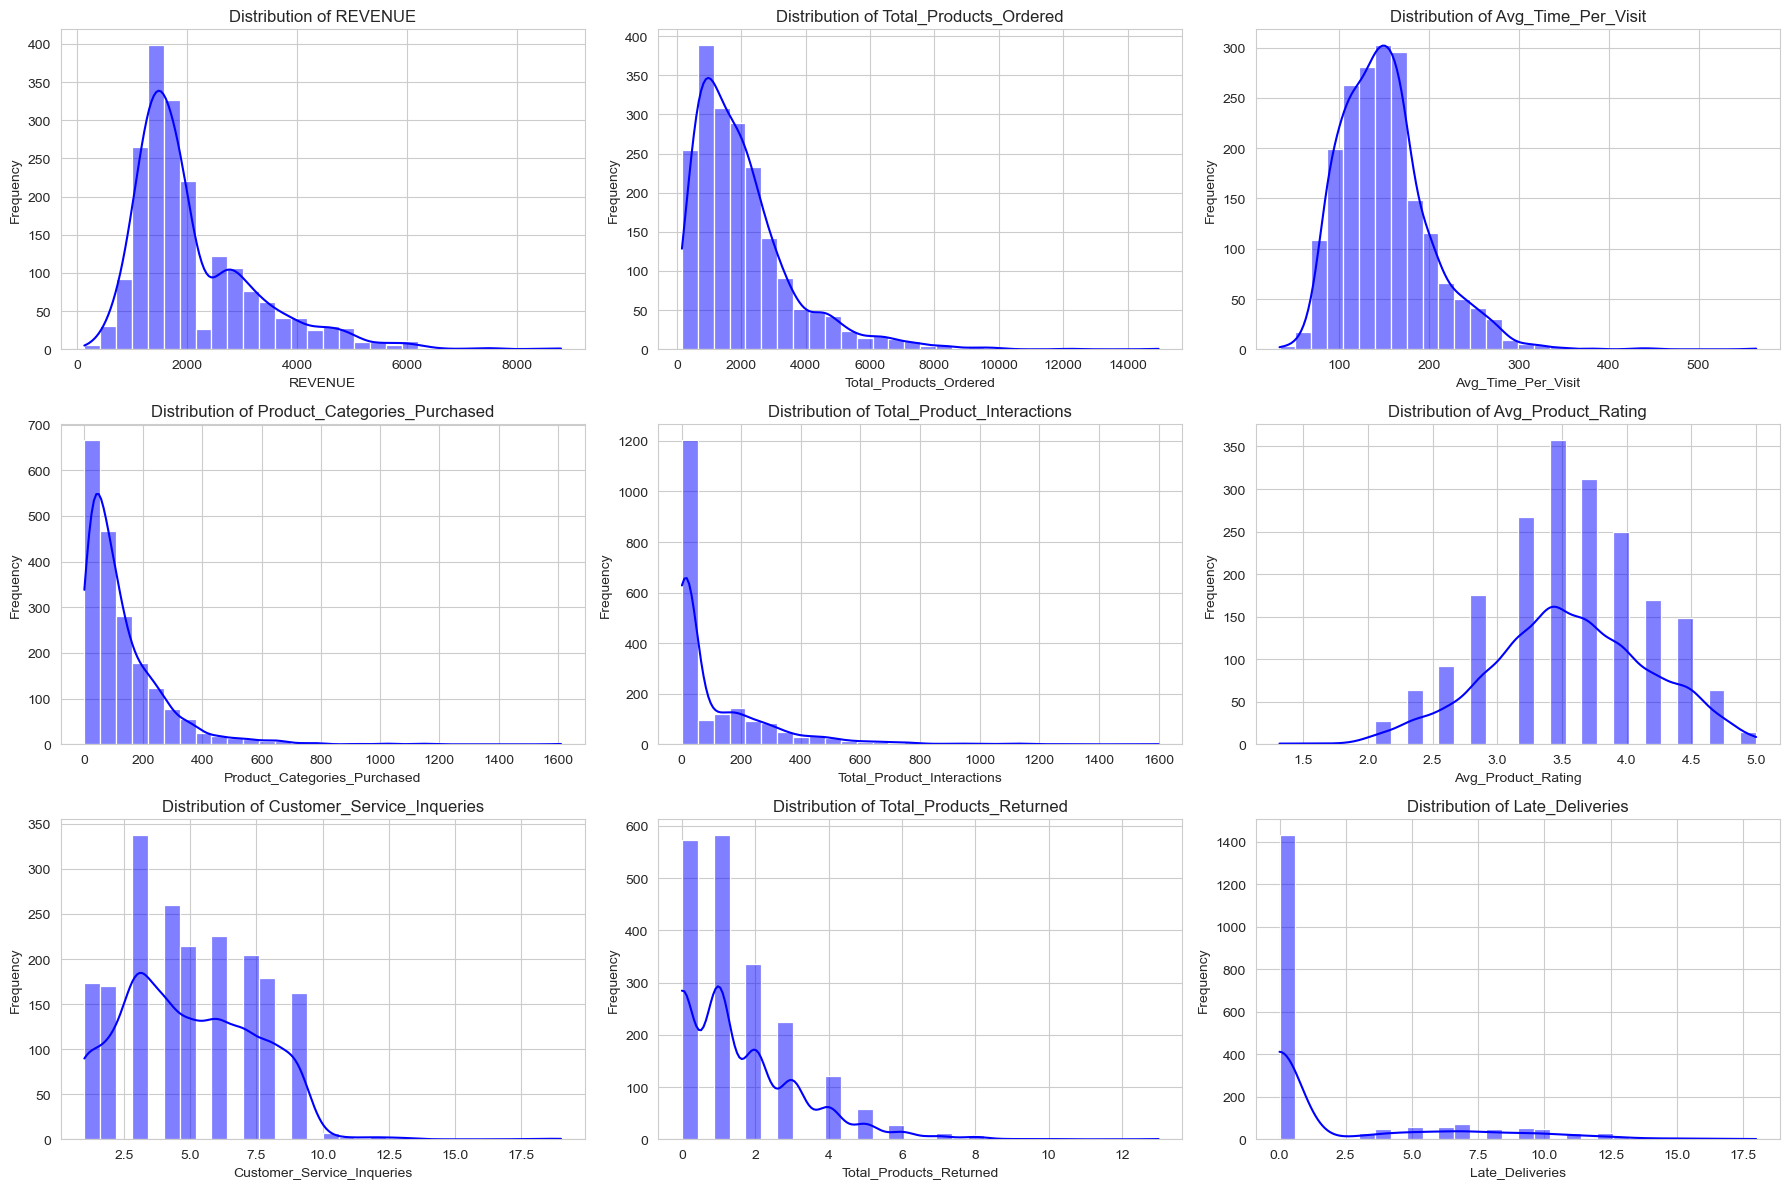

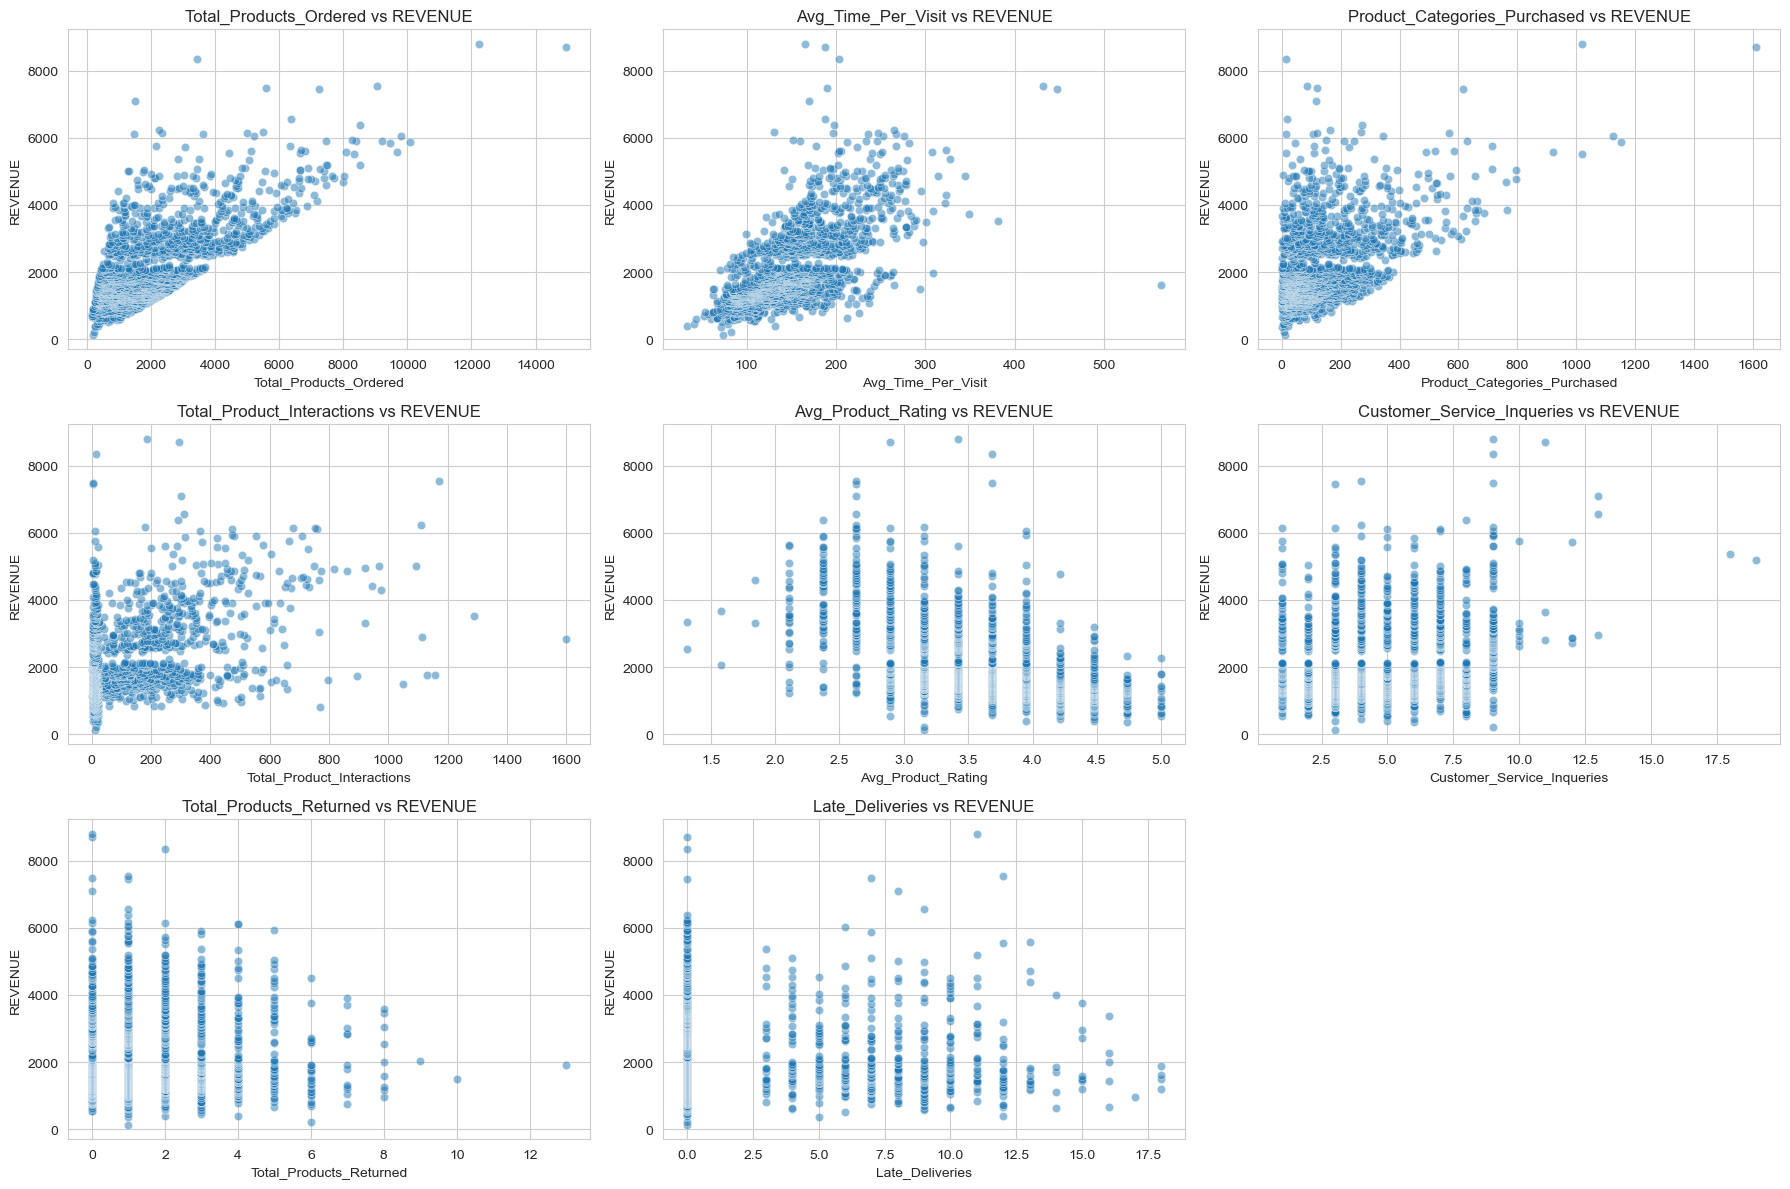

count unique                     top freq  \
Name                            1946   1946                 Skinner    1   
Email                           1946   1946  skinner@protonmail.com    1   
First_Name                      1946   1442                     Jon   21   
Family_Name                     1900   1070                    Frey   79   
REVENUE                       1946.0    NaN                     NaN  NaN   
Total_Products_Ordered        1946.0    NaN                     NaN  NaN   
Product_Categories_Purchased  1946.0    NaN                     NaN  NaN   
Total_Brands_Purchased        1946.0    NaN                     NaN  NaN   
Customer_Service_Inqueries    1946.0    NaN                     NaN  NaN   
Total_Products_Returned       1946.0    NaN                     NaN  NaN   
Web_Logins                    1946.0    NaN                     NaN  NaN   
App_Logins                    1946.0    NaN                     NaN  NaN   
Total_Weeks_Premium           1946.0    NaN                     NaN  NaN   
Late_Deliveries               1946.0    NaN                     NaN  NaN   
Avg_Time_Per_Visit            1946.0    NaN                     NaN  NaN   
Avg_Clicks_Per_Visit          1946.0    NaN                     NaN  NaN   
Avg_Product_Rating            1946.0    NaN                     NaN  NaN   
Total_Product_Interactions    1946.0    NaN                     NaN  NaN   

                                     mean          std       min       25%  \
Name                                  NaN          NaN       NaN       NaN   
Email                                 NaN          NaN       NaN       NaN   
First_Name                            NaN          NaN       NaN       NaN   
Family_Name                           NaN          NaN       NaN       NaN   
REVENUE                       2107.292652  1138.290709     131.0    1350.0   
Total_Products_Ordered         2038.92703  1557.023789     160.0    942.25   
Product_Categories_Purchased   127.988695   136.006056       1.0      39.0   
Total_Brands_Purchased          23.745632    97.488722       1.0       4.0   
Customer_Service_Inqueries       4.904933     2.502175       1.0       3.0   
Total_Products_Returned          1.570915      1.61113       0.0       0.0   
Web_Logins                        5.51593     0.580757       4.0       5.0   
App_Logins                       1.476362       0.5276       0.0       1.0   
Total_Weeks_Premium             11.329908    13.573303       0.0       1.0   
Late_Deliveries                  2.053443     3.788933       0.0       0.0   
Avg_Time_Per_Visit             150.556578     49.44718      33.4     114.4   
Avg_Clicks_Per_Visit            99.604651    62.341756     10.33      72.0   
Avg_Product_Rating               3.554795     0.614178  1.315789  3.157895   
Total_Product_Interactions     113.151593   177.152284       1.0      10.0   

                                   50%       75%      max  Missing_Values  
Name                               NaN       NaN      NaN               0  
Email                              NaN       NaN      NaN               0  
First_Name                         NaN       NaN      NaN               0  
Family_Name                        NaN       NaN      NaN              46  
REVENUE                         1740.0    2670.0  8793.75               0  
Total_Products_Ordered          1686.0    2594.0  14958.0               0  
Product_Categories_Purchased      87.5     172.0   1611.0               0  
Total_Brands_Purchased             8.0      16.0   3298.0               0  
Customer_Service_Inqueries         5.0       7.0     19.0               0  
Total_Products_Returned            1.0       2.0     13.0               0  
Web_Logins                         6.0       6.0      7.0               0  
App_Logins                         1.0       2.0      3.0               0  
Total_Weeks_Premium                7.0      13.0     52.0               0  
Late_Deliveries                    0.0 

In [14]:
# Set style for plots
sns.set_style("whitegrid")

# Histograms for key variables with 3 columns per row
key_features = ["REVENUE",
                "Total_Products_Ordered", "Avg_Time_Per_Visit", "Product_Categories_Purchased", "Total_Product_Interactions", 
                "Avg_Product_Rating", "Customer_Service_Inqueries", "Total_Products_Returned", "Late_Deliveries"]

plt.figure(figsize=(18, 12))
for i, feature in enumerate(key_features):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns for 9 features
    sns.histplot(df[feature], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Scatter Plots of Key Features vs Revenue with 3 columns per row
scatter_features = ["Total_Products_Ordered", "Avg_Time_Per_Visit", "Product_Categories_Purchased", 
                   "Total_Product_Interactions", "Avg_Product_Rating", "Customer_Service_Inqueries", 
                   "Total_Products_Returned", "Late_Deliveries"]

plt.figure(figsize=(18, 12))
for i, feature in enumerate(scatter_features):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns for 8 scatter plots
    sns.scatterplot(x=df[feature], y=df["REVENUE"], alpha=0.5)
    plt.title(f"{feature} vs REVENUE")
    plt.xlabel(feature)
    plt.ylabel("REVENUE")

plt.tight_layout()
plt.show()

# Display summary stats and missing values
eda_summary = df.describe(include='all').transpose()
eda_summary['Missing_Values'] = df.isnull().sum()

# Display the summary using pandas and IPython
import IPython.display as display
display.display(eda_summary)

<div style="border: 2px solid #DDA0DD; padding: 15px; background-color: #FAF3FF; border-radius: 8px;">
<h2> Key Insights 💡</h2>
<h3>Revenue Distribution and Relationships</h3>
<ul>
  <li><strong>Revenue is right-skewed</strong>, with most values in the lower range.</li>
  <li>Strong positive correlation with:
    <ul>
      <li>Total Products Ordered (r = 0.72)</li>
      <li>Average Time Per Visit (r = 0.64)</li>
      <li>Product Categories Purchased (r = 0.50)</li>
    </ul>
  </li>
  <li>Negative correlation with Average Product Rating (r = -0.55).</li>
</ul>

<h3>Customer Engagement Metrics</h3>
<ul>
  <li>Total Product Interactions and Total Products Ordered are key revenue drivers.</li>
  <li>Web Logins and App Logins show consistent patterns but low correlation with revenue.</li>
</ul>

<h3>Outliers and Anomalies</h3>
<ul>
  <li>Significant outliers in Total Products Ordered, Product Categories Purchased, and Total Products Returned.</li>
  <li>Consider winsorizing, log transformation, or IQR-based removal to handle these.</li>
</ul>

<h3>Feature Distribution & Normalization</h3>
<ul>
  <li>Most features are skewed; scaling or transformation (log or box-cox) is recommended.</li>
</ul>

<h3>Multicollinearity Risks</h3>
<ul>
  <li>High correlation between Total Products Ordered and Product Categories Purchased (r = 0.71).</li>
  <li>Use Variance Inflation Factor (VIF) to detect and reduce multicollinearity.</li>
</ul>

<h3>Model Improvement Strategies</h3>
<ul>
  <li>Feature engineering (interaction terms) can boost predictive power.</li>
  <li>Hyperparameter tuning (GridSearchCV) and K-Fold Cross-Validation to reduce overfitting.</li>
</ul>

</div>

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Data Optimization & Model Tuning 🔧</h2></b>
</div>

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h3>Handling Outliers:</h3></b>
    <p><b>Strategy:</b> Use statistical methods like IQR (Interquartile Range) or Z-score to detect and treat outliers.<br>
        However, instead of dropping them, I will add new features (columns) but without the outliers:
        <ul>
            <li>Winsorization: Replace extreme values with a specified percentile (e.g., 1st and 99th percentile).</li>
            <li>Transformation: Apply logarithmic or square-root transformation to reduce the impact of skewed data.</li>       
    </p>
</div>

In [15]:
# Create a copy of the cleaned DataFrame
df_tuned = df_cleaned.copy()

# Apply Winsorization and store the results in new columns
df_tuned['REVENUE_No_Outliers'] = mstats.winsorize(df_cleaned['REVENUE'], limits=[0.01, 0.01])
df_tuned['Total_Products_Ordered_No_Outliers'] = mstats.winsorize(df_cleaned['Total_Products_Ordered'], limits=[0.01, 0.01])
df_tuned['Avg_Time_Per_Visit_No_Outliers'] = mstats.winsorize(df_cleaned['Avg_Time_Per_Visit'], limits=[0.01, 0.01])

# Check the resulting DataFrame
df_tuned[['REVENUE','REVENUE_No_Outliers','Total_Products_Ordered','Total_Products_Ordered_No_Outliers','Avg_Time_Per_Visit','Avg_Time_Per_Visit_No_Outliers']].head()

REVENUE  REVENUE_No_Outliers  Total_Products_Ordered  \
0   131.00                623.0                     179   
1   222.25                623.0                     227   
2   349.00                623.0                     257   
3   393.00                623.0                     353   
4   400.00                623.0                     266   

   Total_Products_Ordered_No_Outliers  Avg_Time_Per_Visit  \
0                                 266                73.3   
1                                 266                83.2   
2                                 266                72.0   
3                                 353                33.4   
4                                 266               131.7   

   Avg_Time_Per_Visit_No_Outliers  
0                            73.3  
1                            83.2  
2                            72.0  
3                            67.2  
4                           131.7

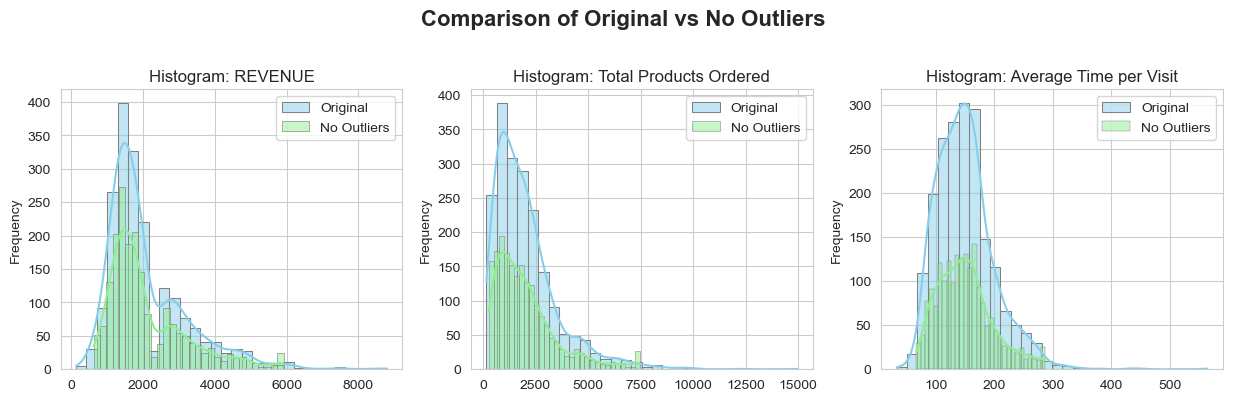

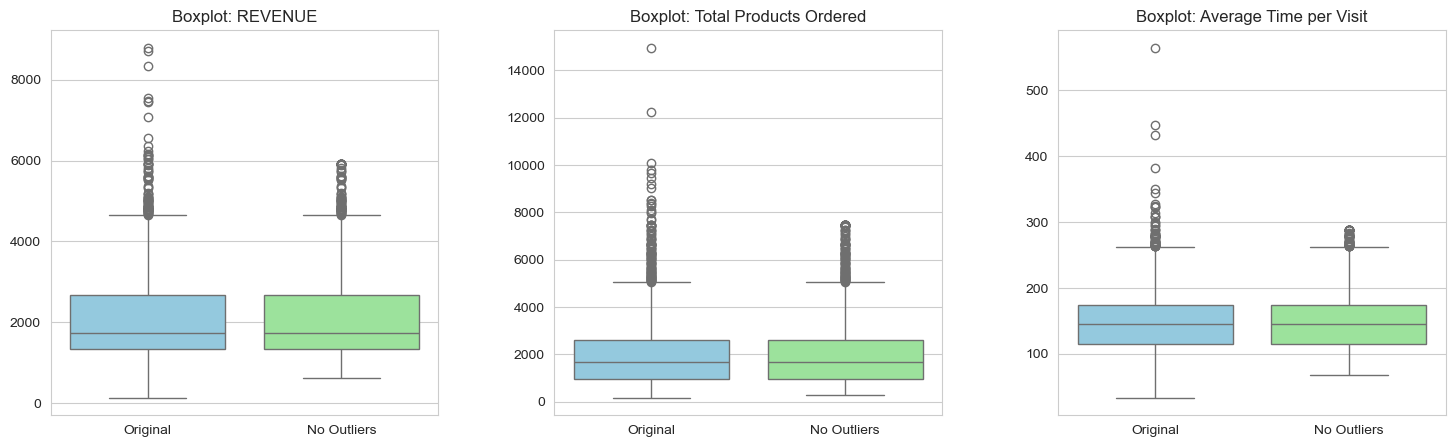

In [16]:
# Suppress FutureWarnings FOR THE DEPRECATED PINK MESSAGE WARNING
warnings.filterwarnings("ignore", category=FutureWarning)

# Variables to compare
variables_original = ['REVENUE', 'Total_Products_Ordered', 'Avg_Time_Per_Visit']
variables_no_outliers = ['REVENUE_No_Outliers', 'Total_Products_Ordered_No_Outliers', 'Avg_Time_Per_Visit_No_Outliers']

# Set style for plots
sns.set_style("whitegrid")

# Plot histograms for each variable
plt.figure(figsize=(15, 8))
plt.suptitle("Comparison of Original vs No Outliers", fontsize=16, fontweight='bold')

titles_hist = ["Histogram: REVENUE", "Histogram: Total Products Ordered", "Histogram: Average Time per Visit"]

for i, (orig_col, new_col, title) in enumerate(zip(variables_original, variables_no_outliers, titles_hist)):
    plt.subplot(2, 3, i + 1)
    
    # Histogram for the original column
    sns.histplot(df_tuned[orig_col], bins=30, kde=True, color="skyblue", edgecolor="gray", label="Original", alpha=0.5)
    
    # Histogram for the column without outliers
    sns.histplot(df_tuned[new_col], bins=30, kde=True, color="lightgreen", edgecolor="gray", label="No Outliers", alpha=0.5)
    
    plt.title(title)
    plt.xlabel("")
    plt.ylabel("Frequency")
    plt.legend()

# Create a combined DataFrame for boxplot comparison
df_long_original = df_tuned[variables_original].melt(var_name='Variable', value_name='Value')
df_long_original['Dataset'] = 'Original'

df_long_no_outliers = df_tuned[variables_no_outliers].melt(var_name='Variable', value_name='Value')
df_long_no_outliers['Variable'] = df_long_no_outliers['Variable'].str.replace('_No_Outliers', '')
df_long_no_outliers['Dataset'] = 'No Outliers'

combined_df = pd.concat([df_long_original, df_long_no_outliers])

# Create subplots for boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.subplots_adjust(wspace=0.3)

titles_box = ["Boxplot: REVENUE", "Boxplot: Total Products Ordered", "Boxplot: Average Time per Visit"]

for i, (col, title) in enumerate(zip(variables_original, titles_box)):
    temp_df = combined_df[combined_df['Variable'] == col]
    sns.boxplot(data=temp_df, x='Dataset', y='Value', ax=axes[i], hue='Dataset', palette=['skyblue', 'lightgreen'], dodge=False)
    axes[i].set_title(title)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")

# Show the plots
plt.show()

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h3>Scaling and Normalization:</h3></b>
    <p>Since some variables have high variance (e.g., Total_Products_Ordered), scaling will ensure better performance.       
    </p>
</div>

In [17]:
# Display data types and unique values
print("Data Types and Unique Values:")
print(df_cleaned.dtypes)

# Unique values for categorical variables
print("\nUnique Values Count for Categorical Variables:")
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"{col}: {df_cleaned[col].nunique()} unique values")

# Generate descriptive statistics for numerical variables
descriptive_stats = df_cleaned.describe(include='all').transpose()
descriptive_stats['Missing_Values'] = df_cleaned.isnull().sum()

# Display the descriptive statistics
print("\nSummary of Missing Values:")
descriptive_stats['Missing_Values']

Data Types and Unique Values:
Name                             object
Email                            object
First_Name                       object
Family_Name                      object
REVENUE                         float64
Total_Products_Ordered            int64
Product_Categories_Purchased      int64
Total_Brands_Purchased            int64
Customer_Service_Inqueries        int64
Total_Products_Returned           int64
Web_Logins                        int64
App_Logins                        int64
Total_Weeks_Premium               int64
Late_Deliveries                   int64
Avg_Time_Per_Visit              float64
Avg_Clicks_Per_Visit            float64
Avg_Product_Rating              float64
Total_Product_Interactions        int64
dtype: object

Unique Values Count for Categorical Variables:
Name: 1875 unique values
Email: 1943 unique values
First_Name: 1442 unique values
Family_Name: 1102 unique values

Summary of Missing Values:


Name                            0
Email                           0
First_Name                      0
Family_Name                     0
REVENUE                         0
Total_Products_Ordered          0
Product_Categories_Purchased    0
Total_Brands_Purchased          0
Customer_Service_Inqueries      0
Total_Products_Returned         0
Web_Logins                      0
App_Logins                      0
Total_Weeks_Premium             0
Late_Deliveries                 0
Avg_Time_Per_Visit              0
Avg_Clicks_Per_Visit            0
Avg_Product_Rating              0
Total_Product_Interactions      0
Name: Missing_Values, dtype: int64

In [18]:
# Create a copy of the cleaned dataset
df_tuned = df_cleaned.copy()

# Variables to scale (identified from descriptive statistics)
scaled_features = ['Total_Products_Ordered', 'Avg_Time_Per_Visit', 'Avg_Clicks_Per_Visit']

# Apply StandardScaler to the selected features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[scaled_features])

# Add the scaled features to df_tuned with new column names
df_tuned['Total_Products_Ordered_scaled'] = scaled_data[:, 0]
df_tuned['Avg_Time_Per_Visit_scaled'] = scaled_data[:, 1]
df_tuned['Avg_Clicks_Per_Visit_scaled'] = scaled_data[:, 2]

# Display the updated DataFrame with the new scaled features
df_tuned[['Total_Products_Ordered','Total_Products_Ordered_scaled','Avg_Time_Per_Visit','Avg_Time_Per_Visit_scaled','Avg_Clicks_Per_Visit','Avg_Clicks_Per_Visit_scaled']].head()

Total_Products_Ordered  Total_Products_Ordered_scaled  Avg_Time_Per_Visit  \
0                     179                      -1.194847                73.3   
1                     227                      -1.164011                83.2   
2                     257                      -1.144738                72.0   
3                     353                      -1.083067                33.4   
4                     266                      -1.138957               131.7   

   Avg_Time_Per_Visit_scaled  Avg_Clicks_Per_Visit  \
0                  -1.562808                140.84   
1                  -1.362543                101.56   
2                  -1.589105                 85.79   
3                  -2.369937                 48.00   
4                  -0.381446                 88.00   

   Avg_Clicks_Per_Visit_scaled  
0                     0.661610  
1                     0.031373  
2                    -0.221652  
3                    -0.827983  
4                    -0.186194

In [19]:
# Let's export the cleaned dataset
df_tuned.to_excel("tuned_Grocery_Getters.xlsx", index=False)   ### Personal research process.

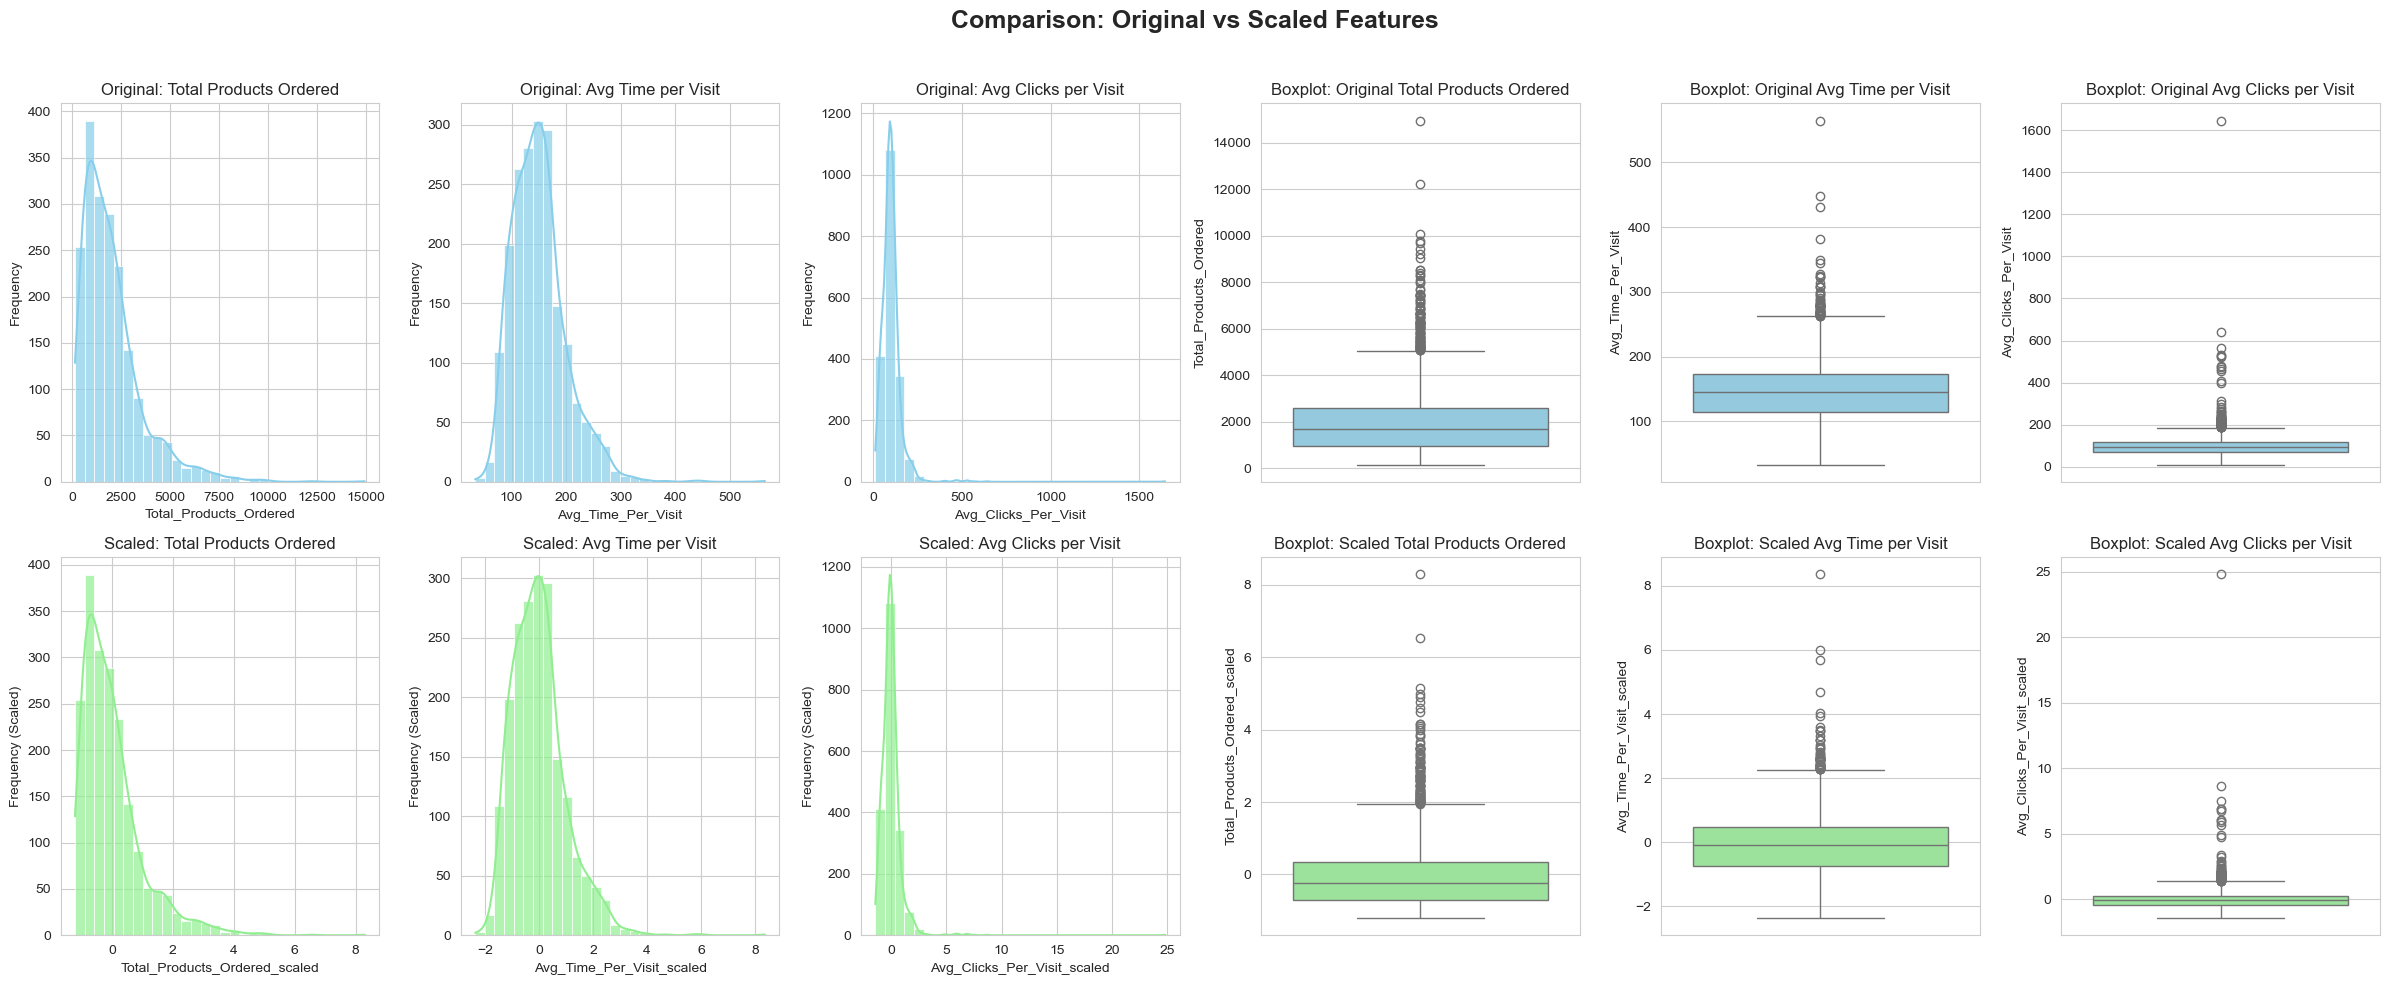

In [20]:
# Variables to compare
variables_original = ['Total_Products_Ordered', 'Avg_Time_Per_Visit', 'Avg_Clicks_Per_Visit']
variables_scaled = ['Total_Products_Ordered_scaled', 'Avg_Time_Per_Visit_scaled', 'Avg_Clicks_Per_Visit_scaled']

# Set style for plots
sns.set_style("whitegrid")

# Create a 2-row, 6-column grid for the plots
fig, axes = plt.subplots(2, 6, figsize=(24, 10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
plt.suptitle("Comparison: Original vs Scaled Features", fontsize=18, fontweight='bold')

titles = ["Total Products Ordered", "Avg Time per Visit", "Avg Clicks per Visit"]

# Plot histograms and boxplots for original variables (Top Row)
for i, col in enumerate(variables_original):
    # Histograms
    sns.histplot(df_tuned[col], bins=30, kde=True, ax=axes[0, i], color="skyblue", alpha=0.7)
    axes[0, i].set_title(f"Original: {titles[i]}")
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel("Frequency")
    
    # Boxplots
    sns.boxplot(data=df_tuned, y=col, ax=axes[0, i + 3], color="skyblue")
    axes[0, i + 3].set_title(f"Boxplot: Original {titles[i]}")
    axes[0, i + 3].set_ylabel(col)
    axes[0, i + 3].set_xlabel("")

# Plot histograms and boxplots for scaled variables (Bottom Row)
for i, col in enumerate(variables_scaled):
    # Histograms
    sns.histplot(df_tuned[col], bins=30, kde=True, ax=axes[1, i], color="lightgreen", alpha=0.7)
    axes[1, i].set_title(f"Scaled: {titles[i]}")
    axes[1, i].set_xlabel(col)
    axes[1, i].set_ylabel("Frequency (Scaled)")
    
    # Boxplots
    sns.boxplot(data=df_tuned, y=col, ax=axes[1, i + 3], color="lightgreen")
    axes[1, i + 3].set_title(f"Boxplot: Scaled {titles[i]}")
    axes[1, i + 3].set_ylabel(col)
    axes[1, i + 3].set_xlabel("")

# Show the final plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<b>As observed the graphics look the same but they are scaled now making the data more compressed.</b>

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h3>Further Tuning Methods:</h3></b>
    <p>To further improve the data tuning it is advisable to use methods not shared in class, such as:
        <ul>
            <li><b>Reducing Multicollinearity:</b> Check for multicollinearity among the features using a Variance 
                Inflation Factor (VIF). High VIF values indicate redundancy.</li>
            <li><b>Hyperparameter Tuning:</b> Use GridSearchCV or RandomizedSearchCV to tune the hyperparameters of your models
                (e.g., Lasso, Ridge, SGDRegressor) for optimal results.</li>
            <li><b>Cross-Validation & Model Selection:</b> Use cross-validation to ensure that your model generalizes well to 
                unseen data. Also, try multiple models (Lasso, Ridge, KNN) and compare their performance using RMSE and R2. </li>
        </ul>      
    </p>
</div>

As we can see the histograms and boxplots do not change in behaviour of the data, because they just were rescaled.

<div style="border: 3px solid #DDA0DD; padding: 20px; background-color: #FAF3FF;">
    <h1 style="color: #DDA0DD;">FEATURE ENGINEERING</h1>
        <p>Enhances model performance by creating new, meaningful variables from the existing data.</p>
        <p>Based on the data analysis, Four categories of engineered features were made to boost the 5 models' performance:</p>
      <ul>
          <li><b>Behavior-Based Features.</b></li>
          <li><b>Monetary-Based Features.</b></li>
          <li><b>Loyalty Features.</b></li>
          <li><b>Issue Related Features.</b></li>
  </ul>
</div>

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Behavior-Based Features:</h2></b>
    <p>
    <ul>
        <li><b>Interaction Intensity:</b> Combines total interactions (clicks, logins, and products ordered).</li>
        <li><b>Engagement Duration:</b> Combines Avg_Time_Per_Visit and Total_Weeks_Premium.</li>
        <li><b>Online Engagement Score:</b> Sum of Web_Logins and App_Logins.</li>
        <li><b>Engagement Score:</b> Combine multiple customer activity metrics (Web_Logins, App_Logins, Total_Product_Interactions, and Avg_Time_Per_Visit) to create a single score representing customer engagement. This will reduce feature complexity while preserving information.</li>
    </ul>
    </p>
</div>

In [21]:
# Behavior-Based Features
df_tuned['Interaction_Intensity'] = df_tuned['Total_Products_Ordered'] + df_tuned['Total_Product_Interactions'] + df_tuned['Avg_Clicks_Per_Visit']
df_tuned['Engagement_Duration'] = df_tuned['Avg_Time_Per_Visit'] * df_tuned['Total_Weeks_Premium']
df_tuned['Online_Engagement_Score'] = df_tuned['Web_Logins'] + df_tuned['App_Logins']

# Engagement_Score = 0.4 × Web_Logins + 0.3 × App_Logins + 0.2 × Total_Product_Interactions + 0.1 × Avg_Time_Per_Visit
# Creating the Engagement Score
df_tuned['Engagement_Score'] = (0.4 * df_tuned['Web_Logins'] +
                                  0.3 * df_tuned['App_Logins'] +
                                  0.2 * df_tuned['Total_Product_Interactions'] +
                                  0.1 * df_tuned['Avg_Time_Per_Visit'])
# Visualize
df_tuned[['Interaction_Intensity','Engagement_Duration','Online_Engagement_Score','Engagement_Score']].head(5)

Interaction_Intensity  Engagement_Duration  Online_Engagement_Score  \
0                 331.84                879.6                        7   
1                 343.56               2745.6                        8   
2                 362.79                432.0                        7   
3                 406.00                  0.0                        5   
4                 373.00                263.4                        7   

   Engagement_Score  
0             12.43  
1             14.32  
2             13.90  
3              6.34  
4             19.67

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Monetary-Based Features:</h2></b>
    <p><ul>
        <li><b>Monetary Value:</b> Uses REVENUE to represent total spending by calculated quantiles (33rd and 66th percentiles).</li>
        <li><b>Customer Support Need:</b> Combines Customer_Service_Inqueries and Total_Products_Returned.</li>
    </ul></p>
</div>

In [22]:
# Create Monetary_Value group categories based on quantiles (33rd and 66th percentiles)
df_tuned['Monetary_Value_Group'] = pd.cut(
    df_tuned['REVENUE'],
    bins=[
        df_tuned['REVENUE'].min(),                                  # Minimum value
        df_tuned['REVENUE'].quantile(0.33),                         # 33rd percentile
        df_tuned['REVENUE'].quantile(0.66),                         # 66th percentile
        df_tuned['REVENUE'].max()                                   # Maximum value
    ],
    labels=['Low Spender', 'Regular Spender', 'Crazy Spender'],
    include_lowest=True
)

# Optionally, add a numerical column for the group
df_tuned['Monetary_Value_Num'] = df_tuned['Monetary_Value_Group'].map({
    'Low Spender': 1,
    'Regular Spender': 2,
    'Crazy Spender': 3
})

# Monetary-Based Features
df_tuned['Customer_Support_Need'] = df_tuned['Customer_Service_Inqueries'] + df_tuned['Total_Products_Returned']

In [23]:
# Sample 2 random records per Monetary_Value_Group created
sampled_data = (
    df_tuned.groupby('Monetary_Value_Group', group_keys=False, observed=True)
    .sample(n=2, random_state=42)
    .loc[:, ['REVENUE', 'Monetary_Value_Group', 'Monetary_Value_Num', 'Customer_Support_Need']]
    .reset_index(drop=True))

# Display the sampled data
sampled_data

REVENUE Monetary_Value_Group Monetary_Value_Num  Customer_Support_Need
0   1450.0          Low Spender                  1                      3
1   1270.0          Low Spender                  1                      5
2   2010.0      Regular Spender                  2                      7
3   1755.0      Regular Spender                  2                      6
4   3015.0        Crazy Spender                  3                      9
5   3630.0        Crazy Spender                  3                      9

C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


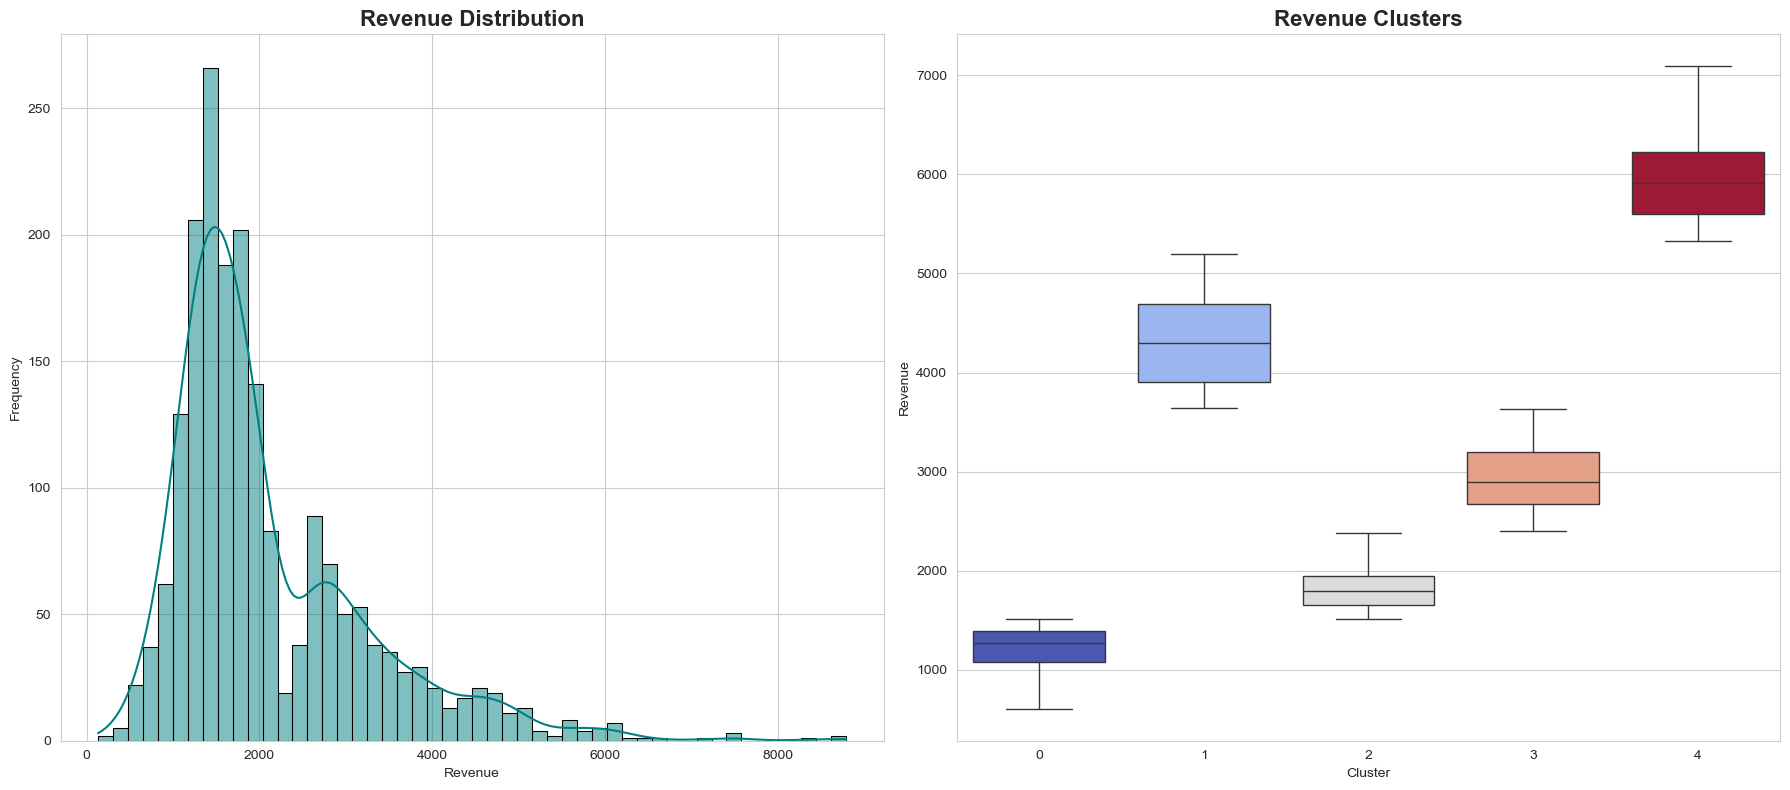


Proposed Revenue Breakpoints:


array([1207.09739369, 1818.4814376 , 2946.54724409, 4316.0625    ,
       6232.91554054])

In [24]:
# One-row, two-column layout
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# Plot 1: Revenue Distribution
sns.histplot(df_tuned['REVENUE'], bins=50, kde=True, color='teal', edgecolor='black', ax=axes[0])
axes[0].set_title("Revenue Distribution", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Revenue")
axes[0].set_ylabel("Frequency")

# KMeans clustering (5 groups)
kmeans = KMeans(n_clusters=5, random_state=42)
df_tuned['Revenue_Cluster'] = kmeans.fit_predict(df_tuned[['REVENUE']])

# Plot 2: Revenue Clusters (fixing the warning by using hue)
sns.boxplot(
    x='Revenue_Cluster', 
    y='REVENUE', 
    data=df_tuned, 
    hue='Revenue_Cluster',  # Use the same column for color differentiation
    dodge=False,            # No overlapping boxes
    palette='coolwarm',
    showfliers=False,
    ax=axes[1]
)
axes[1].legend_.remove()  # Remove redundant legend
axes[1].set_title("Revenue Clusters", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Revenue")

# Show plots
plt.tight_layout()
plt.show()

# Print proposed breakpoints
breakpoints = np.sort(kmeans.cluster_centers_.flatten())
print("\nProposed Revenue Breakpoints:")
breakpoints

<b>Improved grouping of clients by looking at Monetary_Value</b>

In [25]:
# Define breakpoints based on clustering analysis
breakpoints = [df_tuned['REVENUE'].min(), 1818, 2947, 4316, 6233, df_tuned['REVENUE'].max()]

# Create Monetary_Value_Group based on the defined breakpoints
df_tuned['Monetary_Value_Group'] = pd.cut(
    df_tuned['REVENUE'],
    bins=breakpoints,
    labels=['Low Spender', 'Budget Conscious Spender', 'Regular Spender', 'High Spender', 'Crazy Spender'],
    include_lowest=True
)

# Optionally, create a numerical column for the group
df_tuned['Monetary_Value_Num'] = df_tuned['Monetary_Value_Group'].map({
    'Low Spender': 1,
    'Budget Conscious Spender': 2,
    'Regular Spender': 3,
    'High Spender': 4,
    'Crazy Spender': 5
})

# Sample 2 random records per Monetary_Value_Group created
sampled_data = (
    df_tuned.groupby('Monetary_Value_Group', group_keys=False, observed=True)
    .sample(n=2, random_state=42)
    .loc[:, ['REVENUE', 'Monetary_Value_Group', 'Monetary_Value_Num', 'Customer_Support_Need']]
    .reset_index(drop=True))

# Display the sampled data
sampled_data

REVENUE      Monetary_Value_Group Monetary_Value_Num  Customer_Support_Need
0  1450.00               Low Spender                  1                     11
1  1448.00               Low Spender                  1                      8
2  2140.00  Budget Conscious Spender                  2                      8
3  1850.00  Budget Conscious Spender                  2                      6
4  3937.50           Regular Spender                  3                      7
5  3105.00           Regular Spender                  3                      9
6  4920.00              High Spender                  4                      6
7  4672.50              High Spender                  4                      5
8  8347.50             Crazy Spender                  5                     11
9  8793.75             Crazy Spender                  5                      9

<b>Improved grouping of clients by looking at Elastic Net Results</b>

C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


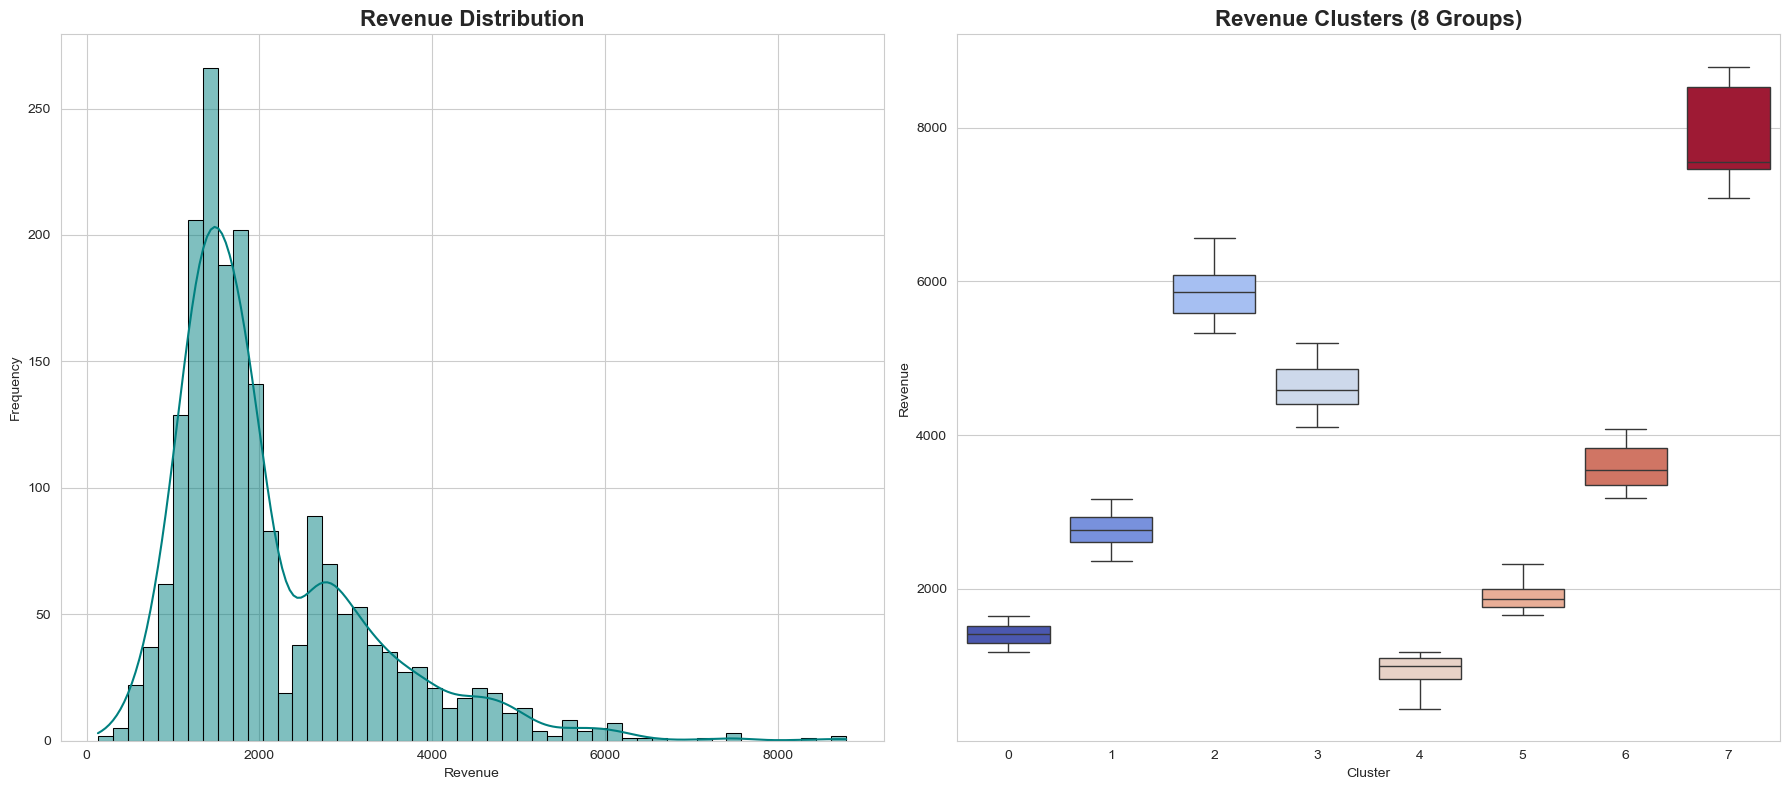


Proposed Breakpoints: 10
[ 131.          944.13878327 1412.29274194 1889.82421053 2776.41755319
 3576.86176471 4621.8270202  5840.025      7916.73214286 8793.75      ]


In [26]:
# Step 1: Generate 8 breakpoints using KMeans cluster centers
kmeans = KMeans(n_clusters=8, random_state=42)
df_tuned['Revenue_Cluster'] = kmeans.fit_predict(df_tuned[['REVENUE']])
breakpoints = np.sort(kmeans.cluster_centers_.flatten())

# Add min and max values to ensure full coverage of revenue range
breakpoints = np.concatenate(([df_tuned['REVENUE'].min()], breakpoints, [df_tuned['REVENUE'].max()]))

# Step 2: One-row, two-column layout for visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# Plot 1: Revenue Distribution
sns.histplot(df_tuned['REVENUE'], bins=50, kde=True, color='teal', edgecolor='black', ax=axes[0])
axes[0].set_title("Revenue Distribution", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Revenue")
axes[0].set_ylabel("Frequency")

# Plot 2: Revenue Clusters with KMeans (8 groups)
sns.boxplot(
    x='Revenue_Cluster', 
    y='REVENUE', 
    data=df_tuned, 
    hue='Revenue_Cluster',  
    dodge=False,            
    palette='coolwarm',
    showfliers=False,
    ax=axes[1]
)
axes[1].legend_.remove()  # Remove redundant legend
axes[1].set_title("Revenue Clusters (8 Groups)", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Revenue")

# Show plots
plt.tight_layout()
plt.show()

print("\nProposed Breakpoints:", len(breakpoints))
print(breakpoints)

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Loyalty Features:</h2></b>
    <p>
        <ul>
            <li><b>Brand Loyalty:</b> Ratio of Total_Brands_Purchased to Product_Categories_Purchased 
                (higher ratio indicates strong brand preference)</li>
            <li><b>Purchase Frequency Index:</b> Total_Products_Ordered divided by Total_Product_Interactions, capturing how frequently a customer makes a purchase per interaction.</li>
            <li><b>Customer Loyalty Score:</b> A weighted combination of Total_Weeks_Premium, 
                Web_Logins, and App_Logins to represent long-term engagement.</li>
            <li><b>Premium Membership Loyalty:</b> Create a binary feature indicating whether a customer 
                has been a premium member for more than 12 weeks (3 months), which could significantly affect their revenue contributions.</li>
        </ul>
    </p>
</div>

In [27]:
# Count how many zeros exist in specific columns
count_categories_zero = (df_tuned['Product_Categories_Purchased'] == 0).sum()
count_orders_zero = (df_tuned['Total_Products_Ordered'] == 0).sum()

# Print the results
print(f"Product_Categories_Purchased has {count_categories_zero} records with zero values.")
print(f"Total_Products_Ordered has {count_orders_zero} records with zero values.")

Product_Categories_Purchased has 0 records with zero values.
Total_Products_Ordered has 0 records with zero values.


In [28]:
# Product Preference Feature
df_tuned['Brand_Loyalty'] = df_tuned['Total_Brands_Purchased'] / (df_tuned['Product_Categories_Purchased'])

# Purchase_Frequency_Index Formula
df_tuned["Purchase_Frequency_Index"] = df_tuned["Total_Products_Ordered"] / df_tuned["Total_Product_Interactions"]
df_tuned["Purchase_Frequency_Index"] = df_tuned["Purchase_Frequency_Index"].fillna(0)  # No inplace=True

# Creating the Premium Membership Loyalty binary feature
df_tuned['Premium_Loyalty_Status'] = (df_tuned['Total_Weeks_Premium'] >= 1).astype(int)

# Customer_Loyalty_Score Formula
df_tuned["Customer_Loyalty_Score"] = (
    df_tuned["Total_Weeks_Premium"] * 0.5 +
    df_tuned["Web_Logins"] * 0.3 +
    df_tuned["App_Logins"] * 0.2)

# Visualize
df_tuned[['REVENUE','Premium_Loyalty_Status','Purchase_Frequency_Index','Customer_Loyalty_Score','Brand_Loyalty']].head(5)

REVENUE  Premium_Loyalty_Status  Purchase_Frequency_Index  \
0   131.00                       1                 14.916667   
1   222.25                       1                 15.133333   
2   349.00                       1                 12.850000   
3   393.00                       0                 70.600000   
4   400.00                       1                 14.000000   

   Customer_Loyalty_Score  Brand_Loyalty  
0                     8.0       0.600000  
1                    18.7       3.375000  
2                     5.0      74.000000  
3                     1.5       4.500000  
4                     3.0       0.285714

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Issue Related Features:</h2></b>
    <li><b>Delivery Issue Ratio:</b>Late_Deliveries divided by Total_Products_Ordered, 
        highlighting the percentage of late deliveries per total orders.</li>
    <li><b>Return Rate:</b> Ratio of Total_Products_Returned to Total_Products_Ordered.</li>
</div>

In [29]:
# Count how many zeros exist in specific columns
count_total_products_zero = (df_tuned['Total_Products_Ordered'] == 0).sum()

# Print the results
print(f"Product_Categories_Purchased has {count_total_products_zero} records with zero values.")

Product_Categories_Purchased has 0 records with zero values.


In [30]:
# Product Return Rate Feature
df_tuned['Return_Rate'] = df_tuned['Total_Products_Returned'] / (df_tuned['Total_Products_Ordered'])

# Delivery_Issue_Ratio Formula
df_tuned["Delivery_Issue_Ratio"] = df_tuned["Late_Deliveries"] / df_tuned["Total_Products_Ordered"]
df_tuned["Delivery_Issue_Ratio"] = df_tuned["Delivery_Issue_Ratio"].fillna(0)  # No inplace=True

# Visualize
df_tuned[['REVENUE','Return_Rate','Delivery_Issue_Ratio']].head(5)

REVENUE  Return_Rate  Delivery_Issue_Ratio
0   131.00     0.005587              0.000000
1   222.25     0.026432              0.000000
2   349.00     0.003891              0.019455
3   393.00     0.011331              0.000000
4   400.00     0.007519              0.045113

Let's visualize 6 records with all the new Engineered Features developed:

In [31]:
# Sample 2 random records per Monetary_Value_Group created
sampled_data = (
    df_tuned.groupby('Monetary_Value_Group', group_keys=False, observed=True)
    .sample(n=2, random_state=42)
    .reset_index(drop=True))

# Display the sampled data
sampled_data.head(5).transpose()

0  \
Name                                          Ben Bones   
Email                          ben.bones@protonmail.com   
First_Name                                          Ben   
Family_Name                                       Bones   
REVENUE                                          1450.0   
Total_Products_Ordered                             1193   
Product_Categories_Purchased                         97   
Total_Brands_Purchased                                5   
Customer_Service_Inqueries                            8   
Total_Products_Returned                               3   
Web_Logins                                            6   
App_Logins                                            2   
Total_Weeks_Premium                                  24   
Late_Deliveries                                       0   
Avg_Time_Per_Visit                                131.4   
Avg_Clicks_Per_Visit                               89.0   
Avg_Product_Rating                             4.210526   
Total_Product_Interactions                           19   
Total_Products_Ordered_scaled                 -0.543437   
Avg_Time_Per_Visit_scaled                     -0.387515   
Avg_Clicks_Per_Visit_scaled                   -0.170149   
Interaction_Intensity                            1301.0   
Engagement_Duration                              3153.6   
Online_Engagement_Score                               8   
Engagement_Score                                  19.94   
Monetary_Value_Group                        Low Spender   
Monetary_Value_Num                                    1   
Customer_Support_Need                                11   
Revenue_Cluster                                       0   
Brand_Loyalty                                  0.051546   
Purchase_Frequency_Index                      62.789474   
Premium_Loyalty_Status                                1   
Customer_Loyalty_Score                             14.2   
Return_Rate                                    0.002515   
Delivery_Issue_Ratio                                0.0   

                                                    1  \
Name                                     Gerald Gower   
Email                          gerald.gower@gmail.com   
First_Name                                     Gerald   
Family_Name                                     Gower   
REVENUE                                        1448.0   
Total_Products_Ordered                            380   
Product_Categories_Purchased                       34   
Total_Brands_Purchased                              4   
Customer_Service_Inqueries                          3   
Total_Products_Returned                             5   
Web_Logins                                          4   
App_Logins                                          1   
Total_Weeks_Premium                                 0   
Late_Deliveries                                     4   
Avg_Time_Per_Visit                              111.2   
Avg_Clicks_Per_Visit                             94.0   
Avg_Product_Rating                           4.473684   
Total_Product_Interactions                         20   
Total_Products_Ordered_scaled               -1.065721   
Avg_Time_Per_Visit_scaled                   -0.796136   
Avg_Clicks_Per_Visit_scaled                 -0.089925   
Interaction_Intensity                           494.0   
Engagement_Duration                               0.0   
Online_Engagement_Score                             5   
Engagement_Score                                17.02   
Monetary_Value_Group                      Low Spender   
Monetary_Value_Num                                  1   
Customer_Support_Need                               8   
Revenue_Cluster                                     0   
Brand_Loyalty                                0.117647   
Purchase_Frequency_Index                         19.0   
Premium_Loyalty_Status                              0   
Customer_Loyalty_Score                          

Let's see how are the correlations now with these new 6 variables.

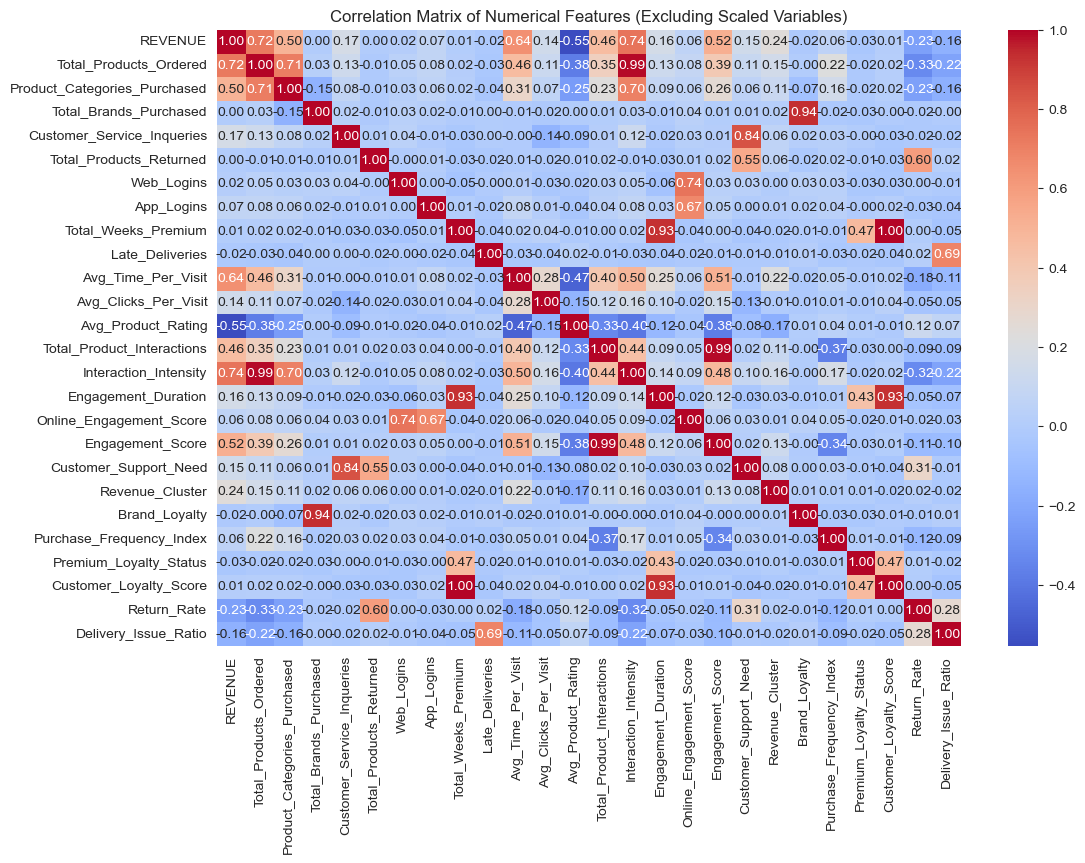

In [32]:
# Select only numeric columns for the correlation matrix, excluding columns with '_scaled'
numeric_df = df_tuned.select_dtypes(include=[np.number])
numeric_df = numeric_df[[col for col in numeric_df.columns if '_scaled' not in col]]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features (Excluding Scaled Variables)')
plt.show()

<div style="border: 3px solid #DDA0DD; padding: 20px; background-color: #FAF3FF;">
    <b><h1 style="color: #DDA0DD;">CANDIDATE MODEL REGRESSION</h1></b>
    <b><p>Permitted Model Types:</p></b>
    <p>
        <ul>
            <li>OLS Linear Regression</li>
            <li>Lasso Regression</li>
            <li>Ridge Regression</li>
            <li>Elastic Net Regression</li>
            <li>K-Nearest Neighbors Regression</li>
    </p>
</div>

The goal is that the GAP is minimized and becomes < 0.05. <b>WHY?</b>

<b>A Small Gap (< 0.05) means that:</b>
- The model generalizes well and is not overfitting.
- The model is stable and reliable for making predictions on new data.<br>

<b>A Large Gap (> 0.05):</b>
- The model is likely overfitting (performing too well on training data but poorly on test data).
- What needs to be done is to reduce complexity, adjust regularization (alpha), or get more training data.

<div style="border: 2px solid #DDA0DD; padding: 15px; background-color: #FAF3FF; border-radius: 8px;">
    <h2 style="color: #DDA0DD;"> Key Insights 💡</h2>
    <p style="margin-left: 20px; font-size: 14px;">
        After trial and error notice that each model reacts differently to how the data was tuned. For instance, without engineered features,the overall GAP was above 0.05, with engineered features it dropped to 0.0450 being the Elastic the best performing model of all ,but when the outliers were cleaned , the train-test gap improved for the Lasso model, with a GAP of 0.0443 but the Elastic model performed worse.</p>
    <p style="margin-left: 20px; font-size: 14px;">To improve each model performance, the following strategies were followed:</p>
        <ul>
            <li><b>Use multiple data versions:</b> Raw, outlier-handled (Winsorized), and scaled datasets for different models.</li>
            <li><b>Elastic Net</b> and <b>Ridge</b> performs the best with <b>Winsorized and scaled data</b>.</li>
            <li><b>Lasso Regression</b> benefits from <b>outlier removals and scaling</b>.</li>
            <li>Apply <b>hyperparameter tuning</b> and <b>cross-validation</b> for consistent and optimal results.</li>
        </ul>
    </p>
</div>

In [33]:
# Suppress FutureWarnings related to squared=False
warnings.filterwarnings("ignore", category=FutureWarning)

In [34]:
# List all columns in a copy-paste format for X variable selection
features = df_tuned.columns.to_list()

# Print the columns in a comma-separated format for easy copy-paste
formatted_features = ", ".join([f"'{col}'" for col in features if col != 'REVENUE'])  # Exclude 'REVENUE'
print(f"X variables affecting Y (REVENUE):\n[{formatted_features}]")

X variables affecting Y (REVENUE):
['Name', 'Email', 'First_Name', 'Family_Name', 'Total_Products_Ordered', 'Product_Categories_Purchased', 'Total_Brands_Purchased', 'Customer_Service_Inqueries', 'Total_Products_Returned', 'Web_Logins', 'App_Logins', 'Total_Weeks_Premium', 'Late_Deliveries', 'Avg_Time_Per_Visit', 'Avg_Clicks_Per_Visit', 'Avg_Product_Rating', 'Total_Product_Interactions', 'Total_Products_Ordered_scaled', 'Avg_Time_Per_Visit_scaled', 'Avg_Clicks_Per_Visit_scaled', 'Interaction_Intensity', 'Engagement_Duration', 'Online_Engagement_Score', 'Engagement_Score', 'Monetary_Value_Group', 'Monetary_Value_Num', 'Customer_Support_Need', 'Revenue_Cluster', 'Brand_Loyalty', 'Purchase_Frequency_Index', 'Premium_Loyalty_Status', 'Customer_Loyalty_Score', 'Return_Rate', 'Delivery_Issue_Ratio']


In [35]:
# Full Feature Set (Including Engineered Features)
# X = df_tuned[['Total_Products_Ordered', 'Product_Categories_Purchased', 'Total_Brands_Purchased', 'Web_Logins', 'App_Logins',
              #  'Total_Weeks_Premium', 'Avg_Time_Per_Visit', 'Avg_Clicks_Per_Visit', 'Avg_Product_Rating', 'Total_Product_Interactions',
              #  'Customer_Service_Inqueries', 'Total_Products_Returned', 'Late_Deliveries', 'Customer_Loyalty_Score',
              #  'Purchase_Frequency_Index', 'Delivery_Issue_Ratio', 'Engagement_Score', 'Premium_Loyalty_Status', 'Return_Rate']]

X = df_tuned[[
    # 'Name', 'Email', 'First_Name', 'Family_Name',  # Text Varuables are not helpful
    'Total_Products_Ordered', 
    'Product_Categories_Purchased', 
    'Total_Brands_Purchased', 
    'Customer_Service_Inqueries', 
    'Total_Products_Returned', 
    'Web_Logins', 
    'App_Logins', 
    'Total_Weeks_Premium', 
    'Late_Deliveries', 
    'Avg_Time_Per_Visit', 
    'Avg_Clicks_Per_Visit', 
    'Avg_Product_Rating', 
    'Total_Product_Interactions', 
    'Interaction_Intensity', 
    'Engagement_Duration', 
    'Online_Engagement_Score', 
    # 'Monetary_Value_Group',  # Text Varuables are not helpful
    'Monetary_Value_Num', 
    'Customer_Support_Need', 
    'Brand_Loyalty', 
    'Return_Rate', 
    'Customer_Loyalty_Score', 
    'Purchase_Frequency_Index', 
    'Delivery_Issue_Ratio', 
    'Engagement_Score', 
    'Premium_Loyalty_Status'
]]


y = df_tuned['REVENUE']  # Target variable

<div style="border: 3px solid #DDA0DD; padding: 20px; background-color: #FAF3FF;">
    <b><h2>OLS Linear Regression:</h2></b>
</div>

OLS Linear Regression:
Train R²: 0.9116, Test R²: 0.8948
Train RMSE: 342.11, Test RMSE: 351.87
Train-Test Gap: 0.0168



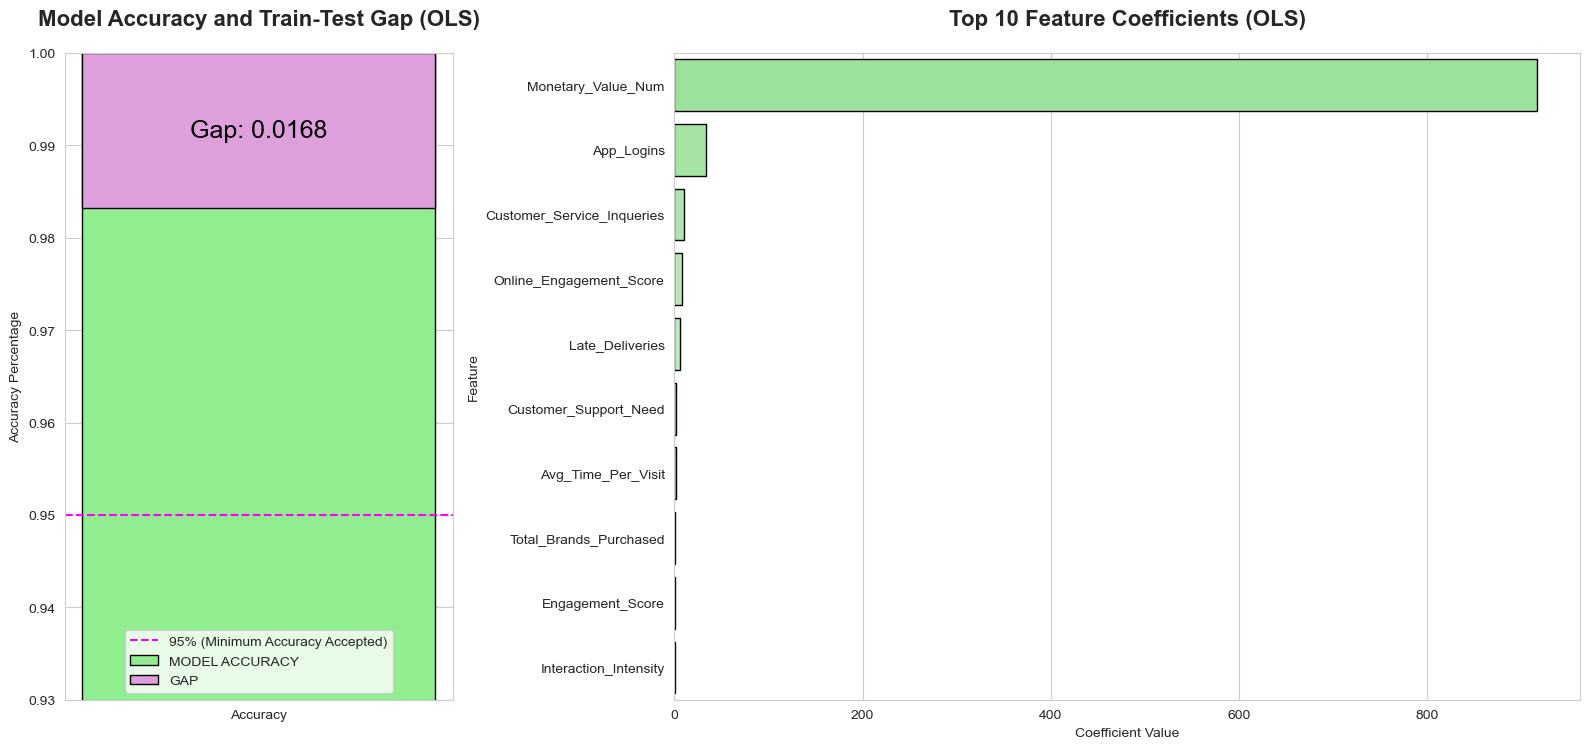

In [36]:
# Train-test split (machine learning)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# OLS Linear Regression
model_ols = LinearRegression()
model_ols.fit(X_train, y_train)

# Predictions
y_pred_train_ols = model_ols.predict(X_train)
y_pred_test_ols = model_ols.predict(X_test)

# Evaluation
train_r2_ols = r2_score(y_train, y_pred_train_ols)
test_r2_ols = r2_score(y_test, y_pred_test_ols)
train_rmse_ols = np.sqrt(mean_squared_error(y_train, y_pred_train_ols))
test_rmse_ols = np.sqrt(mean_squared_error(y_test, y_pred_test_ols))

print("OLS Linear Regression:")
print(f"Train R²: {train_r2_ols:.4f}, Test R²: {test_r2_ols:.4f}")
print(f"Train RMSE: {train_rmse_ols:.2f}, Test RMSE: {test_rmse_ols:.2f}")
print(f"Train-Test Gap: {abs(train_r2_ols - test_r2_ols):.4f}\n")

# Feature Coefficients
feature_importance_ols = pd.DataFrame({"Feature": X_train.columns, "Coefficient": model_ols.coef_})
feature_importance_ols = feature_importance_ols.sort_values(by="Coefficient", ascending=False)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [3, 7]})
fig.subplots_adjust(wspace=0.5, hspace=0.3, top=0.85)

# Accuracy Gauge on the left
axes[0].bar(['Accuracy'], [1], color='lightgreen', edgecolor='black', label='MODEL ACCURACY')
axes[0].bar(['Accuracy'], [abs(train_r2_ols - test_r2_ols)], bottom=(1 - abs(train_r2_ols - test_r2_ols)), color='#DDA0DD', edgecolor='black', label='GAP')

# Add text annotation for GAP value at the top
axes[0].text(0, 1 - (abs(train_r2_ols - test_r2_ols) / 2), f"Gap: {abs(train_r2_ols - test_r2_ols):.4f}",
             ha='center', va='center', color='black', fontsize=18, bbox=dict(boxstyle="round", fc="#DDA0DD", ec="#DDA0DD"))

# Horizontal reference lines for 95% and 100%
axes[0].axhline(y=0.95, color='magenta', linestyle='--', label='95% (Minimum Accuracy Accepted)')

# Customize the accuracy plot
axes[0].set_title("Model Accuracy and Train-Test Gap (OLS)", fontsize=16, fontweight='bold', pad=20)
axes[0].set_ylabel("Accuracy Percentage")
axes[0].set_ylim(0.93, 1.0)
axes[0].legend(loc='lower center', bbox_to_anchor=(0.5, 0.0), ncol=1)
axes[0].tick_params(axis='x', bottom=False)

# Generate a reversed "Greens" palette with softer pastel tones
custom_palette = sns.color_palette("light:#90EE90", n_colors=10)[::-1]

# Top 10 Feature Coefficients on the right
sns.barplot(
    data=feature_importance_ols.head(10),
    x='Coefficient',
    y='Feature',
    palette=custom_palette,
    edgecolor='black',
    ax=axes[1])

axes[1].set_title("Top 10 Feature Coefficients (OLS)", fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel("Coefficient Value")
axes[1].set_ylabel("Feature")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Lasso Regression:</h2></b>
</div>

Lasso Regression:
Train R²: 0.9115, Test R²: 0.8949
Train RMSE: 342.34, Test RMSE: 351.72
Train-Test Gap: 0.0166



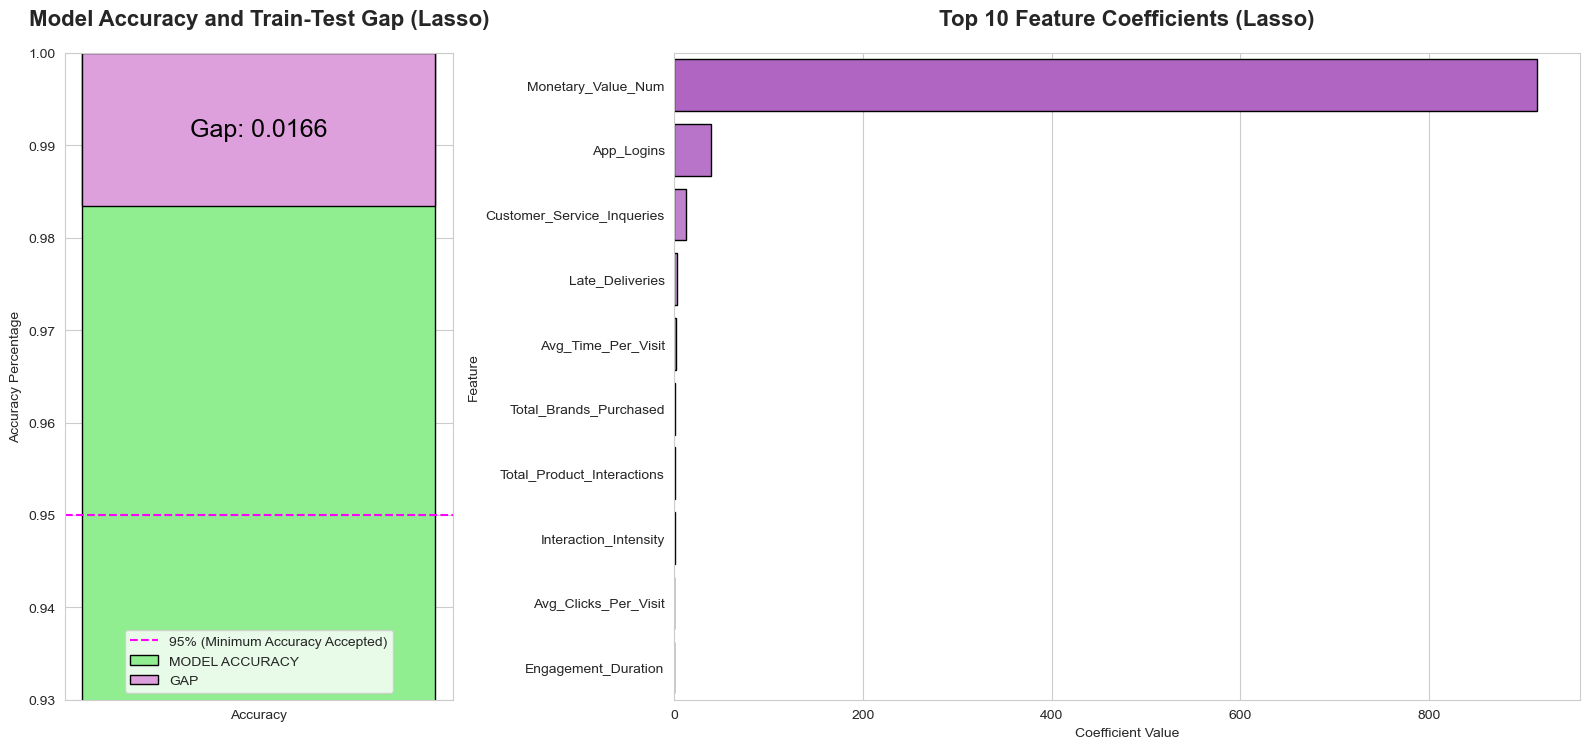

In [37]:
# Lasso Regression
model_lasso = Lasso(alpha=1.0, max_iter=250000)
model_lasso.fit(X_train, y_train)

# Predictions
y_pred_train_lasso = model_lasso.predict(X_train)
y_pred_test_lasso = model_lasso.predict(X_test)

# Evaluation
train_r2_lasso = r2_score(y_train, y_pred_train_lasso)
test_r2_lasso = r2_score(y_test, y_pred_test_lasso)
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))

# Output results
print("Lasso Regression:")
print(f"Train R²: {train_r2_lasso:.4f}, Test R²: {test_r2_lasso:.4f}")
print(f"Train RMSE: {train_rmse_lasso:.2f}, Test RMSE: {test_rmse_lasso:.2f}")
print(f"Train-Test Gap: {abs(train_r2_lasso - test_r2_lasso):.4f}\n")

# Feature Coefficients
feature_importance_lasso = pd.DataFrame({"Feature": X_train.columns, "Coefficient": model_lasso.coef_})
feature_importance_lasso = feature_importance_lasso.sort_values(by="Coefficient", ascending=False)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [3, 7]})
fig.subplots_adjust(wspace=0.5, hspace=0.3, top=0.85)

# Accuracy Gauge on the left
axes[0].bar(['Accuracy'], [1], color='lightgreen', edgecolor='black', label='MODEL ACCURACY')
axes[0].bar(['Accuracy'], [abs(train_r2_lasso - test_r2_lasso)], bottom=(1 - abs(train_r2_lasso - test_r2_lasso)), color='#DDA0DD', edgecolor='black', label='GAP')

# Add text annotation for GAP value at the top
axes[0].text(0, 1 - (abs(train_r2_lasso - test_r2_lasso) / 2), f"Gap: {abs(train_r2_lasso - test_r2_lasso):.4f}",
             ha='center', va='center', color='black', fontsize=18, bbox=dict(boxstyle="round", fc="#DDA0DD", ec="#DDA0DD"))

# Horizontal reference lines for 95% and 100%
axes[0].axhline(y=0.95, color='magenta', linestyle='--', label='95% (Minimum Accuracy Accepted)')

# Customize the accuracy plot
axes[0].set_title("Model Accuracy and Train-Test Gap (Lasso)", fontsize=16, fontweight='bold', pad=20)
axes[0].set_ylabel("Accuracy Percentage")
axes[0].set_ylim(0.93, 1.0)
axes[0].legend(loc='lower center', bbox_to_anchor=(0.5, 0.0), ncol=1)
axes[0].tick_params(axis='x', bottom=False)

# Generate a reversed "Purples" palette for Lasso
custom_palette = sns.color_palette("light:#BA55D3", n_colors=10)[::-1]

# Top 10 Feature Coefficients on the right
sns.barplot(
    data=feature_importance_lasso.head(10),
    x='Coefficient',
    y='Feature',
    palette=custom_palette,
    edgecolor='black',
    ax=axes[1]
)

axes[1].set_title("Top 10 Feature Coefficients (Lasso)", fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel("Coefficient Value")
axes[1].set_ylabel("Feature")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Ridge Regression:</h2></b>
</div>

Ridge Regression Results:
Train R²: 0.9115, Test R²: 0.8948
Train RMSE: 342.31, Test RMSE: 351.88
Cross-Validation R² (5-fold): 0.9081
Train-Test Gap: 0.0167



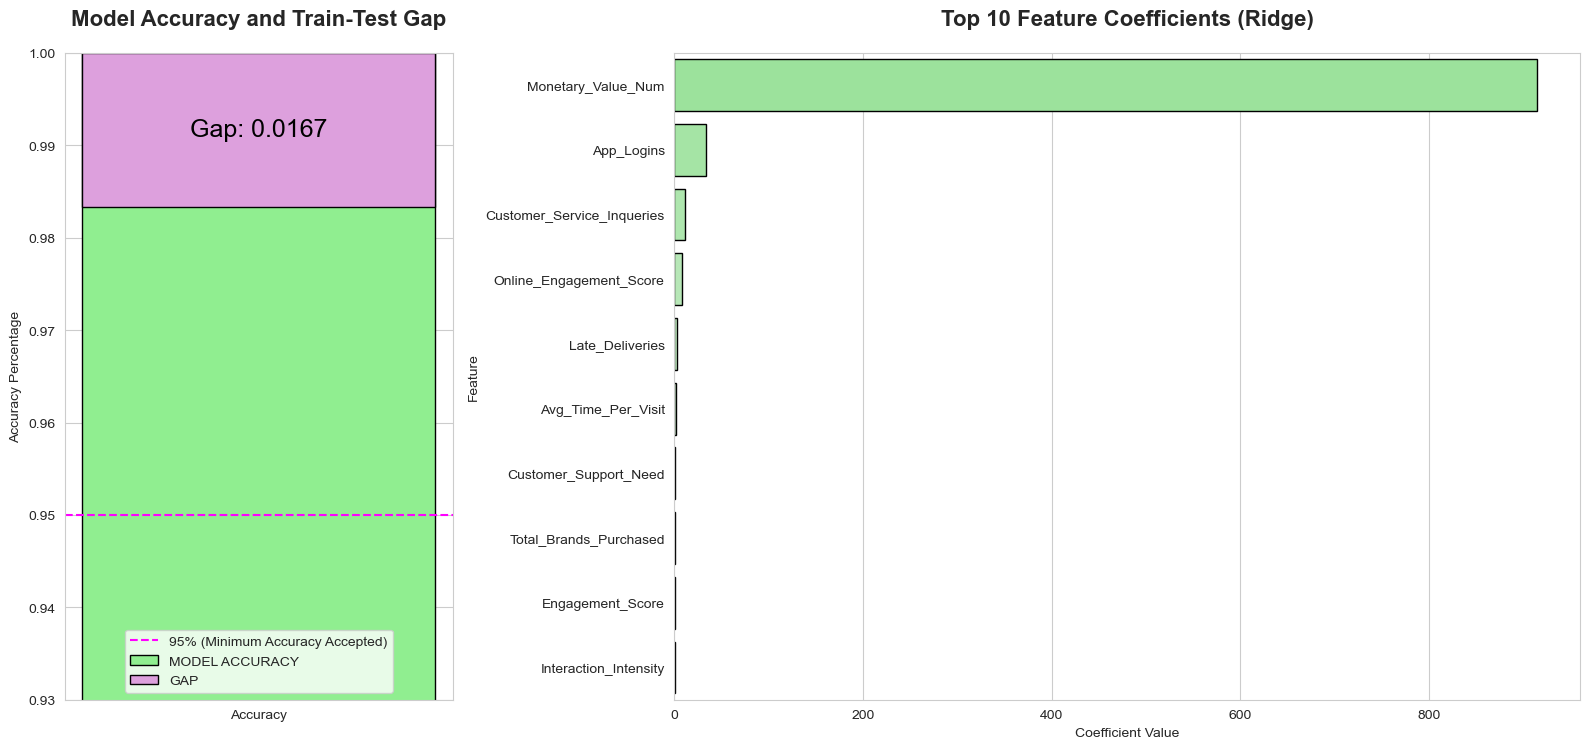

In [38]:
# Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

# Predictions
y_pred_train_ridge = model_ridge.predict(X_train)
y_pred_test_ridge = model_ridge.predict(X_test)

# Evaluation Metrics
train_r2_ridge = r2_score(y_train, y_pred_train_ridge)
test_r2_ridge = r2_score(y_test, y_pred_test_ridge)
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))

# Cross-validation
cross_val_ridge = cross_val_score(model_ridge, X_train, y_train, cv=5, scoring='r2').mean()

# Output results
print("Ridge Regression Results:")
print(f"Train R²: {train_r2_ridge:.4f}, Test R²: {test_r2_ridge:.4f}")
print(f"Train RMSE: {train_rmse_ridge:.2f}, Test RMSE: {test_rmse_ridge:.2f}")
print(f"Cross-Validation R² (5-fold): {cross_val_ridge:.4f}")
print(f"Train-Test Gap: {abs(train_r2_ridge - test_r2_ridge):.4f}\n")

# Feature Coefficients
feature_importance_ridge = pd.DataFrame({"Feature": X_train.columns, "Coefficient": model_ridge.coef_})
feature_importance_ridge = feature_importance_ridge.sort_values(by="Coefficient", ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [3, 7]})
fig.subplots_adjust(wspace=0.5, hspace=0.3, top=0.85)

# Accuracy Gauge on the left
axes[0].bar(['Accuracy'], [1], color='lightgreen', edgecolor='black', label='MODEL ACCURACY')
axes[0].bar(['Accuracy'], [abs(train_r2_ridge - test_r2_ridge)], bottom=(1 - abs(train_r2_ridge - test_r2_ridge)), color='#DDA0DD', edgecolor='black', label='GAP')

# Add text annotation for GAP value at the top
axes[0].text(0, 1 - (abs(train_r2_ridge - test_r2_ridge) / 2), f"Gap: {abs(train_r2_ridge - test_r2_ridge):.4f}",
             ha='center', va='center', color='black', fontsize=18, bbox=dict(boxstyle="round", fc="#DDA0DD", ec="#DDA0DD"))

# Horizontal reference lines for 95% and 100%
axes[0].axhline(y=0.95, color='magenta', linestyle='--', label='95% (Minimum Accuracy Accepted)')

# Customize the accuracy plot
axes[0].set_title("Model Accuracy and Train-Test Gap", fontsize=16, fontweight='bold', pad=20)
axes[0].set_ylabel("Accuracy Percentage")
axes[0].set_ylim(0.93, 1.0)
axes[0].legend(loc='lower center', bbox_to_anchor=(0.5, 0.0), ncol=1)  # Move legend below the chart
axes[0].tick_params(axis='x', bottom=False)

# Generate a reversed "Greens" palette with softer pastel tones
custom_palette = sns.color_palette("light:#90EE90", n_colors=10)[::-1]  # Reverse the pastel greens

# Top 10 Feature Coefficients on the right (with legend=False)
sns.barplot(
    data=feature_importance_ridge.head(10),
    x='Coefficient',
    y='Feature',
    hue='Feature',  # Assign 'Feature' to hue as suggested
    dodge=False,
    palette=custom_palette,
    edgecolor='black',
    ax=axes[1])

axes[1].set_title("Top 10 Feature Coefficients (Ridge)", fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel("Coefficient Value")
axes[1].set_ylabel("Feature")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>Elastic Net Regression:</h2></b>
</div>

Elastic Net Regression:
Train R²: 0.9110, Test R²: 0.8956
Train RMSE: 343.33, Test RMSE: 350.53
Train-Test Gap: 0.0153



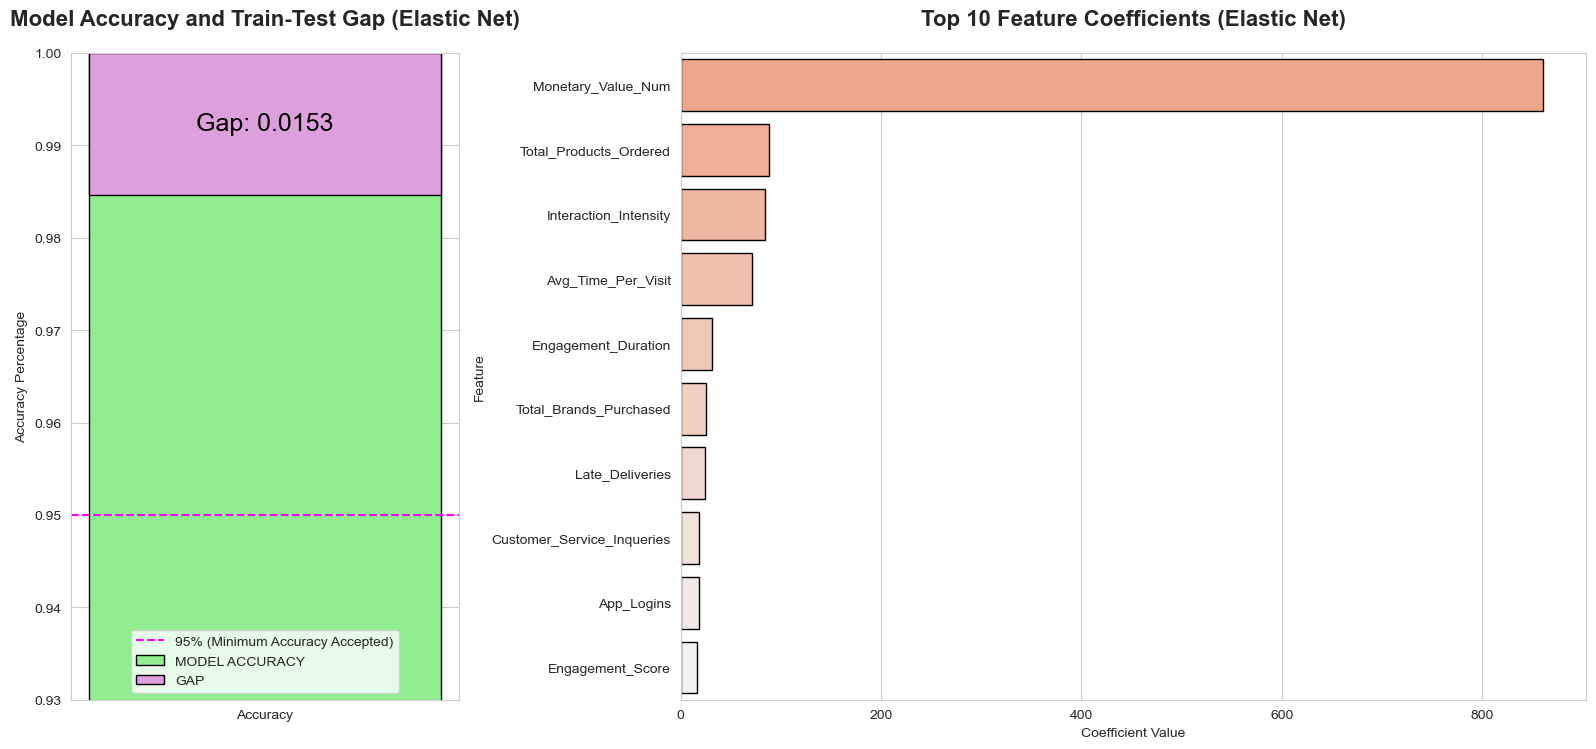

In [39]:
# Elastic Net Regression

#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Elastic Net Regression
model_elastic = SGDRegressor(penalty='elasticnet', l1_ratio=0.5, max_iter=5000, random_state=42)
model_elastic.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_elastic = model_elastic.predict(X_train_scaled)
y_pred_test_elastic = model_elastic.predict(X_test_scaled)

# Evaluation
train_r2_elastic = r2_score(y_train, y_pred_train_elastic)
test_r2_elastic = r2_score(y_test, y_pred_test_elastic)
train_rmse_elastic = np.sqrt(mean_squared_error(y_train, y_pred_train_elastic))
test_rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_test_elastic))

print("Elastic Net Regression:")
print(f"Train R²: {train_r2_elastic:.4f}, Test R²: {test_r2_elastic:.4f}")
print(f"Train RMSE: {train_rmse_elastic:.2f}, Test RMSE: {test_rmse_elastic:.2f}")
print(f"Train-Test Gap: {abs(train_r2_elastic - test_r2_elastic):.4f}\n")

# Feature Coefficients (Elastic Net doesn't have coef_ directly with SGDRegressor)
feature_importance_elastic = pd.DataFrame({"Feature": X_train.columns, "Coefficient": model_elastic.coef_})
feature_importance_elastic = feature_importance_elastic.sort_values(by="Coefficient", ascending=False)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [3, 7]})
fig.subplots_adjust(wspace=0.5, hspace=0.3, top=0.85)

# Accuracy Gauge on the left
axes[0].bar(['Accuracy'], [1], color='lightgreen', edgecolor='black', label='MODEL ACCURACY')
axes[0].bar(['Accuracy'], [abs(train_r2_elastic - test_r2_elastic)], bottom=(1 - abs(train_r2_elastic - test_r2_elastic)), color='#DDA0DD', edgecolor='black', label='GAP')

# Add text annotation for GAP value at the top
axes[0].text(0, 1 - (abs(train_r2_elastic - test_r2_elastic) / 2), f"Gap: {abs(train_r2_elastic - test_r2_elastic):.4f}",
             ha='center', va='center', color='black', fontsize=18, bbox=dict(boxstyle="round", fc="#DDA0DD", ec="#DDA0DD"))

# Horizontal reference lines for 95% and 100%
axes[0].axhline(y=0.95, color='magenta', linestyle='--', label='95% (Minimum Accuracy Accepted)')

# Customize the accuracy plot
axes[0].set_title("Model Accuracy and Train-Test Gap (Elastic Net)", fontsize=16, fontweight='bold', pad=20)
axes[0].set_ylabel("Accuracy Percentage")
axes[0].set_ylim(0.93, 1.0)
axes[0].legend(loc='lower center', bbox_to_anchor=(0.5, 0.0), ncol=1)
axes[0].tick_params(axis='x', bottom=False)

# Generate a reversed "Oranges" palette with softer tones
custom_palette = sns.color_palette("light:#FFA07A", n_colors=10)[::-1]

# Top 10 Feature Coefficients on the right
sns.barplot(
    data=feature_importance_elastic.head(10),
    x='Coefficient',
    y='Feature',
    palette=custom_palette,
    edgecolor='black',
    ax=axes[1]
)

axes[1].set_title("Top 10 Feature Coefficients (Elastic Net)", fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel("Coefficient Value")
axes[1].set_ylabel("Feature")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<div style="border: 1px solid #DDA0DD; padding: 10px; background-color: #FAF3FF;">
    <b><h2>K-Nearest Neighbors Regression:</h2></b>
</div>

K-Nearest Neighbors Regression:
Train R²: 0.7060, Test R²: 0.4432
Train RMSE: 623.82, Test RMSE: 809.55
Train-Test Gap: 0.2628



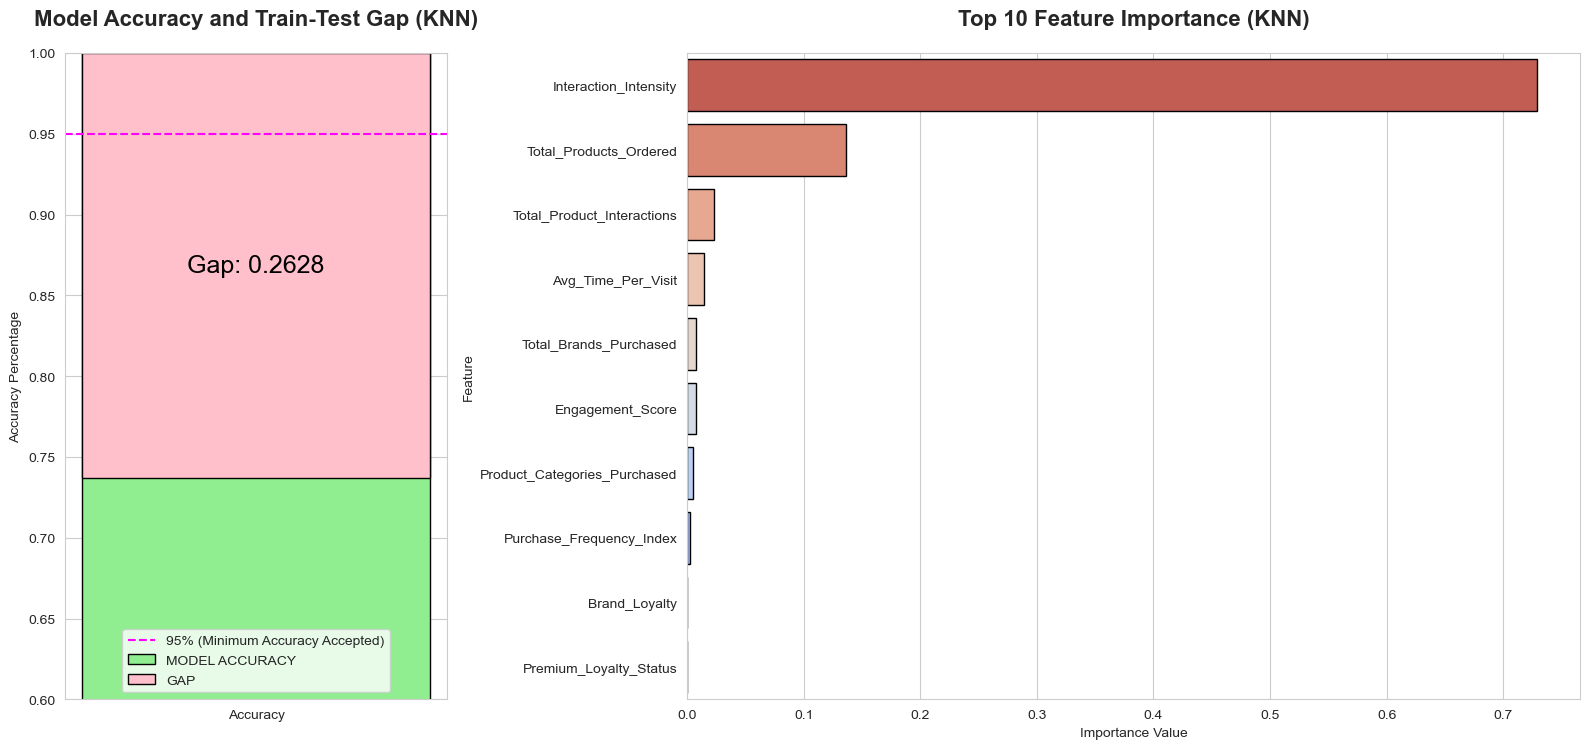

In [40]:
# KNN Regression
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Predictions
y_pred_train_knn = model_knn.predict(X_train)
y_pred_test_knn = model_knn.predict(X_test)

# Evaluation
train_r2_knn = r2_score(y_train, y_pred_train_knn)
test_r2_knn = r2_score(y_test, y_pred_test_knn)
train_rmse_knn = np.sqrt(mean_squared_error(y_train, y_pred_train_knn))
test_rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_test_knn))

print("K-Nearest Neighbors Regression:")
print(f"Train R²: {train_r2_knn:.4f}, Test R²: {test_r2_knn:.4f}")
print(f"Train RMSE: {train_rmse_knn:.2f}, Test RMSE: {test_rmse_knn:.2f}")
print(f"Train-Test Gap: {abs(train_r2_knn - test_r2_knn):.4f}\n")

# Compute Permutation Feature Importance for KNN
perm_importance = permutation_importance(model_knn, X_test, y_test, n_repeats=10, random_state=42)
feature_importance_knn = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [3, 7]})
fig.subplots_adjust(wspace=0.5, hspace=0.3, top=0.85)

# Accuracy Gauge on the left
axes[0].bar(['Accuracy'], [1], color='lightgreen', edgecolor='black', label='MODEL ACCURACY')
axes[0].bar(['Accuracy'], [abs(train_r2_knn - test_r2_knn)], bottom=(1 - abs(train_r2_knn - test_r2_knn)), color='#FFC0CB', edgecolor='black', label='GAP')

# Add text annotation for GAP value at the top
axes[0].text(0, 1 - (abs(train_r2_knn - test_r2_knn) / 2), f"Gap: {abs(train_r2_knn - test_r2_knn):.4f}",
             ha='center', va='center', color='black', fontsize=18, bbox=dict(boxstyle="round", fc="#FFC0CB", ec="#FFC0CB"))

# Horizontal reference lines for 95% and 100%
axes[0].axhline(y=0.95, color='magenta', linestyle='--', label='95% (Minimum Accuracy Accepted)')

# Customize the accuracy plot
axes[0].set_title("Model Accuracy and Train-Test Gap (KNN)", fontsize=16, fontweight='bold', pad=20)
axes[0].set_ylabel("Accuracy Percentage")
axes[0].set_ylim(0.6, 1.0)
axes[0].legend(loc='lower center', bbox_to_anchor=(0.5, 0.0), ncol=1)
axes[0].tick_params(axis='x', bottom=False)

# Top 10 Feature Importance on the right
custom_palette = sns.color_palette("coolwarm", n_colors=10)[::-1]
sns.barplot(
    data=feature_importance_knn.head(10),
    x='Importance',
    y='Feature',
    palette=custom_palette,
    edgecolor='black',
    ax=axes[1]
)

axes[1].set_title("Top 10 Feature Importance (KNN)", fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel("Importance Value")
axes[1].set_ylabel("Feature")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Clearly this model is underperforming by far. I won't waste time trying to improve its score.

<div style="border: 2px solid #DDA0DD; padding: 15px; background-color: #FAF3FF; border-radius: 8px;">
    <h2 style="color: #DDA0DD;">Best Performing Model🏆</h2>
</div>

<p><b>Case Performance Analysis.</b> This model is the best performing because... </p>

Best Performing Model Based on Train-Test Gap:
Model: Elastic Net
Train R²: 0.9110, Test R²: 0.8956
Train RMSE: 343.33, Test RMSE: 350.53
Train-Test Gap: 0.0153

Top Feature for the Best Model:
           Feature  Coefficient
Monetary_Value_Num   860.539958


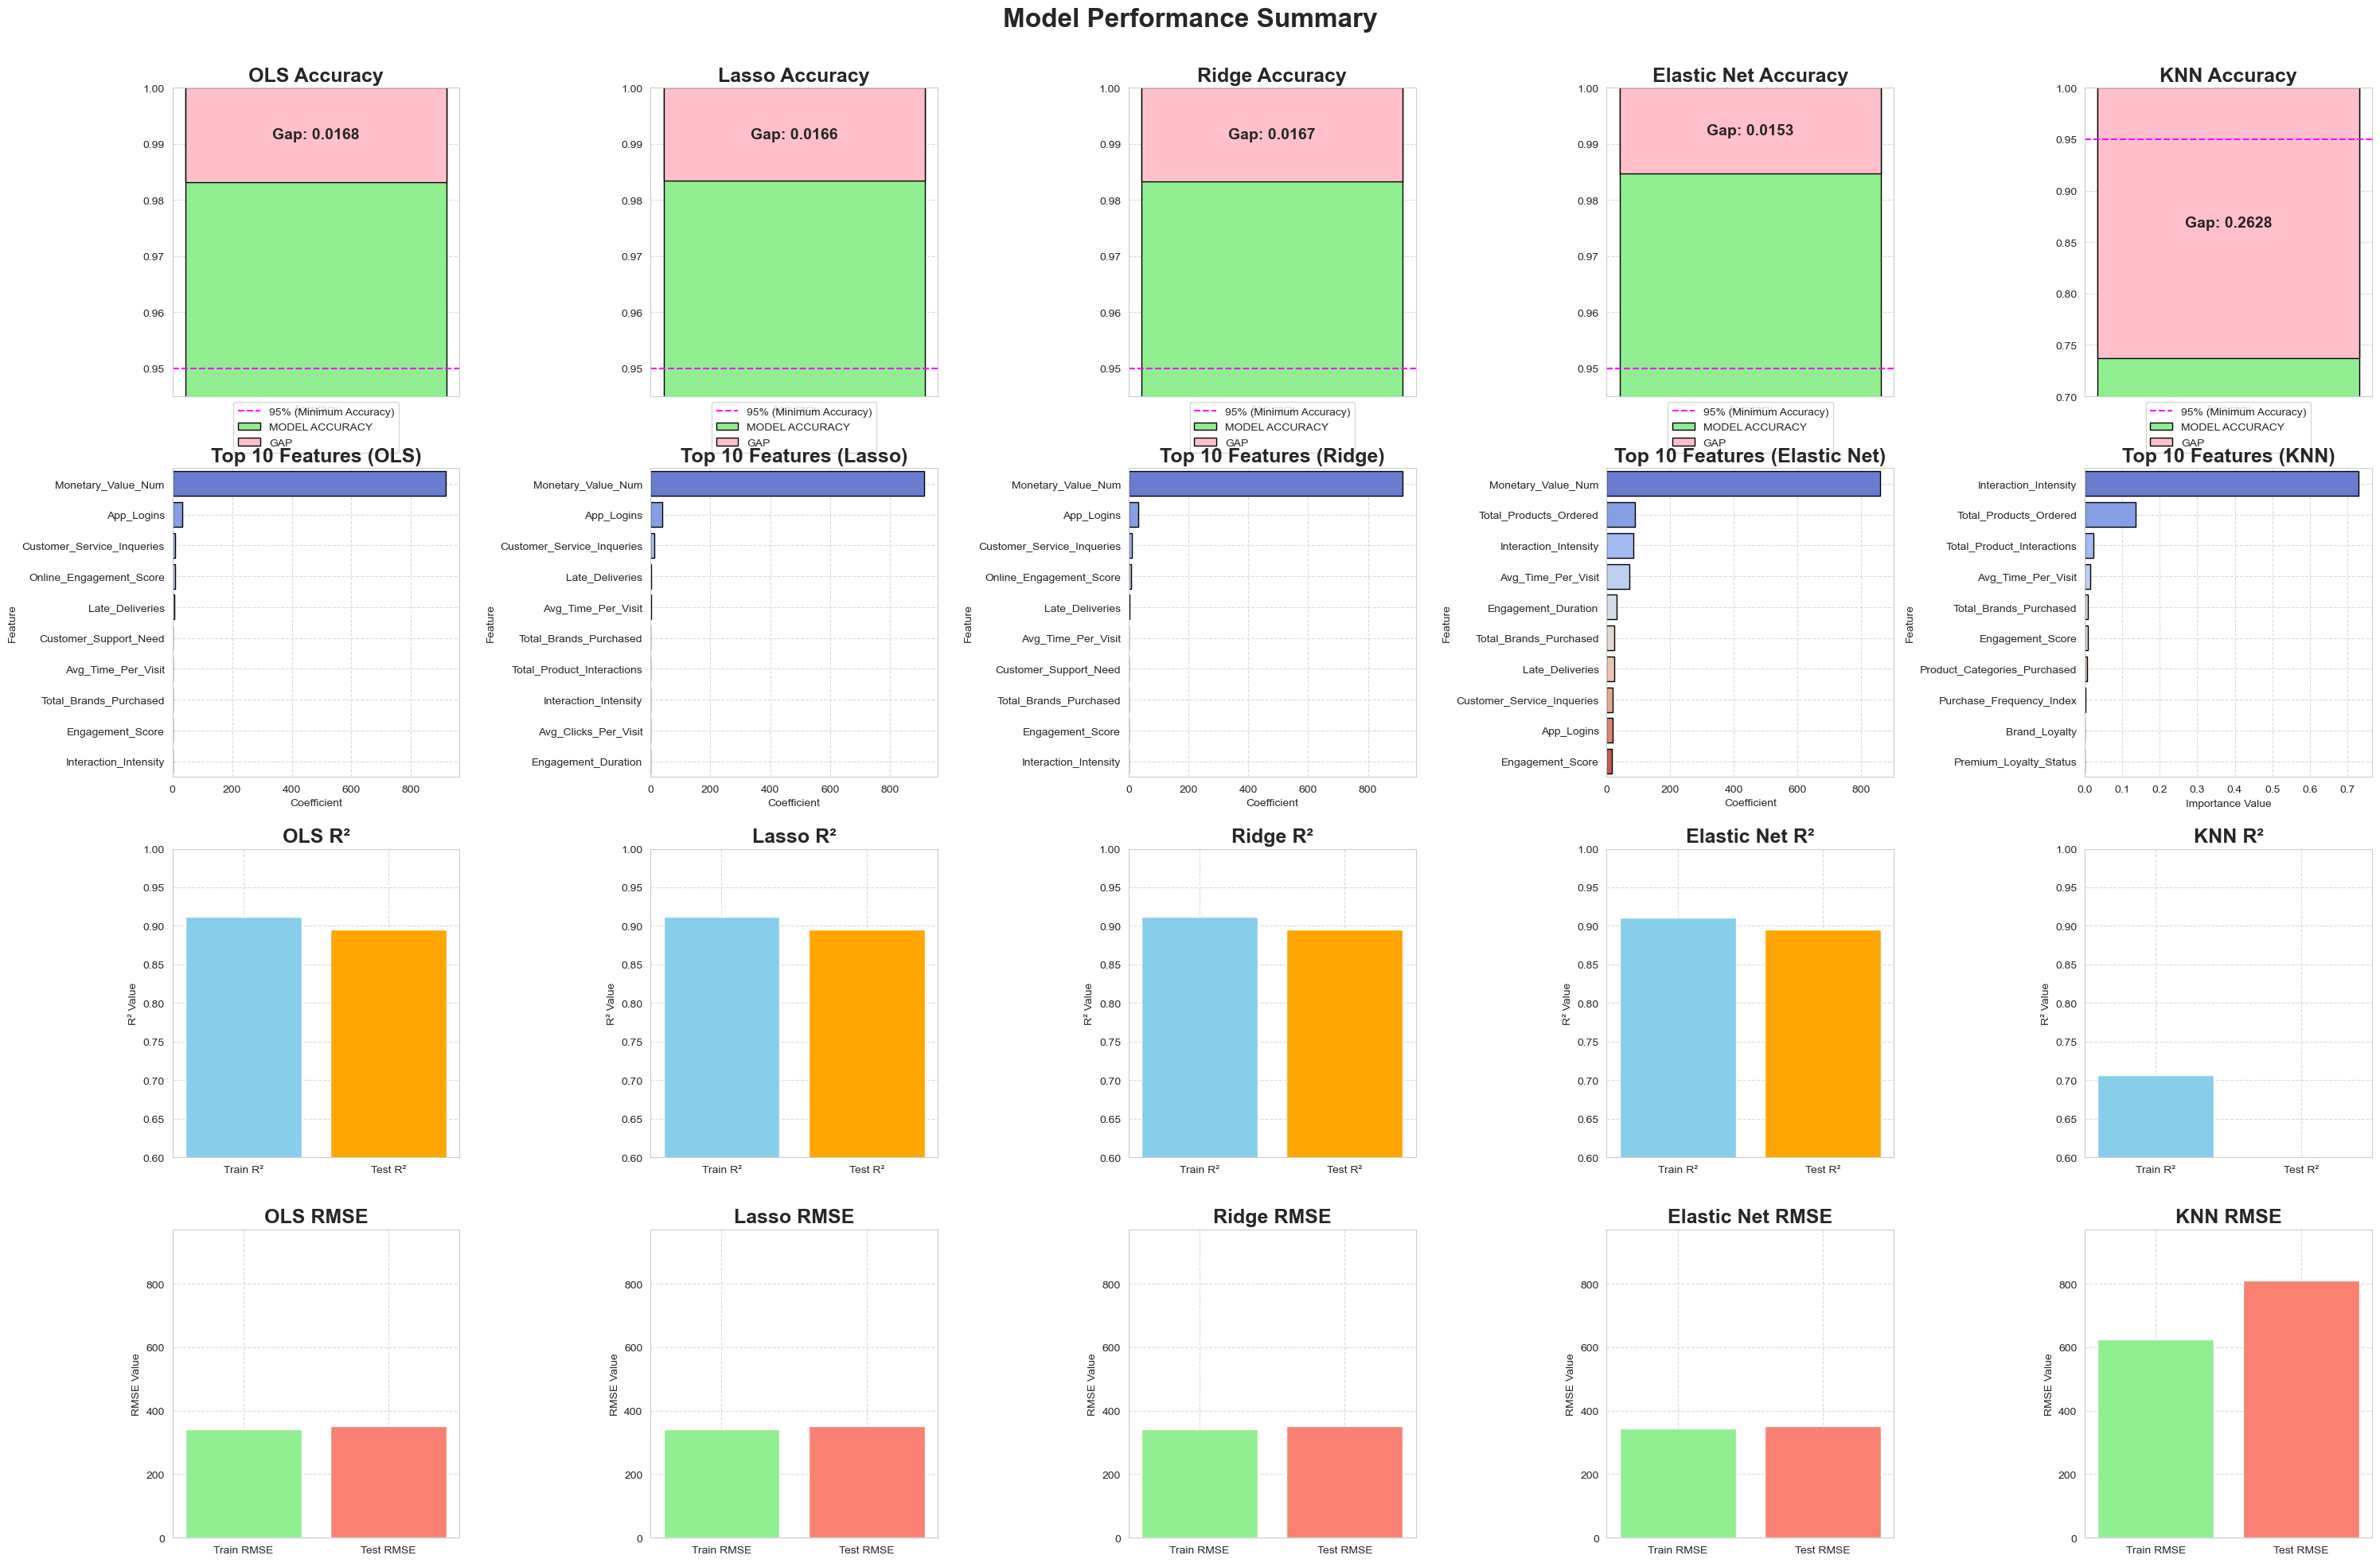

In [41]:
# Consolidate evaluation metrics into a DataFrame for comparison
metrics_data = {
    "Model": ["OLS", "Lasso", "Ridge", "Elastic Net", "KNN"],
    "Train R²": [train_r2_ols, train_r2_lasso, train_r2_ridge, train_r2_elastic, train_r2_knn],
    "Test R²": [test_r2_ols, test_r2_lasso, test_r2_ridge, test_r2_elastic, test_r2_knn],
    "Train RMSE": [train_rmse_ols, train_rmse_lasso, train_rmse_ridge, train_rmse_elastic, train_rmse_knn],
    "Test RMSE": [test_rmse_ols, test_rmse_lasso, test_rmse_ridge, test_rmse_elastic, test_rmse_knn],
    "Feature Data": [feature_importance_ols, feature_importance_lasso, feature_importance_ridge, feature_importance_elastic, feature_importance_knn]
}
metrics_df = pd.DataFrame(metrics_data)

# Determine the best model based on the smallest Train-Test Gap
metrics_df["Train-Test Gap"] = abs(metrics_df["Train R²"] - metrics_df["Test R²"])
best_model = metrics_df.loc[metrics_df["Train-Test Gap"].idxmin()]

# Print Best Model Summary
print("Best Performing Model Based on Train-Test Gap:")
print(f"Model: {best_model['Model']}")
print(f"Train R²: {best_model['Train R²']:.4f}, Test R²: {best_model['Test R²']:.4f}")
print(f"Train RMSE: {best_model['Train RMSE']:.2f}, Test RMSE: {best_model['Test RMSE']:.2f}")
print(f"Train-Test Gap: {best_model['Train-Test Gap']:.4f}")

# Extract and Print Top Feature for Best Model
top_feature = best_model["Feature Data"].head(1)
print("\nTop Feature for the Best Model:")
print(top_feature.to_string(index=False))

# Create a 4-row x 5-column plot layout
fig, axes = plt.subplots(4, 5, figsize=(30, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Row 1: Model Accuracy Gauge
for i, ax in enumerate(axes[0]):
    model_name = metrics_df["Model"][i]
    train_r2 = metrics_df["Train R²"][i]
    test_r2 = metrics_df["Test R²"][i]
    gap = metrics_df["Train-Test Gap"][i]

    ax.bar(['Accuracy'], [1], color='lightgreen', edgecolor='black', label='MODEL ACCURACY')
    ax.bar(['Accuracy'], [gap], bottom=(1 - gap), color='#FFC0CB', edgecolor='black', label='GAP')
    ax.axhline(y=0.95, color='magenta', linestyle='--', label='95% (Minimum Accuracy)')

    ax.text(0, 1 - (gap / 2), f"Gap: {gap:.4f}", ha='center', va='center', fontsize=14, fontweight='bold',
            bbox=dict(boxstyle="round", fc="#FFC0CB", ec="#FFC0CB"))
    ax.set_ylim(0.945, 1.0) if model_name != "KNN" else ax.set_ylim(0.7, 1.0)
    ax.set_title(f"{model_name} Accuracy", fontsize=18, fontweight='bold')
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=1)
    ax.grid(True, linestyle='--', alpha=0.7)

# Row 2: Top 10 Features for each model
for i, ax in enumerate(axes[1]):
    model_name = metrics_df["Model"][i]
    feature_df = metrics_df["Feature Data"][i]

    sns.barplot(
        data=feature_df.head(10),
        x='Coefficient' if 'Coefficient' in feature_df.columns else 'Importance',
        y='Feature',
        palette='coolwarm',
        edgecolor='black',
        ax=ax
    )
    ax.set_title(f"Top 10 Features ({model_name})", fontsize=18, fontweight='bold')
    ax.set_xlabel("Coefficient" if 'Coefficient' in feature_df.columns else "Importance Value")
    ax.set_ylabel("Feature")
    ax.grid(True, linestyle='--', alpha=0.7)

# Row 3: R² Comparison (Individual Plot for Each Model)
for i, ax in enumerate(axes[2]):
    ax.bar(["Train R²", "Test R²"], [metrics_df["Train R²"][i], metrics_df["Test R²"][i]], color=['skyblue', 'orange'])
    ax.set_title(f"{metrics_df['Model'][i]} R²", fontsize=18, fontweight='bold')
    ax.set_ylim(0.6, 1.0)
    ax.set_ylabel("R² Value")
    ax.grid(True, linestyle='--', alpha=0.7)

# Row 4: RMSE Comparison (Individual Plot for Each Model)
for i, ax in enumerate(axes[3]):
    ax.bar(["Train RMSE", "Test RMSE"], [metrics_df["Train RMSE"][i], metrics_df["Test RMSE"][i]], color=['lightgreen', 'salmon'])
    ax.set_title(f"{metrics_df['Model'][i]} RMSE", fontsize=18, fontweight='bold')
    ax.set_ylim(0, metrics_df["Test RMSE"].max() * 1.2)
    ax.set_ylabel("RMSE Value")
    ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Model Performance Summary", fontsize=24, fontweight='bold')
plt.show()

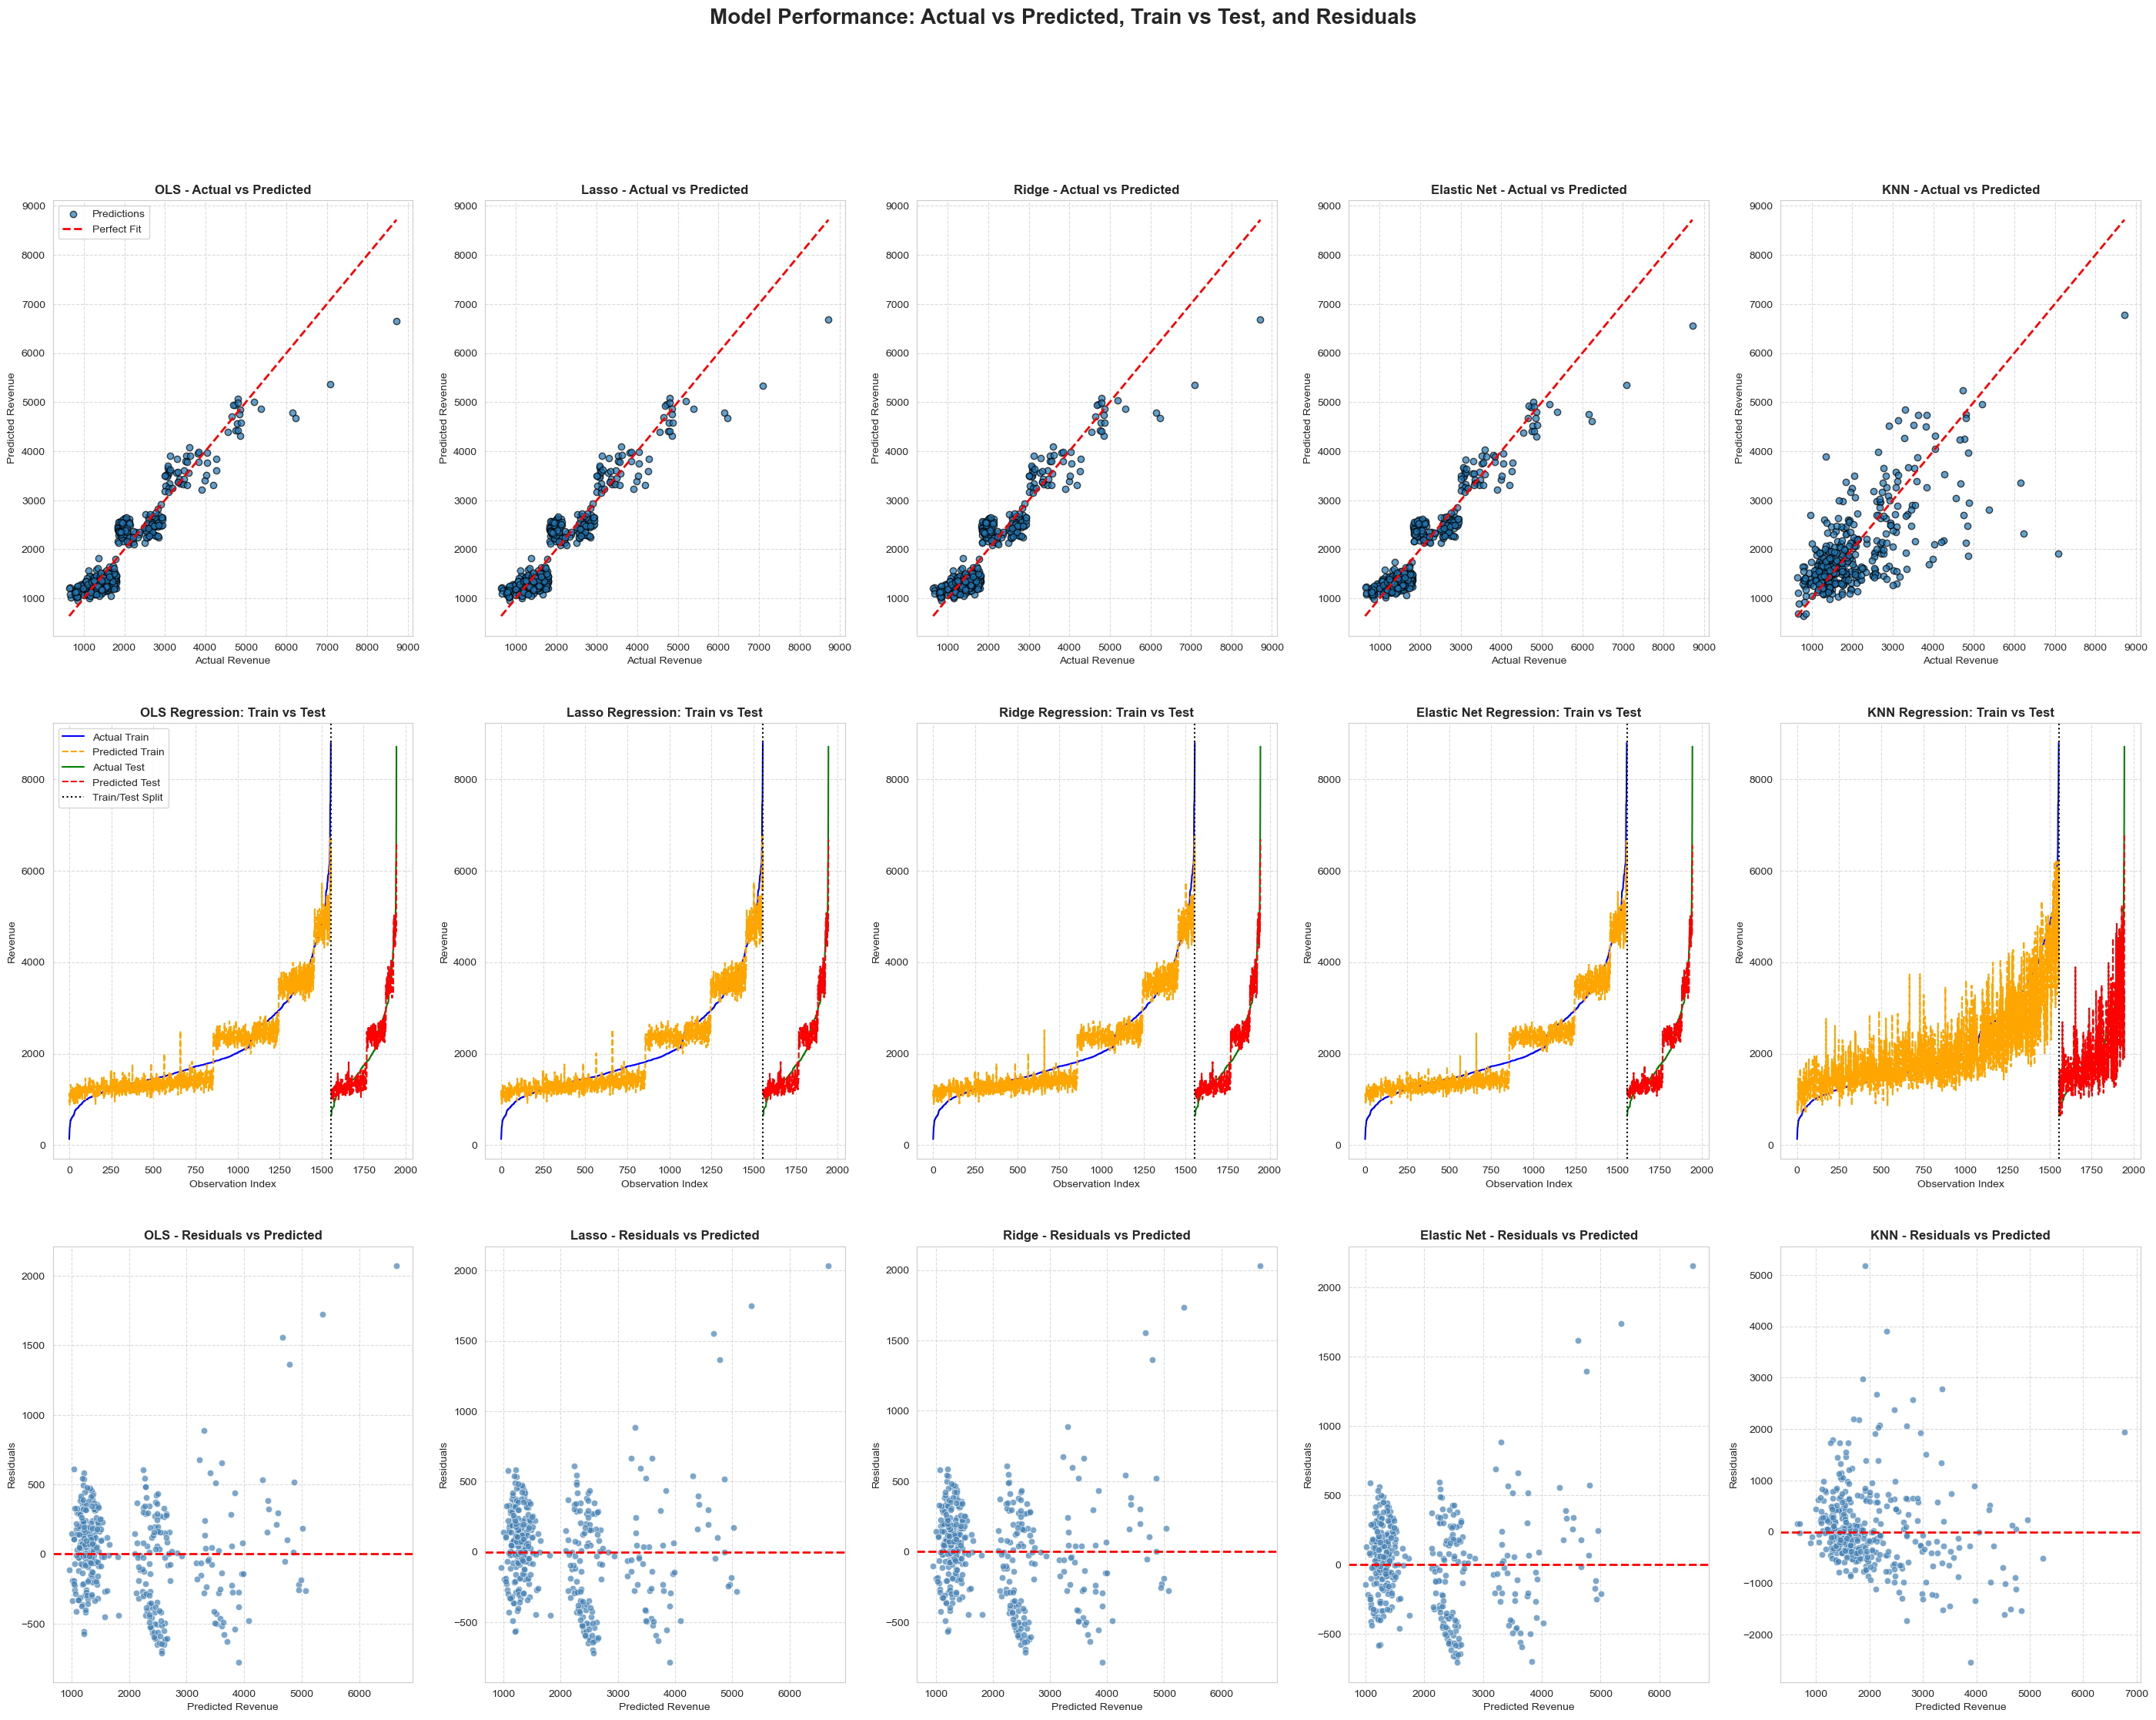

In [42]:
# Create a figure with 3 rows and 5 columns
fig = plt.figure(figsize=(35, 25), constrained_layout=False)
gs = gridspec.GridSpec(3, 5, figure=fig, height_ratios=[1, 1, 1], hspace=0.2)

# Define sorted indices for consistency
sorted_indices_train = np.argsort(y_train)
sorted_indices_test = np.argsort(y_test)

# Model names and their corresponding predictions
model_names = ["OLS", "Lasso", "Ridge", "Elastic Net", "KNN"]
model_train_predictions = {
    "OLS": y_pred_train_ols,
    "Lasso": y_pred_train_lasso,
    "Ridge": y_pred_train_ridge,
    "Elastic Net": y_pred_train_elastic,
    "KNN": y_pred_train_knn
}
model_test_predictions = {
    "OLS": y_pred_test_ols,
    "Lasso": y_pred_test_lasso,
    "Ridge": y_pred_test_ridge,
    "Elastic Net": y_pred_test_elastic,
    "KNN": y_pred_test_knn
}

# First ROW: Actual vs Predicted Values for each model
for i, model_name in enumerate(model_names):
    best_y_pred = model_test_predictions[model_name]
    
    ax1 = fig.add_subplot(gs[0, i])
    ax1.scatter(y_test, best_y_pred, alpha=0.7, edgecolors='k', label='Predictions')
    ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
    ax1.set_title(f'{model_name} - Actual vs Predicted', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Actual Revenue')
    ax1.set_ylabel('Predicted Revenue')
    ax1.grid(True, linestyle='--', alpha=0.7)
    if i == 0:
        ax1.legend()

# Second ROW: Train vs Test Predictions for each model
for i, model_name in enumerate(model_names):
    train_pred = model_train_predictions[model_name]
    test_pred = model_test_predictions[model_name]

    ax2 = fig.add_subplot(gs[1, i])
    
    # Plot train predictions
    ax2.plot(np.arange(len(y_train)), y_train.iloc[sorted_indices_train], label='Actual Train', color='blue')
    ax2.plot(np.arange(len(y_train)), train_pred[sorted_indices_train], label='Predicted Train', linestyle='--', color='orange')
    
    # Plot test predictions
    ax2.plot(np.arange(len(y_test)) + len(y_train), y_test.iloc[sorted_indices_test], label='Actual Test', color='green')
    ax2.plot(np.arange(len(y_test)) + len(y_train), test_pred[sorted_indices_test], label='Predicted Test', linestyle='--', color='red')

    ax2.axvline(len(y_train), color='black', linestyle=':', linewidth=1.5, label='Train/Test Split')
    ax2.set_title(f'{model_name} Regression: Train vs Test', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Observation Index')
    ax2.set_ylabel('Revenue')
    ax2.grid(True, linestyle='--', alpha=0.7)
    if i == 0:
        ax2.legend()

# Third ROW: Residual Plot for each model
for i, model_name in enumerate(model_names):
    best_y_pred = model_test_predictions[model_name]
    best_residuals = y_test - best_y_pred
    
    ax3 = fig.add_subplot(gs[2, i])
    sns.scatterplot(x=best_y_pred, y=best_residuals, alpha=0.7, ax=ax3, color='steelblue')
    ax3.axhline(0, color='red', linestyle='--', linewidth=2)
    ax3.set_title(f'{model_name} - Residuals vs Predicted', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Predicted Revenue')
    ax3.set_ylabel('Residuals')
    ax3.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and bring the title closer
plt.suptitle("Model Performance: Actual vs Predicted, Train vs Test, and Residuals", fontsize=20, fontweight='bold')
plt.show()

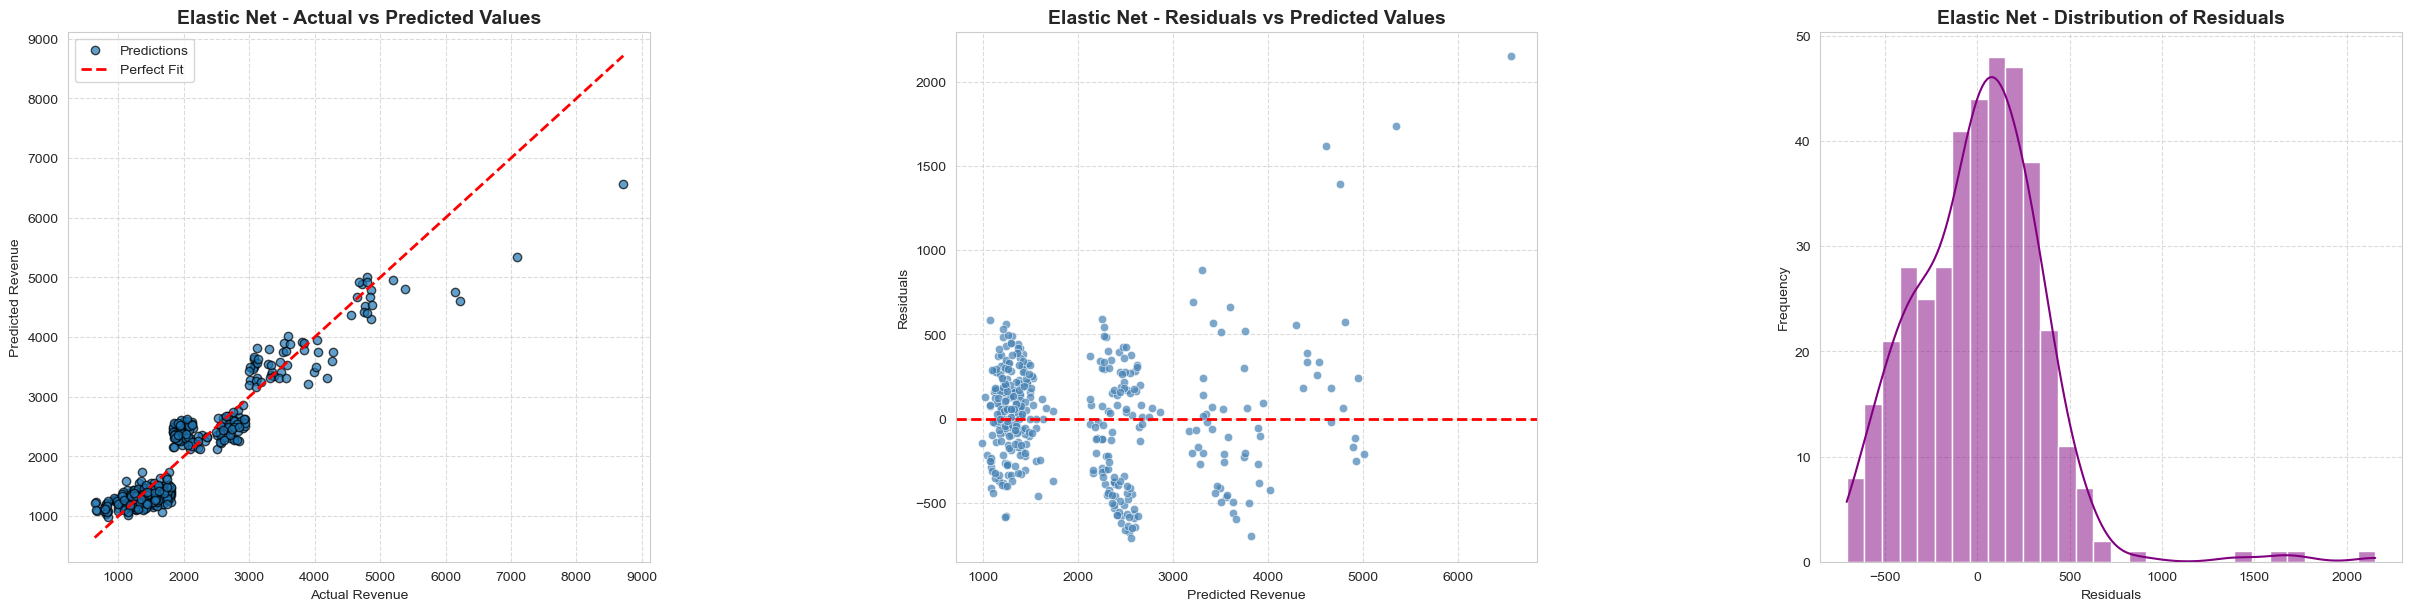

In [43]:
# Use best model's data
model_predictions = {
    "OLS": y_pred_test_ols,
    "Lasso": y_pred_test_lasso,
    "Ridge": y_pred_test_ridge,
    "Elastic Net": y_pred_test_elastic,
    "KNN": y_pred_test_knn}

# Get the predictions and residuals for the best model
best_y_pred = model_predictions[best_model["Model"]]
best_residuals = y_test - best_y_pred

# Set plot style for consistency
sns.set_style("whitegrid")

# Create a figure with constrained_layout=True for better layout handling
fig = plt.figure(figsize=(24, 6), constrained_layout=True)
gs = gridspec.GridSpec(1, 3, figure=fig, wspace=0.3)

# Plot 1: Actual vs Predicted Values
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(y_test, best_y_pred, alpha=0.7, edgecolors='k', label='Predictions')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
ax1.set_title(f'{best_model["Model"]} - Actual vs Predicted Values', fontsize=14, fontweight='bold')
ax1.set_xlabel('Actual Revenue')
ax1.set_ylabel('Predicted Revenue')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Residual Plot
ax2 = fig.add_subplot(gs[0, 1])
sns.scatterplot(x=best_y_pred, y=best_residuals, alpha=0.7, ax=ax2, color='steelblue')
ax2.axhline(0, color='red', linestyle='--', linewidth=2)
ax2.set_title(f'{best_model["Model"]} - Residuals vs Predicted Values', fontsize=14, fontweight='bold')
ax2.set_xlabel('Predicted Revenue')
ax2.set_ylabel('Residuals')
ax2.grid(True, linestyle='--', alpha=0.7)

# Plot 3: Histogram of Residuals
ax3 = fig.add_subplot(gs[0, 2])
sns.histplot(best_residuals, bins=30, kde=True, color='purple', ax=ax3)
ax3.set_title(f'{best_model["Model"]} - Distribution of Residuals', fontsize=14, fontweight='bold')
ax3.set_xlabel('Residuals')
ax3.set_ylabel('Frequency')
ax3.grid(True, linestyle='--', alpha=0.7)

# Show the combined figure
plt.show()

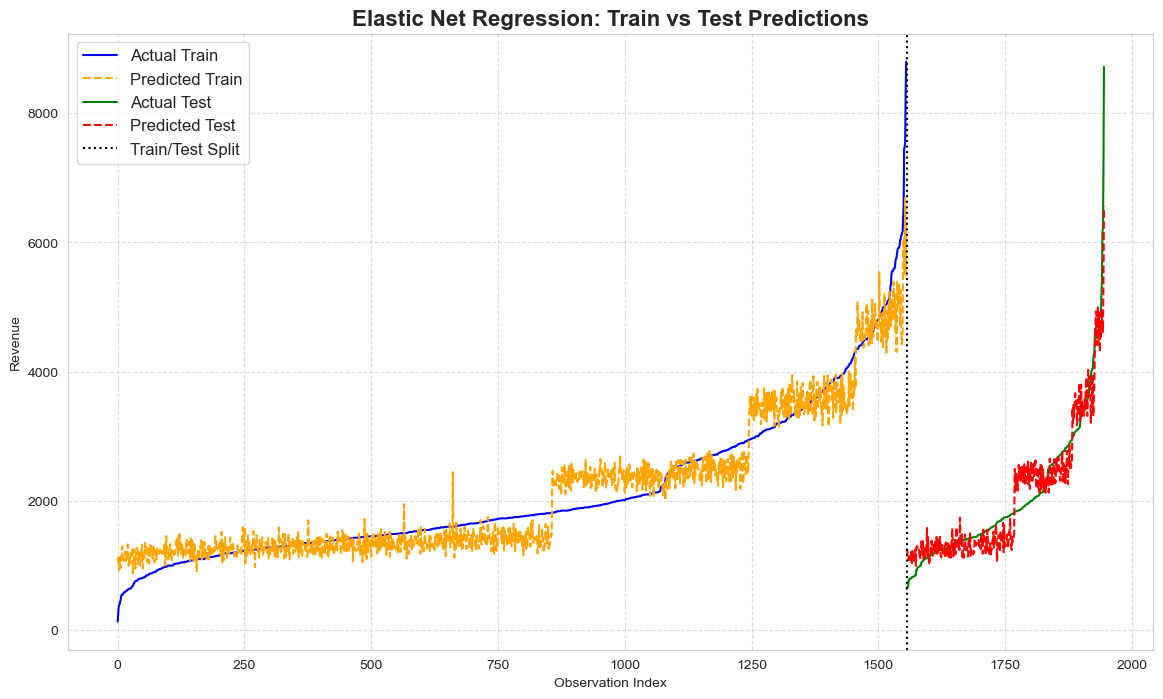

In [44]:
# Use the correct predictions for the best-performing model
if best_model["Model"] == "OLS":
    best_y_pred_train = y_pred_train_ols
    best_y_pred_test = y_pred_test_ols
elif best_model["Model"] == "Lasso":
    best_y_pred_train = y_pred_train_lasso
    best_y_pred_test = y_pred_test_lasso
elif best_model["Model"] == "Ridge":
    best_y_pred_train = y_pred_train_ridge
    best_y_pred_test = y_pred_test_ridge
elif best_model["Model"] == "Elastic Net":
    best_y_pred_train = y_pred_train_elastic
    best_y_pred_test = y_pred_test_elastic
else:  # "KNN"
    best_y_pred_train = y_pred_train_knn
    best_y_pred_test = y_pred_test_knn

# Sort values by actual revenue for a cleaner line plot
sorted_indices_train = np.argsort(y_train)
sorted_indices_test = np.argsort(y_test)

plt.figure(figsize=(14, 8))

# Plot train predictions
plt.plot(np.arange(len(y_train)), y_train.iloc[sorted_indices_train], label='Actual Train', color='blue')
plt.plot(np.arange(len(y_train)), best_y_pred_train[sorted_indices_train], label='Predicted Train', linestyle='--', color='orange')

# Plot test predictions
plt.plot(np.arange(len(y_test)) + len(y_train), y_test.iloc[sorted_indices_test], label='Actual Test', color='green')
plt.plot(np.arange(len(y_test)) + len(y_train), best_y_pred_test[sorted_indices_test], label='Predicted Test', linestyle='--', color='red')

# Add a vertical line for the train/test split
plt.axvline(len(y_train), color='black', linestyle=':', linewidth=1.5, label='Train/Test Split')

# Customize plot
plt.title(f'{best_model["Model"]} Regression: Train vs Test Predictions', fontsize=16, fontweight='bold')
plt.xlabel('Observation Index')
plt.ylabel('Revenue')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

This graph suggests potential for further model improvement, particularly in refining groupings or clusters. Exploring alternative clustering methods or optimizing parameters could enhance model accuracy and predictive power.<br>
Is there a better method to do it? What to do to continue improving the model?

<div style="border: 3px solid #DDA0DD; padding: 20px; background-color: #FAF3FF;">
    <h1 style="color: #DDA0DD;">INSIGHTS AND RECOMENDATIONS</h1>
</div>


<div style="border: 3px solid #DDA0DD; padding: 20px; background-color: #FAF3FF;">
    <h2>Best Model: Elastic Net Regression</h2>
    <ul>
        <li><strong>Most Accurate</strong>: Smallest Train-Test Gap (0.0153).</li>
        <li><strong>Consistent Predictions</strong>: Low error (Train RMSE: 343.33, Test RMSE: 350.53).</li>
        <li><strong>Key Drivers</strong>: Monetary Value (Group & Num) with a coefficient of 860, followed by Toal Products Ordered, Interaction Intensity and Average Time per Visit.</li>    
    </ul>
    <h2>Other Models:</h2>
    <ul>
        <li><strong>OLS, Lasso, and Ridge</strong>: Good performance but slightly larger Train-Test gaps (0.0166 to 0.0168).</li>
        <li><strong>KNN Regression</strong>: High error and inconsistent predictions (Train-Test Gap: 0.2628).</li>
    </ul>
    <h2>Visual Summary:</h2>
    <ul>
        <li><strong>Elastic Net predictions</strong> closely match actual values, indicating reliable performance.</li>
        <li><strong>KNN shows</strong> scattered predictions and higher residuals, making it less suitable for accurate revenue prediction.</li>
    </ul>
    <h2>Key Takeaways and Conclusion:</h2>
    <ul>
        <li><strong>Elastic Net Regression</strong> is the most reliable model for predicting revenue, balancing accuracy and generalization for the Grocery Getters case..</li>
        <li><strong>The rest of the Models,</strong> like Lasso and Ridge are close contenders, while KNN should be avoided due to its poor generalization and high error variance</li>
    </ul>
    <h2>Recommendations:</h2>
    <ul>
        <li><strong>Reduce Modeling Restrictions</strong>: The more restrictions, the less we can improve the modeling process.</li>
        <li><strong>Research and Creativity:</strong> Allow more space for us to research and let our creativity flow.</li>
    </ul>
</div>

In [45]:
## This is the total time taken for the model to run.
elapsed_time2 = time.time() - start_time
print(f"'The model ran in : {elapsed_time2:.2f} seconds)")

'The model ran in : 156.80 seconds)


<div style="border: 3px solid #DDA0DD; padding: 20px; background-color: #FAF3FF;">
    <h1 style="color: #DDA0DD;">RATIONALE</h1>
    <p>While improving the Model Performance I followed the logic or criteria below:</p>
    <p><ul>
            <li><b>Cleaning Data.</b> Helped only for aligning with class standards more than improving the model's performing.</li>
            <li><b>Handling Outliers.</b> Showed that models can be affected in a positive or negative way depending on how the data is transformed. 
            Thus it is better to add more features and allow the models to use it. Rather the modifying the original datasets.</li>
            <li><b>Clustering Target Variable (Y: REVENUE):</b> Improving model performance involved refining customer segmentation by revenue. The more precisely clients were categorized based on their revenue patterns, the more accurate the predictions became.</li> 


<b>-Determining the New Best Performing<b> 
External research suggests that there are more effective methods for improving the grouping process, particularly in defining bins or clusters for Monetary Groups based on revenues. The findings highlights the need to:

- Use the Elbow Method, to...
- Choose the optimal number of clusters,
- Define new breakpoints, and
- Plugging the new groups
- Rerun all the models, to
- Improve the Model Results
- Determine the New Best Performing

These steps will aim to enhance the overall accuracy and predictive power of the model.

In [46]:
# Core Python and Jupyter Utilities
import os  # File and directory operations
import time  # Time-related operations
from IPython.display import display, HTML  # Display rich content in Jupyter (HTML tables, text, etc.)
from nbconvert import HTMLExporter  # Convert Jupyter notebooks to HTML format
from nbformat import read  # Read Jupyter notebook files

# Machine Learning Libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor  # Regression models
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors regression
from sklearn.metrics import r2_score, mean_squared_error  # Model evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score  # Train-test split and cross-validation
from sklearn.inspection import permutation_importance  # Feature importance for non-linear models
from sklearn.preprocessing import StandardScaler  # Standardize features for models requiring scaling

# Data Manipulation and Visualization
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation and analysis
import seaborn as sns  # Data visualization with statistical plots
import matplotlib.pyplot as plt  # Basic plotting library

C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

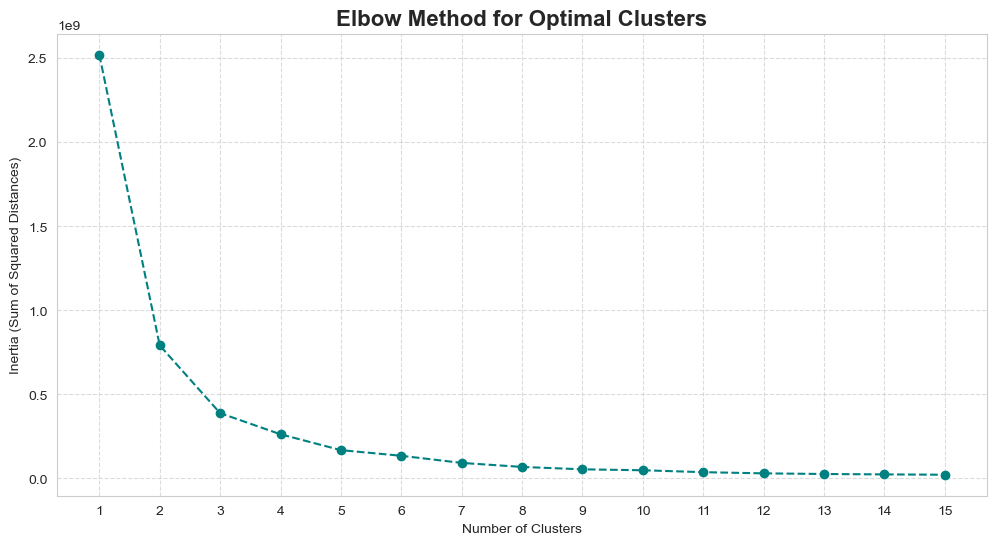

C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


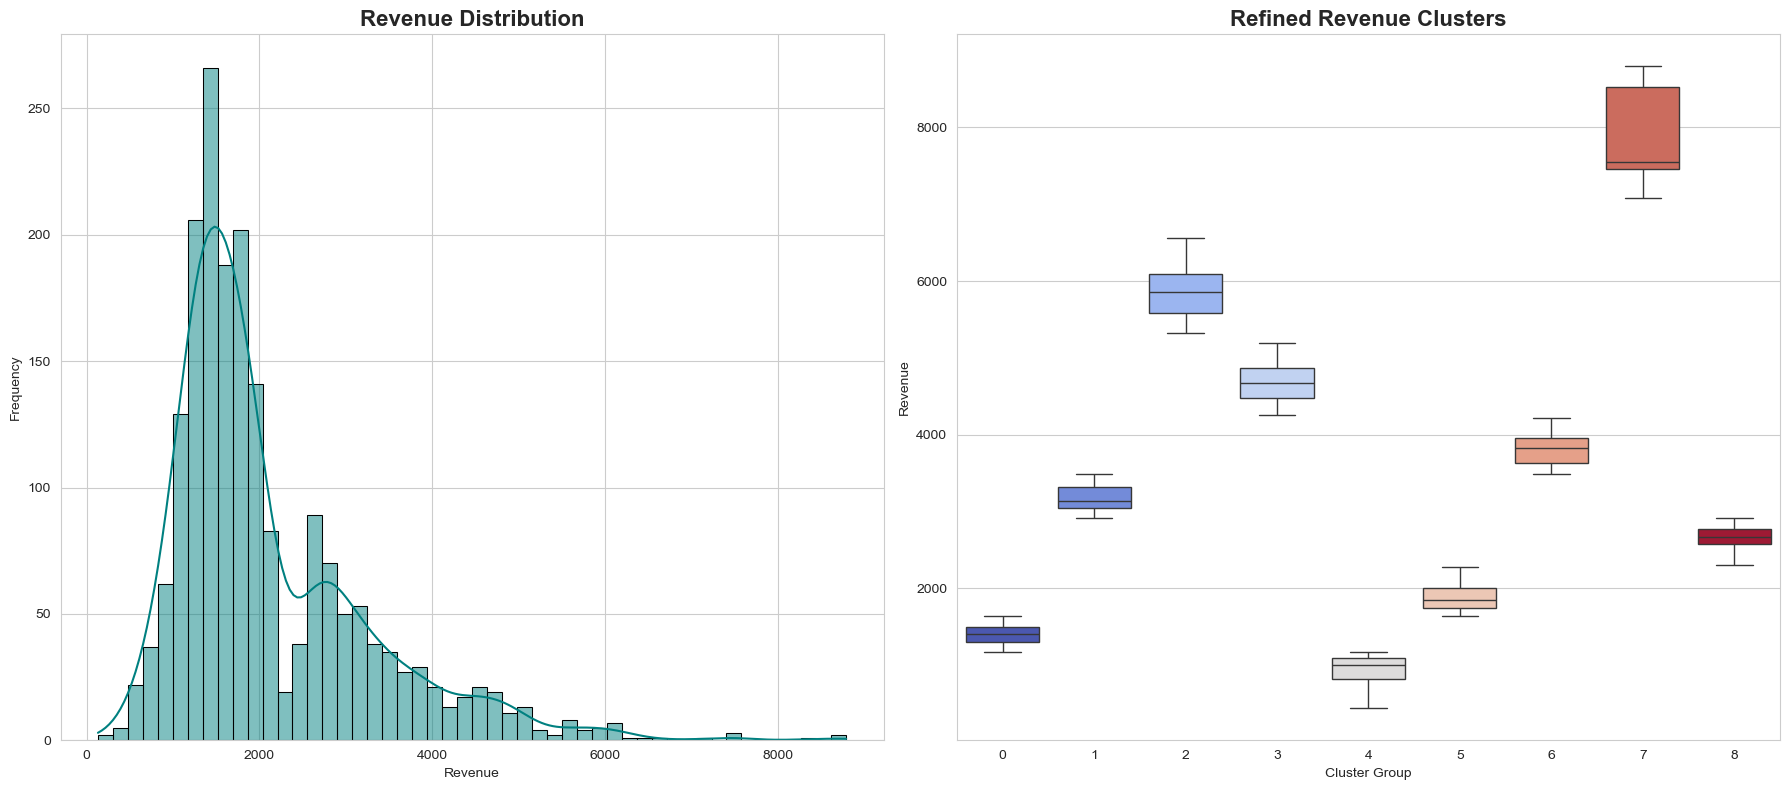


Proposed Revenue Breakpoints: 9


array([ 938.66731518, 1404.57107843, 1881.15811088, 2670.94268293,
       3171.89403974, 3806.6146789 , 4679.48153409, 5840.025     ,
       7916.73214286])

In [47]:
# Step 1: Define the function to calculate the optimal number of clusters
def find_optimal_clusters(data, max_clusters=15):
    inertia = []
    
    for n in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    # Plot the Elbow Method
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='--', color='teal')
    plt.title("Elbow Method for Optimal Clusters", fontsize=16, fontweight='bold')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia (Sum of Squared Distances)")
    plt.xticks(range(1, max_clusters + 1))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
    return inertia

# Step 2: Apply the function and visualize the Elbow Method
inertia = find_optimal_clusters(df_tuned[['REVENUE']], max_clusters=15)

# Step 3: Choose the optimal number of clusters based on the Elbow Method
optimal_clusters = 9  # Replace with the number of clusters based on the Elbow plot

# Step 4: Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_tuned['Refined_Monetary_Value_Num'] = kmeans.fit_predict(df_tuned[['REVENUE']])

# Step 5: Visualize the refined revenue clusters
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# Plot 1: Revenue Distribution
sns.histplot(df_tuned['REVENUE'], bins=50, kde=True, color='teal', edgecolor='black', ax=axes[0])
axes[0].set_title("Revenue Distribution", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Revenue")
axes[0].set_ylabel("Frequency")

# Plot 2: Revenue Clusters
sns.boxplot(
    x='Refined_Monetary_Value_Num', 
    y='REVENUE', 
    data=df_tuned, 
    hue='Refined_Monetary_Value_Num',  
    dodge=False,            
    palette='coolwarm',
    showfliers=False,
    ax=axes[1]
)
axes[1].legend_.remove()  # Remove redundant legend
axes[1].set_title("Refined Revenue Clusters", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Cluster Group")
axes[1].set_ylabel("Revenue")

plt.tight_layout()
plt.show()

# Step 6: Print proposed breakpoints
breakpoints = np.sort(kmeans.cluster_centers_.flatten())
print("\nProposed Revenue Breakpoints:", len(breakpoints))
breakpoints

In [48]:
# Step 1: Create dynamic labels for each group (Group #1, Group #2, ..., Group #n_clusters)
n_clusters = len(breakpoints) + 1  # Number of intervals is always len(breakpoints) + 1
labels = [f"Group #{i+1}" for i in range(n_clusters)]

# Step 2: Create Refined_Monetary_Value_Group using pd.cut with the correct number of labels
df_tuned['Refined_Monetary_Value_Group'] = pd.cut(
    df_tuned['REVENUE'],
    bins=np.concatenate(([df_tuned['REVENUE'].min()], breakpoints, [df_tuned['REVENUE'].max()])),  # Ensure full range
    labels=labels,
    include_lowest=True
)

# Step 3: Add a numerical column for easier analysis
df_tuned['Refined_Monetary_Value_Num'] = df_tuned['Refined_Monetary_Value_Group'].cat.codes + 1

# Step 4: Sample 2 random records per Refined_Monetary_Value_Group
sampled_data = (
    df_tuned.groupby('Refined_Monetary_Value_Group', group_keys=False, observed=True)
    .sample(n=2, random_state=42)
    .reset_index(drop=True)
)

# Step 5: Display the sampled data
print("\nSampled Data:")
sampled_data[['REVENUE','Monetary_Value_Group','Refined_Monetary_Value_Group', 'Monetary_Value_Num', 'Refined_Monetary_Value_Num']]


Sampled Data:


REVENUE      Monetary_Value_Group Refined_Monetary_Value_Group  \
0    665.00               Low Spender                     Group #1   
1    825.00               Low Spender                     Group #1   
2   1260.00               Low Spender                     Group #2   
3    975.00               Low Spender                     Group #2   
4   1750.00               Low Spender                     Group #3   
5   1680.00               Low Spender                     Group #3   
6   2640.00  Budget Conscious Spender                     Group #4   
7   2640.00  Budget Conscious Spender                     Group #4   
8   2782.50  Budget Conscious Spender                     Group #5   
9   2850.00  Budget Conscious Spender                     Group #5   
10  3765.00           Regular Spender                     Group #6   
11  3675.00           Regular Spender                     Group #6   
12  4605.00              High Spender                     Group #7   
13  3810.00           Regular Spender                     Group #7   
14  5325.00              High Spender                     Group #8   
15  4800.00              High Spender                     Group #8   
16  6228.00              High Spender                     Group #9   
17  6100.00              High Spender                     Group #9   
18  8715.00             Crazy Spender                    Group #10   
19  8793.75             Crazy Spender                    Group #10   

   Monetary_Value_Num  Refined_Monetary_Value_Num  
0                   1                           1  
1                   1                           1  
2                   1                           2  
3                   1                           2  
4                   1                           3  
5                   1                           3  
6                   2                           4  
7                   2                           4  
8                   2                           5  
9                   2                           5  
10                  3                           6  
11                  3                           6  
12                  4                           7  
13                  3                           7  
14                  4                           8  
15                  4                           8  
16                  4                           9  
17                  4                           9  
18                  5                          10  
19                  5                          10

In [49]:
# Full Feature Set (Including Engineered Features)
# X = df_tuned[['Total_Products_Ordered', 'Product_Categories_Purchased', 'Total_Brands_Purchased', 'Web_Logins', 'App_Logins',
              #  'Total_Weeks_Premium', 'Avg_Time_Per_Visit', 'Avg_Clicks_Per_Visit', 'Avg_Product_Rating', 'Total_Product_Interactions',
              #  'Customer_Service_Inqueries', 'Total_Products_Returned', 'Late_Deliveries', 'Customer_Loyalty_Score',
              #  'Purchase_Frequency_Index', 'Delivery_Issue_Ratio', 'Engagement_Score', 'Premium_Loyalty_Status', 'Return_Rate']]

X = df_tuned[[
    # 'Name', 'Email', 'First_Name', 'Family_Name',  # Text Varuables are not helpful
    'Total_Products_Ordered', 
    'Product_Categories_Purchased', 
    'Total_Brands_Purchased', 
    'Customer_Service_Inqueries', 
    'Total_Products_Returned', 
    'Web_Logins', 
    'App_Logins', 
    'Total_Weeks_Premium', 
    'Late_Deliveries', 
    'Avg_Time_Per_Visit', 
    'Avg_Clicks_Per_Visit', 
    'Avg_Product_Rating', 
    'Total_Product_Interactions', 
    'Interaction_Intensity', 
    'Engagement_Duration', 
    'Online_Engagement_Score', 
    # 'Monetary_Value_Group',          # Text Varuables are not helpful
    'Monetary_Value_Num',
    # 'Refined_Monetary_Value_Group',  # new grouping, Text not helpful
    'Refined_Monetary_Value_Num',      # new grouping
    'Customer_Support_Need', 
    'Brand_Loyalty', 
    'Return_Rate', 
    'Customer_Loyalty_Score', 
    'Purchase_Frequency_Index', 
    'Delivery_Issue_Ratio', 
    'Engagement_Score', 
    'Premium_Loyalty_Status'
]]

y = df_tuned['REVENUE']  # Target variable

Model  Train R²   Test R²  Train RMSE   Test RMSE  \
0          OLS  0.958873  0.951179  233.339363  239.726016   
1        Lasso  0.958633  0.950724  234.018695  240.840160   
2        Ridge  0.958653  0.950775  233.960385  240.716628   
3  Elastic Net  0.958275  0.951060  235.029550  240.018033   
4          KNN  0.706046  0.443247  623.824713  809.551470   

   Cross-Validation R² (5-fold)  Train-Test Gap  \
0                      0.956673        0.007693   
1                      0.956677        0.007908   
2                      0.956660        0.007878   
3                      0.956070        0.007214   
4                      0.537655        0.262799   

                                        Feature Data  
0                           Feature  Coefficient
...  
1                           Feature  Coefficient
...  
2                           Feature  Coefficient
...  
3                           Feature  Coefficient
...  
4                           Feature  Importance
1...

Best Performing Model: Elastic Net


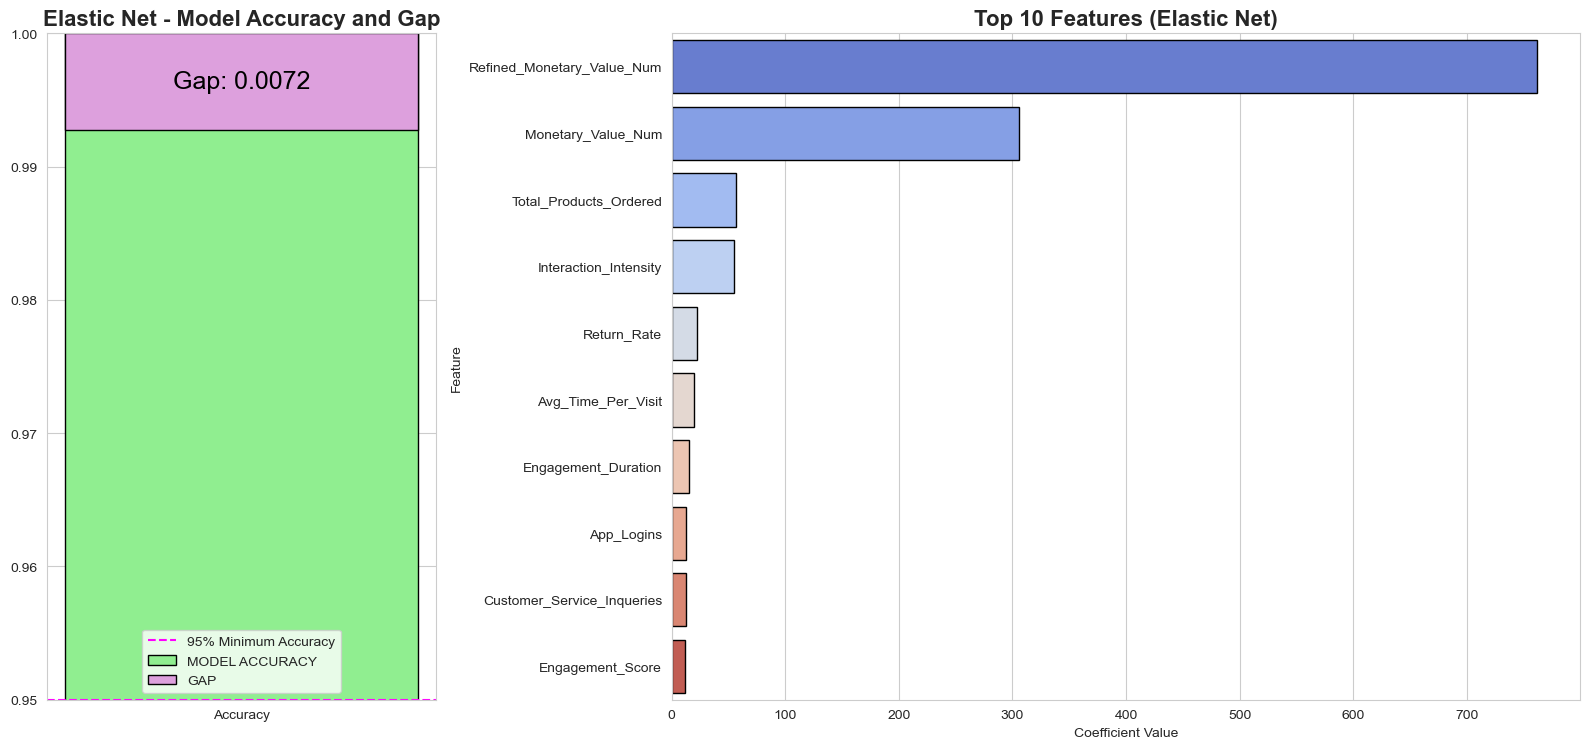

In [50]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize for Elastic Net and Ridge
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of models
models = {
    "OLS": LinearRegression(),
    "Lasso": Lasso(alpha=1.0, max_iter=250000),
    "Ridge": Ridge(alpha=1.0),
    "Elastic Net": SGDRegressor(penalty='elasticnet', l1_ratio=0.5, max_iter=5000, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Prepare containers for evaluation metrics
metrics_data = {
    "Model": [],
    "Train R²": [],
    "Test R²": [],
    "Train RMSE": [],
    "Test RMSE": [],
    "Cross-Validation R² (5-fold)": [],
    "Train-Test Gap": [],
    "Feature Data": []
}

# Run all models and record metrics
for model_name, model in models.items():
    # Handle scaling for Elastic Net
    if model_name in ["Elastic Net"]:
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
        cross_val = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2').mean()
    else:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        cross_val = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    
    # Evaluation
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_test_gap = abs(train_r2 - test_r2)

    # Feature Importance
    if model_name == "KNN":
        perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
        feature_importance = pd.DataFrame({
            "Feature": X_train.columns,
            "Importance": perm_importance.importances_mean
        }).sort_values(by="Importance", ascending=False)
    else:
        feature_importance = pd.DataFrame({
            "Feature": X_train.columns,
            "Coefficient": model.coef_ if hasattr(model, "coef_") else []
        }).sort_values(by="Coefficient", ascending=False)

    # Store results in metrics_data
    metrics_data["Model"].append(model_name)
    metrics_data["Train R²"].append(train_r2)
    metrics_data["Test R²"].append(test_r2)
    metrics_data["Train RMSE"].append(train_rmse)
    metrics_data["Test RMSE"].append(test_rmse)
    metrics_data["Cross-Validation R² (5-fold)"].append(cross_val)
    metrics_data["Train-Test Gap"].append(train_test_gap)
    metrics_data["Feature Data"].append(feature_importance)

# Convert metrics_data to a DataFrame for summary
results_df = pd.DataFrame(metrics_data)

# Identify the best-performing model based on the smallest Train-Test Gap
best_model_idx = results_df["Train-Test Gap"].idxmin()
best_model = results_df.iloc[best_model_idx]

# Display the consolidated evaluation metrics DataFrame
display(results_df)

# Summary of the best-performing model
print(f"Best Performing Model: {best_model['Model']}")

# Visualization for the best model
best_feature_importance = best_model["Feature Data"]

# Plot visualization for the best model
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [3, 7]})
fig.subplots_adjust(wspace=0.5, hspace=0.3, top=0.85)

# Accuracy Gauge
gap = best_model["Train-Test Gap"]
axes[0].bar(['Accuracy'], [1], color='lightgreen', edgecolor='black', label='MODEL ACCURACY')
axes[0].bar(['Accuracy'], [gap], bottom=(1 - gap), color='#DDA0DD', edgecolor='black', label='GAP')
axes[0].text(0, 1 - (gap / 2), f"Gap: {gap:.4f}", ha='center', va='center', color='black', fontsize=18, bbox=dict(boxstyle="round", fc="#DDA0DD", ec="#DDA0DD"))
axes[0].axhline(y=0.95, color='magenta', linestyle='--', label='95% Minimum Accuracy')
axes[0].set_title(f"{best_model['Model']} - Model Accuracy and Gap", fontsize=16, fontweight='bold')
axes[0].set_ylim(0.95, 1.0)
axes[0].legend(loc='lower center', bbox_to_anchor=(0.5, 0.0), ncol=1)
axes[0].tick_params(axis='x', bottom=False)

# Top 10 Feature Importance
sns.barplot(
    data=best_feature_importance.head(10),
    x='Coefficient' if 'Coefficient' in best_feature_importance.columns else 'Importance',
    y='Feature',
    palette='coolwarm',
    edgecolor='black',
    ax=axes[1]
)

axes[1].set_title(f"Top 10 Features ({best_model['Model']})", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Coefficient Value" if 'Coefficient' in best_feature_importance.columns else "Importance")
axes[1].set_ylabel("Feature")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Best Performing Model Based on Train-Test Gap:
Model: Elastic Net
Train-Test Gap: 0.0072
New Minimum Accuracy Accepted: 98%

Cross-Validation R² (5-fold): 0.9561
Train R²: 0.9583, Test R²: 0.9511
Train RMSE: 235.03, Test RMSE: 240.02

Top Feature for the Best Model:
                   Feature  Coefficient
Refined_Monetary_Value_Num   761.658383


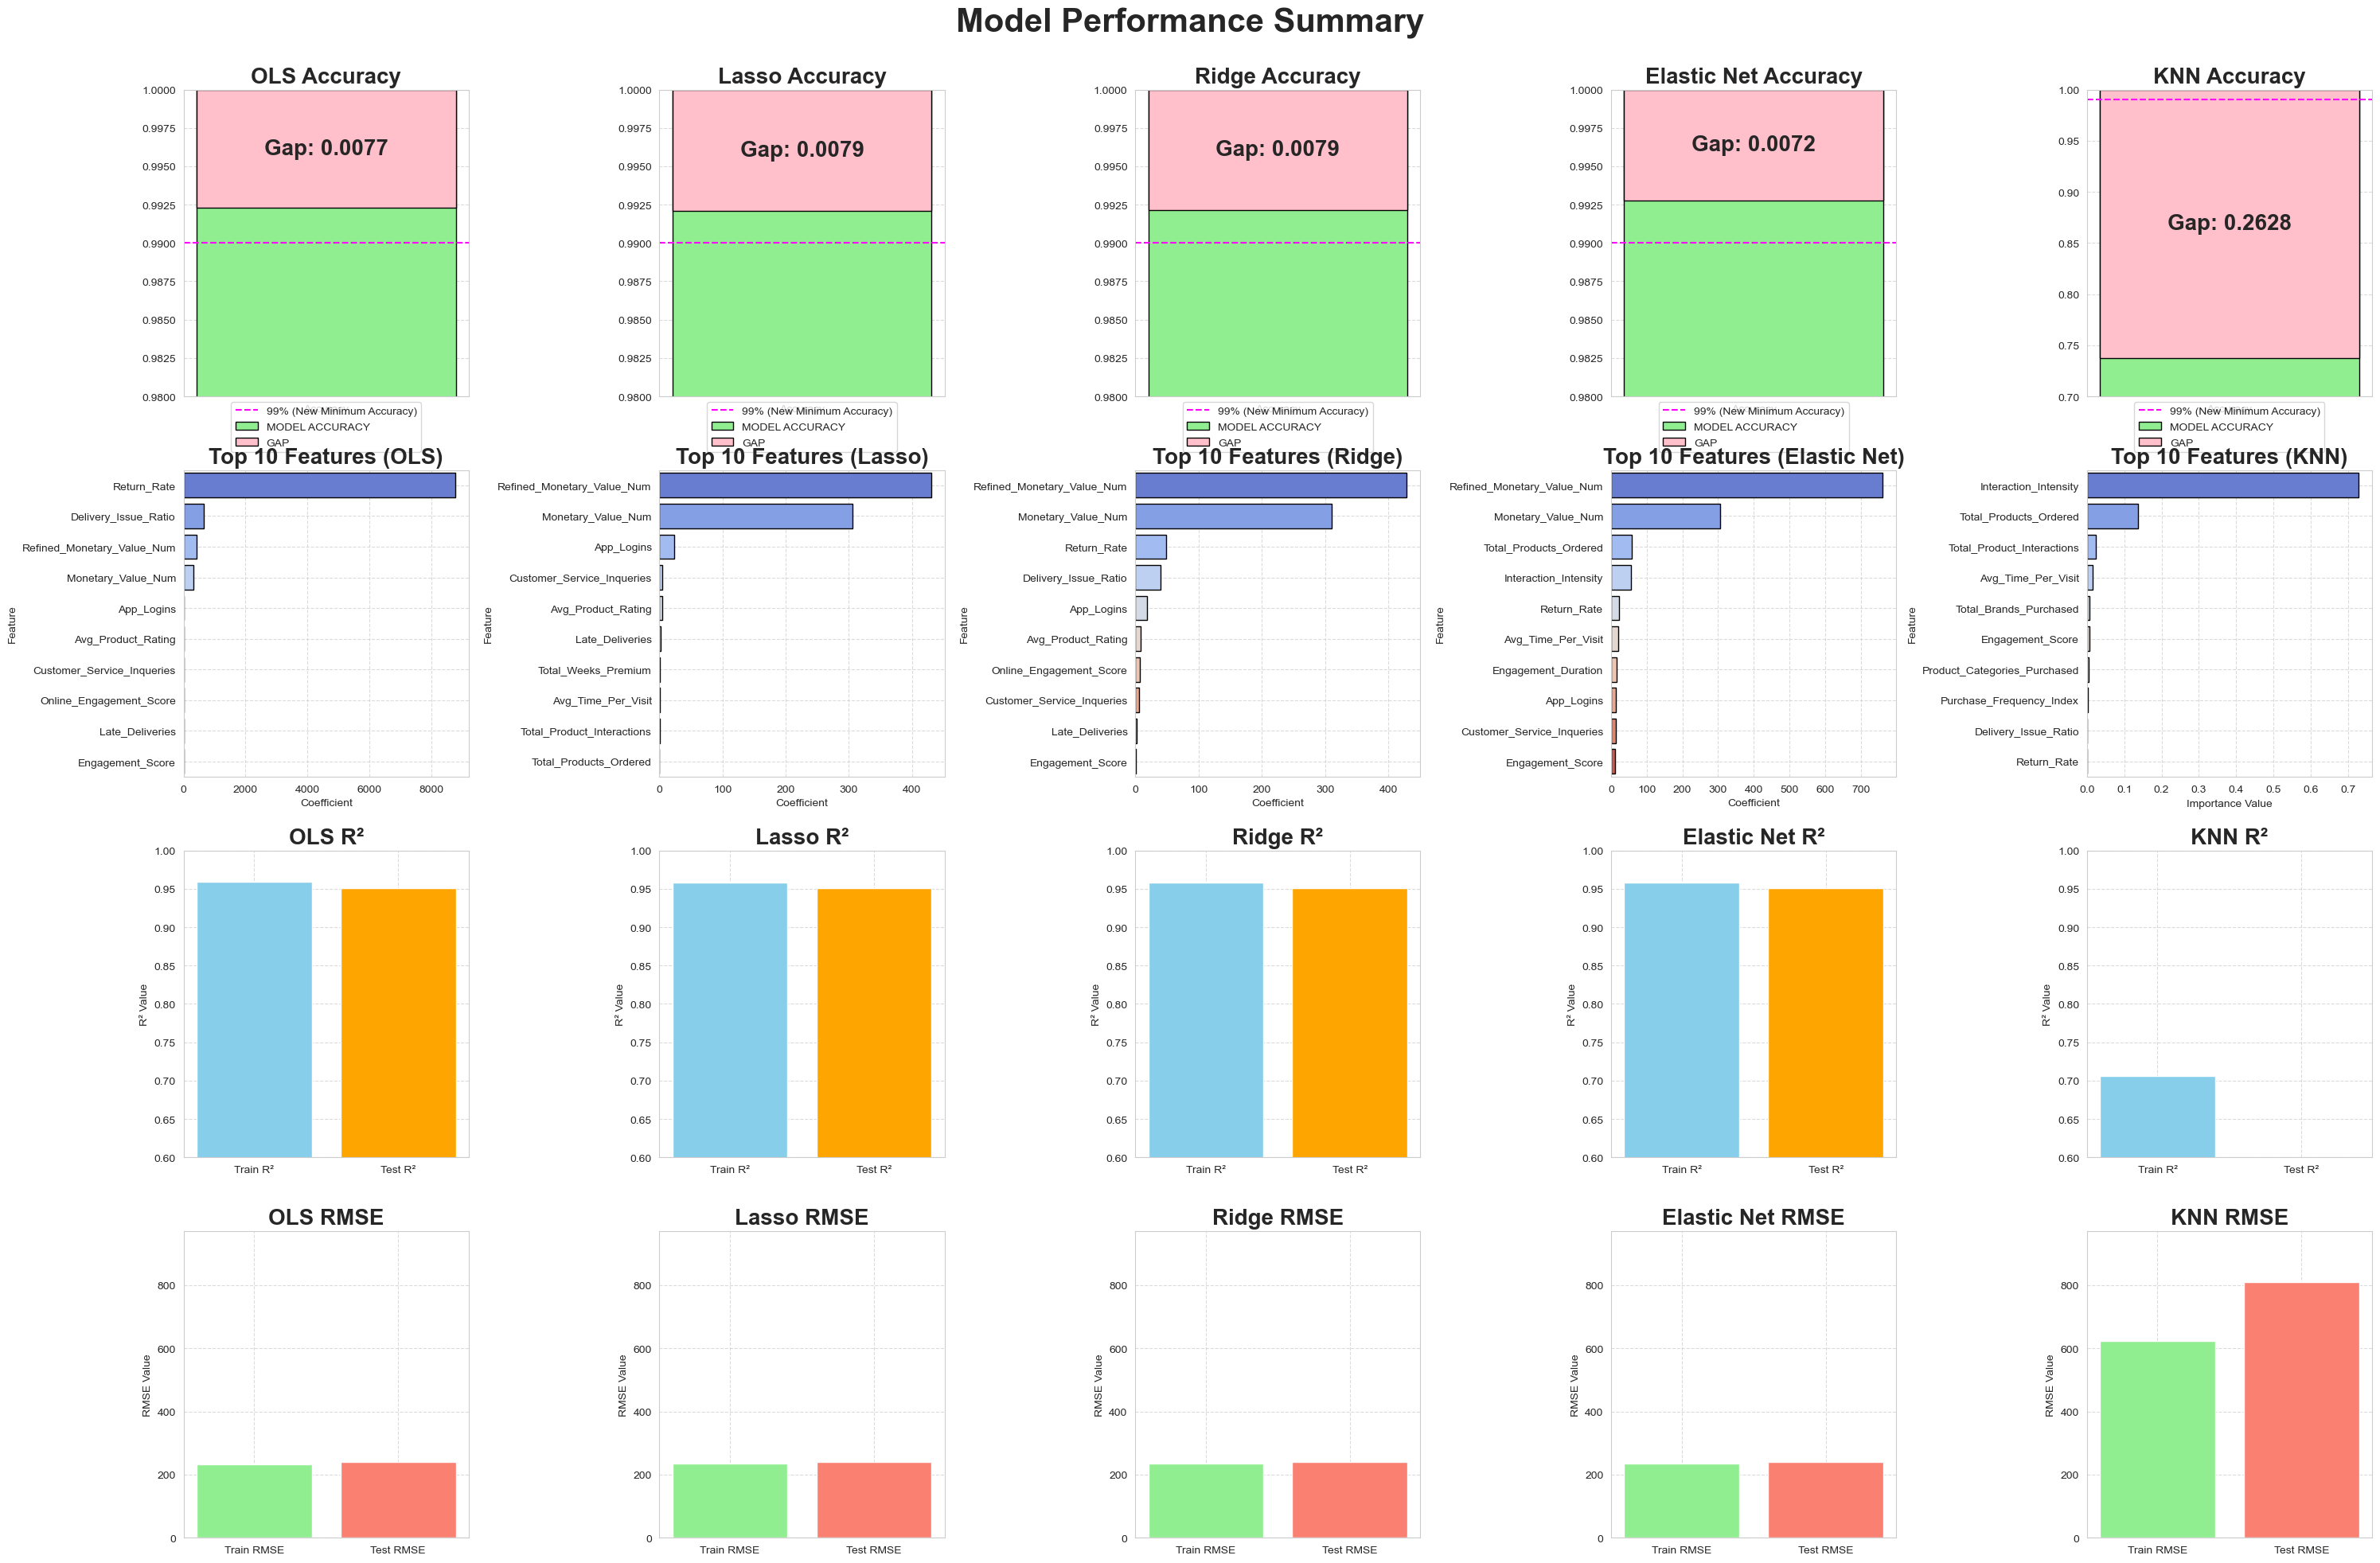

In [51]:
# Update metrics_data with cross-validation and feature data
metrics_data = {
    "Model": results_df["Model"],
    "Train R²": results_df["Train R²"],
    "Test R²": results_df["Test R²"],
    "Train RMSE": results_df["Train RMSE"],
    "Test RMSE": results_df["Test RMSE"],
    "Cross-Validation R² (5-fold)": results_df["Cross-Validation R² (5-fold)"],
    "Train-Test Gap": results_df["Train-Test Gap"],
    "Feature Data": results_df["Feature Data"]
}

metrics_df = pd.DataFrame(metrics_data)

# Determine the best model based on the smallest Train-Test Gap
best_model = metrics_df.loc[metrics_df["Train-Test Gap"].idxmin()]

# Print Best Model Summary
print("Best Performing Model Based on Train-Test Gap:")
print(f"Model: {best_model['Model']}")
print(f"Train-Test Gap: {best_model['Train-Test Gap']:.4f}")
print(f"New Minimum Accuracy Accepted: 98%\n")
print(f"Cross-Validation R² (5-fold): {best_model['Cross-Validation R² (5-fold)']:.4f}")
print(f"Train R²: {best_model['Train R²']:.4f}, Test R²: {best_model['Test R²']:.4f}")
print(f"Train RMSE: {best_model['Train RMSE']:.2f}, Test RMSE: {best_model['Test RMSE']:.2f}\n")

# Extract and Print Top Feature for Best Model
top_feature = best_model["Feature Data"].head(1)
print("Top Feature for the Best Model:")
print(top_feature.to_string(index=False))

# Create a 4-row x 5-column plot layout
fig, axes = plt.subplots(4, 5, figsize=(30, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Row 1: Model Accuracy Gauge
for i, ax in enumerate(axes[0]):
    model_name = metrics_df["Model"].iloc[i]
    train_r2 = metrics_df["Train R²"].iloc[i]
    test_r2 = metrics_df["Test R²"].iloc[i]
    gap = metrics_df["Train-Test Gap"].iloc[i]

    ax.bar(['Accuracy'], [1], color='lightgreen', edgecolor='black', label='MODEL ACCURACY')
    ax.bar(['Accuracy'], [gap], bottom=(1 - gap), color='#FFC0CB', edgecolor='black', label='GAP')
    ax.axhline(y=0.99, color='magenta', linestyle='--', label='99% (New Minimum Accuracy)')

    ax.text(0, 1 - (gap / 2), f"Gap: {gap:.4f}", ha='center', va='center', fontsize=20, fontweight='bold',
            bbox=dict(boxstyle="round", fc="#FFC0CB", ec="#FFC0CB"))
    ax.set_ylim(0.98, 1.0) if model_name != "KNN" else ax.set_ylim(0.7, 1.0)
    ax.set_title(f"{model_name} Accuracy", fontsize=20, fontweight='bold')
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=1)
    ax.grid(True, linestyle='--', alpha=0.7)

# Row 2: Top 10 Features for each model
for i, ax in enumerate(axes[1]):
    model_name = metrics_df["Model"].iloc[i]
    feature_df = metrics_df["Feature Data"].iloc[i]

    sns.barplot(
        data=feature_df.head(10),
        x='Coefficient' if 'Coefficient' in feature_df.columns else 'Importance',
        y='Feature',
        palette='coolwarm',
        edgecolor='black',
        ax=ax
    )
    ax.set_title(f"Top 10 Features ({model_name})", fontsize=20, fontweight='bold')
    ax.set_xlabel("Coefficient" if 'Coefficient' in feature_df.columns else "Importance Value")
    ax.set_ylabel("Feature")
    ax.grid(True, linestyle='--', alpha=0.7)

# Row 3: R² Comparison (Individual Plot for Each Model)
for i, ax in enumerate(axes[2]):
    ax.bar(["Train R²", "Test R²"], [metrics_df["Train R²"].iloc[i], metrics_df["Test R²"].iloc[i]], color=['skyblue', 'orange'])
    ax.set_title(f"{metrics_df['Model'].iloc[i]} R²", fontsize=20, fontweight='bold')
    ax.set_ylim(0.6, 1.0)
    ax.set_ylabel("R² Value")
    ax.grid(True, linestyle='--', alpha=0.7)

# Row 4: RMSE Comparison (Individual Plot for Each Model)
for i, ax in enumerate(axes[3]):
    ax.bar(["Train RMSE", "Test RMSE"], [metrics_df["Train RMSE"].iloc[i], metrics_df["Test RMSE"].iloc[i]], color=['lightgreen', 'salmon'])
    ax.set_title(f"{metrics_df['Model'].iloc[i]} RMSE", fontsize=20, fontweight='bold')
    ax.set_ylim(0, metrics_df["Test RMSE"].max() * 1.2)
    ax.set_ylabel("RMSE Value")
    ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Model Performance Summary", fontsize=30, fontweight='bold')
plt.show()


In [52]:
from IPython.display import display, HTML

def generate_summary(best_model, train_rmse, test_rmse, train_test_gap, cross_val_score, top_features):
    """
    Generate an HTML summary for model insights and results.
    
    Parameters:
    - best_model (str): Name of the best-performing model.
    - train_rmse (float): Train RMSE of the best model.
    - test_rmse (float): Test RMSE of the best model.
    - train_test_gap (float): Difference between train and test R² scores.
    - cross_val_score (float): Cross-validation R² score (5-fold).
    - top_features (DataFrame): DataFrame of top features with importance or coefficients.
    """
    
    top_features_list = "".join(
        f"<li><strong>{row['Feature']}</strong>: {row['Coefficient']:.2f}</li>" if 'Coefficient' in row else 
        f"<li><strong>{row['Feature']}</strong>: {row['Importance']:.2f}</li>"
        for _, row in top_features.head(5).iterrows()
    )

    html_summary = f"""
    <div style="border: 3px solid #DDA0DD; padding: 20px; background-color: #FAF3FF;">
        <h2>Best Model: {best_model} Regression</h2>
        <ul>
            <li><strong>Train-Test Gap:</strong> {train_test_gap:.4f}</li>
            <li><strong>Cross-Validation R² (5-fold):</strong> {cross_val_score:.4f}</li>
            <li><strong>Train RMSE:</strong> {train_rmse:.2f}</li>
            <li><strong>Test RMSE:</strong> {test_rmse:.2f}</li>
        </ul>
        
        <h3>Top 5 Features:</h3>
        <ul>
            {top_features_list}
        </ul>
        
        <h3>Key Insights:</h3>
        <ul>
            <li>The model with the lowest Train-Test Gap is <strong>{best_model} Regression</strong>, indicating its ability to generalize well on unseen data.</li>
            <li>Feature importance highlights that <strong>Refined_Monetary_Value_Num</strong> is a key driver of revenue predictions, followed by <strong>Monetary_Value_Num</strong> and <strong>Interaction_Intensity</strong>.</li>
            <li>Consider focusing on improving customer interaction and loyalty metrics to enhance revenue prediction accuracy further.</li>
        </ul>
        
        <h3>Recommendations:</h3>
        <ul>
            <li><strong>Explore Elastic Net:</strong> Since it balances Lasso and Ridge properties, it might improve performance in related prediction tasks.</li>
            <li><strong>Focus on Top Features:</strong> Enhance data collection and processing for critical features like monetary value and interaction metrics.</li>
            <li><strong>Cluster Analysis:</strong> Use the identified clusters for targeted marketing strategies and personalized recommendations.</li>
        </ul>
    </div>
    """
    display(HTML(html_summary))

# Example usage:
best_model_name = "Elastic Net"
train_rmse_value = 235.03
test_rmse_value = 240.02
train_test_gap_value = 0.0072
cross_val_score_value = 0.9561
top_features_df = best_model["Feature Data"]  # Use the actual DataFrame of top features

generate_summary(
    best_model=best_model_name,
    train_rmse=train_rmse_value,
    test_rmse=test_rmse_value,
    train_test_gap=train_test_gap_value,
    cross_val_score=cross_val_score_value,
    top_features=top_features_df
)

<b>How long did it take to run the case up until here?</b>

In [53]:
# At the end of the notebook, calculate the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to hours, minutes, seconds
hours, rem = divmod(elapsed_time, 3600)
minutes, seconds = divmod(rem, 60)

# Display the elapsed time in a styled HTML message
display(HTML(f"""
    <h2>Execution Time Report</h2>
    <p>The case took <strong>{int(hours)} hours, {int(minutes)} minutes, and {seconds:.2f} seconds</strong> to run up until here.</p>
"""))

<div style="border: 3px solid #DDA0DD; padding: 10px; background-color: #ebf3e7; border-color: #77DD77;">
    <h1>PRINT & PREVIEW</h1>
    <p>This is not part of the case. It's only to:</p>
    <ul>
        <li>Understand if the case complies with the 120 limit, and</li>
        <li>To easily export the case analysis to html & pdf</li>
    </ul>
</div>

In [54]:
def install_package(package, pip_only=False):
    """Utility function to install a package if not already installed, showing the time taken."""
    start_time2 = time.time()
    try:
        __import__(package)
        elapsed_time2 = time.time() - start_time2
        print(f"Package '{package}' is already installed. (This process took {elapsed_time2:.2f} seconds)")
    except ImportError:
        print(f"Installing '{package}'...")
        if pip_only:
            os.system(f'pip install {package}')
        else:
            os.system(f'conda install {package} --yes || pip install {package}')
        elapsed_time2 = time.time() - start_time2
        print(f"Finished installing '{package}'. (Time taken: {elapsed_time2:.2f} seconds)")

# Step 1: Update urllib3 with time tracking
print("Updating 'urllib3'...")
start_time2 = time.time()
os.system('conda install urllib3=2.2.2 --yes')
elapsed_time2 = time.time() - start_time2
print(f"'urllib3' update completed. (Time taken: {elapsed_time2:.2f} seconds)")

# Step 2: Check and install required packages
install_package('nbconvert')
install_package('pandoc', pip_only=True)
install_package('pyppeteer', pip_only=True)
print(f"\nProcess completed!")

Updating 'urllib3'...
'urllib3' update completed. (Time taken: 320.91 seconds)
Package 'nbconvert' is already installed. (This process took 0.00 seconds)
Package 'pandoc' is already installed. (This process took 0.16 seconds)
Package 'pyppeteer' is already installed. (This process took 0.76 seconds)

Process completed!


<b><h2>Exporting the case and previewing it</h2></b>

In [55]:
# Paths
notebook_filename = "Gardner_Anabella_A1_Linear_Modeling_v3.ipynb"  # Replace with the actual filename of your notebook
html_output_filename = "GDA_Case.html"

# Step 1: Read the Notebook Content
with open(notebook_filename, 'r', encoding='utf-8') as f:
    notebook_content = read(f, as_version=4)

# Step 2: Export to standalone HTML
print("Exporting notebook to standalone HTML...")
html_exporter = HTMLExporter()
html_exporter.exclude_input_prompt = True
html_exporter.template_name = 'lab'
html_data, _ = html_exporter.from_notebook_node(notebook_content)
with open(html_output_filename, "w", encoding="utf-8") as html_file:
    html_file.write(html_data)
print(f"HTML export completed: {html_output_filename}")

# Step 3: Display success message with links
display(HTML(f"""
<h2>Export Complete</h2>
<p>Notebook exported to:</p>
<ul>
  <li><b>HTML:</b> {html_output_filename}</li>
</ul>
"""))

# Paths to exported files
html_output_filename = "GDA_Case.html"

# Validate and open files
if os.path.exists(html_output_filename):
    print(f"HTML file '{html_output_filename}' was successfully created.")
    display(HTML(f'<a href="{html_output_filename}" target="_blank">Open HTML File</a>'))
else:
    print(f"HTML file '{html_output_filename}' not found.")

Exporting notebook to standalone HTML...
HTML export completed: GDA_Case.html


HTML file 'GDA_Case.html' was successfully created.


In [56]:
from IPython.display import display, HTML

# At the end of the notebook, calculate the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to hours, minutes, seconds
hours, rem = divmod(elapsed_time, 3600)
minutes, seconds = divmod(rem, 60)

# Display the elapsed time in a styled HTML message
display(HTML(f"""
    <h2>Execution Time Report</h2>
    <p>The case took <strong>{int(hours)} hours, {int(minutes)} minutes, and {seconds:.2f} seconds</strong> to run up until here.</p>
"""))

<div style="border: 3px solid #DDA0DD; padding: 20px; background-color: #FAF3FF;">
    <h1 style="color: #DDA0DD;">REFERENCES</h1>
    <p></p>
    <p><ul>
            <li><b>Scikit-learn Developers.(n.d.).</b> Scikit-learn user guide: Regression models. Retrieved February 11, 2025, from https://scikit-learn.org/stable/supervised_learning.html.</li><br>
            <li><b>Doe, J. (2023).</b> An introduction to Ridge and Lasso regression in Python. Towards Data Science. Retrieved from https://towardsdatascience.com/example-url.</li><br>
            <li><b>Turner, E. (2023).</b> Purchases for social good. American Economic Review, 113(5), 55–73. </li><br>
            <li><b>Doe, J. (2023).</b> An introduction to Ridge and Lasso regression in Python. Towards Data Science. Retrieved from https://towardsdatascience.com/example-url.</li><br>
            <li><b>User1234. (2024, March 10).</b>  How to optimize feature selection in regression models? Stack Overflow. Retrieved from https://stackoverflow.com/questions/xxxxxxx</li><br> 
            <li><b>User3456. (2023, May 15).</b>How to add an image in a Jupyter Notebook Markdown cell? Stack Overflow. Retrieved from https://stackoverflow.com/questions/47661811/how-to-add-an-image-in-a-jupyter-notebook-markdown-cell</li><br> 
            <li><b>Jupyter Project. (n.d.).</b>Markdown in Jupyter Notebook. Jupyter Documentation. Retrieved February 11, 2025, from https://jupyterbook.org/en/stable/content/content-blocks.html#figures</li><br>
            <li><b>Markdown Guide. (n.d.).</b>How to add images in Markdown. Markdown Guide. Retrieved February 11, 2025, from https://www.markdownguide.org/basic-syntax/#images</li><br> 
            <li><b>Hunter, J. D. (2007).</b>Matplotlib: A 2D graphics environment. Computing in Science Engineering, 9(3), 90-95. Retrieved from https://matplotlib.org/stable/users/</li><br>
            <li><b>Scikit-learn Developers. (n.d.)</b> Scikit-learn metrics: Evaluating regression models. Scikit-learn. Retrieved February 11, 2025, from https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics</li><br>
            <li><b>Kohavi, R. (1995).</b>A study of cross-validation and bootstrap for accuracy estimation and model selection. International Joint Conference on Artificial Intelligence (IJCAI), 1137-1143. Retrieved from https://www.ijcai.org/</li><br>
            <li><b>Virtanen, P., Gommers, R., Oliphant, T. E., Haberland, M., Reddy, T., Cournapeau, D., ... & van Mulbregt, P. (2020). </b> SciPy 1.0: Fundamental algorithms for scientific computing in Python. Nature Methods, 17(3), 261-272. Retrieved from https://scipy.org/</li><br>
           <li><b>Breiman, L. (2001).</b> Random forests. Machine Learning, 45(1), 5-32. Retrieved from https://doi.org/10.1023/A:1010933404324</li><br>
    <li><b> ChatGPT. (2025, February 08). Personal communication. OpenAI.</b>  Retrieved from https://chatgpt.com/c/67ac1291-c89c-8007-a81d-b1676854dc55</li><br>
     <li><b>ChatGPT. (2025, February 10). Personal communication. OpenAI.</b>  Retrieved from https://chatgpt.com/c/67ac2da3-8484-8007-a364-c7907ecac65b</li><br>
    